#  **Machine Learning (Scikit-learn Library)**

##    The initial Steps and Plottings

## 1. Regression
*   Polynomial Regression
*   Ridge Regression
*   KNN Regression
*   SVM Regression
*   MLP Regressor
*   Plotting Regression Lines

## 2. Classification
*   Logistic Regression
*   K-Nearest Neighbors (KNN)
*   Support Vector Machine (SVM)
*   MLP Classification
*   Evaluation Metrics for Classification


# Initial steps and plotting

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import tensorflow as tf
import tensorboard as tb
from tensorflow import keras
from sklearn import svm
from sklearn.svm import SVR, SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures, label_binarize
from sklearn.metrics import r2_score, roc_curve, auc, accuracy_score, precision_recall_curve, mean_absolute_error, mean_squared_error, confusion_matrix, precision_score , recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score, GridSearchCV
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.multiclass import OneVsRestClassifier


In [2]:
edz=pd.read_csv('/content/EDZTotal.csv', header = 0)
edz.shape

(1604, 3)

In [3]:
edz


SigMax/CI       r/a Region
0      2.542783  1.184615    HDZ
1      2.789586  1.215385    HDZ
2      2.451743  1.153846    HDZ
3      2.468652  1.215385    HDZ
4      2.512763  1.215385    HDZ
...         ...       ...    ...
1599   4.714700  2.476923   EDZo
1600   3.155505  1.760000   EDZo
1601   3.586833  1.916923   EDZo
1602   3.700341  2.323077   EDZo
1603   4.040863  2.400000   EDZo

[1604 rows x 3 columns]

In [4]:
# Changind the Region Column Names (Different EDZs) to the Numeric Values for Classification
change = LabelEncoder()
edz['Region'] = change.fit_transform(edz['Region'].astype('str'))
# change.classes_
classes=change.classes_
classes
#edz['Region']

array(['EDZi', 'EDZo', 'HDZ'], dtype=object)

In [5]:
# See what each value represent
list(change.inverse_transform([0, 2, 1]))

['EDZi', 'HDZ', 'EDZo']

In [6]:
# Realize how many null value each column has (For cleaning purposes)
edz.isnull().sum()

SigMax/CI    0
r/a          0
Region       0
dtype: int64

## Corrolation matrix of all data

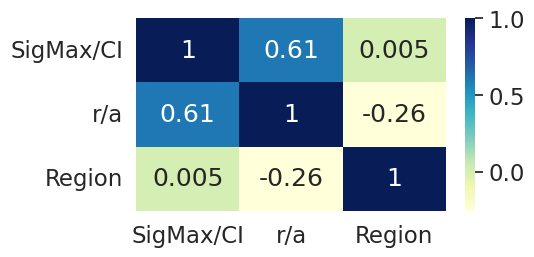

In [7]:
# Figure out the Corrolation matrix between the features
# Higher than 0.8 means should not be proceed.
sns.set(rc = {'figure.figsize':(5,2.5)}) # enlarges the heatmap size
sns.set(font_scale = 1.5)
edz_corr = sns.heatmap(edz.corr(), cmap="YlGnBu", annot=True)

## Plotting the entire data

<Axes: xlabel='SigMax/CI', ylabel='r/a'>

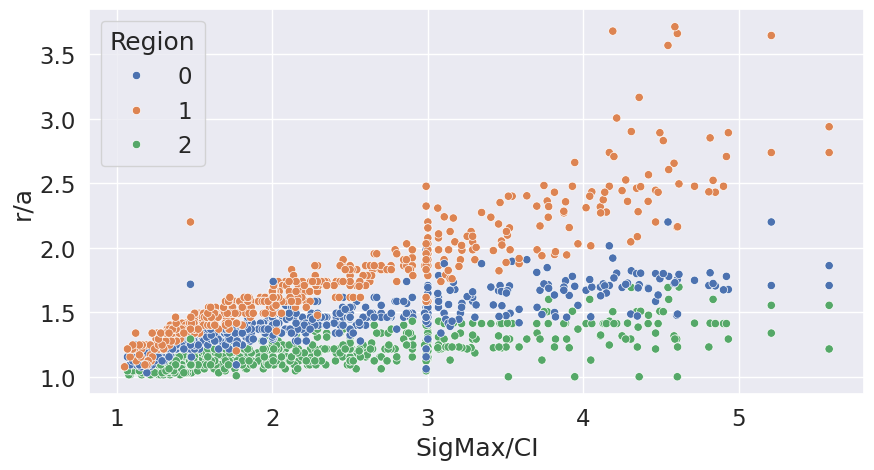

In [8]:
# Initial plot to have a preliminary idea about the data
f, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x=edz['SigMax/CI'], y=edz['r/a'], data=edz, palette = 'deep', hue='Region')

## Labeling the Data For Different EDZs

###HDZ

In [9]:
# Denoting the values equal to 2 in the "region" column of the CSV file that was read and called edz correspond to HDZ
# In other word slicing the part of edz that are only have region number 2 and call it HDZ
# Then sorting the HDZ by "SigMax/CI" column
HDZ = edz[edz['Region']== 2]
HDZ = HDZ.sort_values(by = 'SigMax/CI', ascending= True).reset_index(drop=True)
x_HDZ = np.array(HDZ ['SigMax/CI']).reshape(-1,1)
y_HDZ = np.array(HDZ['r/a']).reshape(-1,1)
HDZ

SigMax/CI       r/a  Region
0     1.050000  1.076923       2
1     1.068521  1.046154       2
2     1.068521  1.061538       2
3     1.077512  1.015385       2
4     1.085608  1.015385       2
..         ...       ...     ...
525   4.932136  1.292308       2
526   5.208333  1.553846       2
527   5.208333  1.338462       2
528   5.580357  1.215385       2
529   5.580357  1.553846       2

[530 rows x 3 columns]

### EDZi

In [10]:
# Same procedure for the second region
EDZi = edz[edz['Region']== 0]
EDZi = EDZi.sort_values(by = 'SigMax/CI', ascending= True).reset_index(drop=True)
x_EDZi = np.array(EDZi ['SigMax/CI']).reshape(-1,1)
y_EDZi = np.array(EDZi['r/a']).reshape(-1,1)
EDZi

SigMax/CI       r/a  Region
0     1.050000  1.076923       0
1     1.068521  1.153846       0
2     1.068521  1.153846       0
3     1.077512  1.153846       0
4     1.085608  1.092308       0
..         ...       ...     ...
532   4.932136  1.676923       0
533   5.208333  2.200000       0
534   5.208333  1.707692       0
535   5.580357  1.707692       0
536   5.580357  1.861538       0

[537 rows x 3 columns]

### EDZo

In [11]:
# Same for the last region
EDZo = edz[edz['Region']== 1]
EDZo = EDZo.sort_values(by = 'SigMax/CI', ascending= True).reset_index(drop=True)
x_EDZo = np.array(EDZo ['SigMax/CI']).reshape(-1,1)
y_EDZo = np.array(EDZo['r/a']).reshape(-1,1)
EDZo

SigMax/CI       r/a  Region
0     1.050000  1.076923       1
1     1.068521  1.215385       1
2     1.068521  1.215385       1
3     1.077512  1.215385       1
4     1.085608  1.153846       1
..         ...       ...     ...
532   4.932136  2.892308       1
533   5.208333  3.646154       1
534   5.208333  2.738462       1
535   5.580357  2.738462       1
536   5.580357  2.938462       1

[537 rows x 3 columns]

## Perras and Diederichs (2016) VS Golabchi and Perras (2023)

In [12]:
# The numerical data from Perras and Diederichs (2016) was expanded for the current study.
# This is to denote the numerical data expansion done for this research (The numerical work)

###HDZ

In [13]:
HDZ_PerrasDiederichs = HDZ[HDZ['SigMax/CI']<= 3]
HDZ_PerrasDiederichs.sort_values(by = 'SigMax/CI', ascending= True, inplace=True)
x_HDZ_PerrasDiederichs = np.array(HDZ_PerrasDiederichs ['SigMax/CI']).reshape(-1,1)
y_HDZ_PerrasDiederichs = np.array(HDZ_PerrasDiederichs['r/a']).reshape(-1,1)

In [14]:
HDZ_GolabchiPerras = HDZ[HDZ['SigMax/CI']> 3]
HDZ_GolabchiPerras.sort_values(by = 'SigMax/CI', ascending= True, inplace=True)
x_HDZ_GolabchiPerras = np.array(HDZ_GolabchiPerras ['SigMax/CI']).reshape(-1,1)
y_HDZ_GolabchiPerras = np.array(HDZ_GolabchiPerras['r/a']).reshape(-1,1)

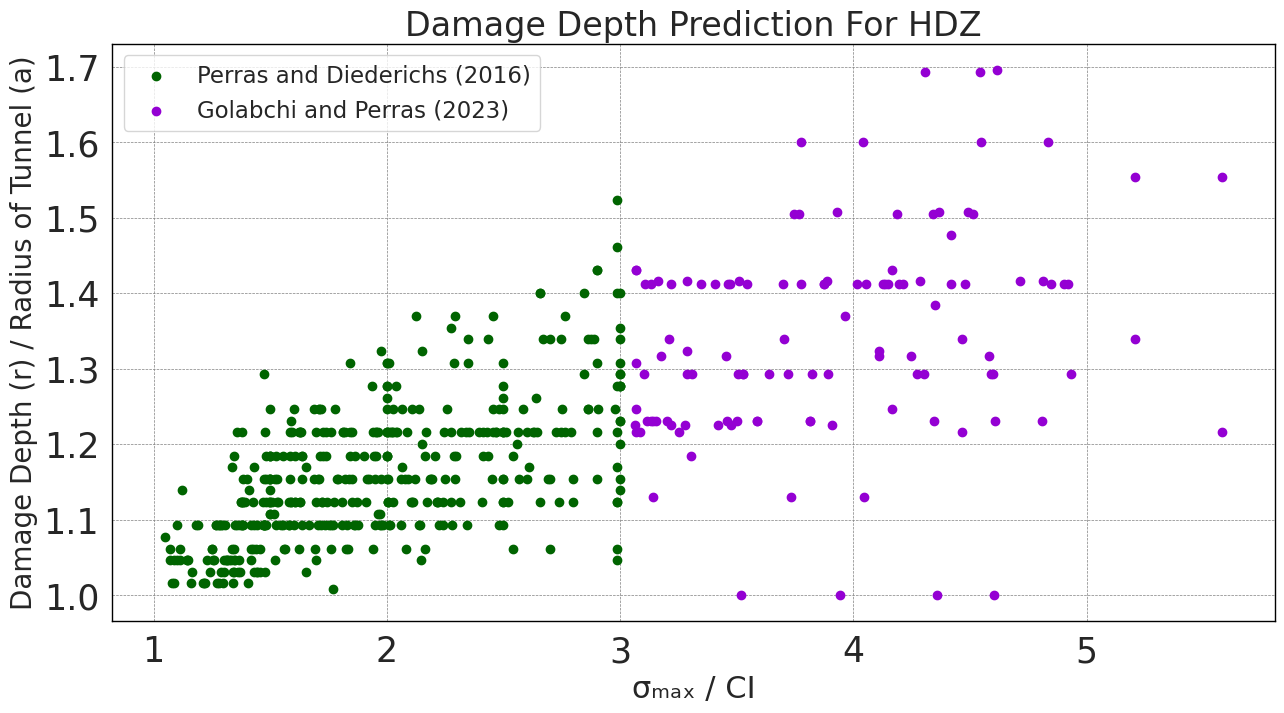

In [15]:

f, ax = plt.subplots(figsize=(15, 7.5))
ax.set_facecolor('w')

# Plot the data
plt.scatter(x_HDZ_PerrasDiederichs, y_HDZ_PerrasDiederichs, color='darkgreen', label='Perras and Diederichs (2016)')
plt.scatter(x_HDZ_GolabchiPerras, y_HDZ_GolabchiPerras, color='darkviolet', label='Golabchi and Perras (2023)')


ax.tick_params(axis='both', labelsize=25)

plt.title('Damage Depth Prediction For HDZ', size=24)
plt.xlabel('\u03C3\u2098\u2090\u2093 / CI', size=22)
plt.ylabel('Damage Depth (r) / Radius of Tunnel (a)', size=20)
plt.legend(facecolor='w')
# Set the margin lines
ax.spines['left'].set_linewidth(1)    # Left margin line
ax.spines['bottom'].set_linewidth(1)  # Bottom margin line
ax.spines['right'].set_linewidth(1)   # Right margin line
ax.spines['top'].set_linewidth(1)     # Top margin line
# Set the border lines
ax.spines['left'].set_color('black')    # Left border line color
ax.spines['bottom'].set_color('black')  # Bottom border line color
ax.spines['right'].set_color('black')   # Right border line color
ax.spines['top'].set_color('black')     # Top border line color
# Set the grid
plt.grid(linewidth=0.5, linestyle='--', color='gray')
# Show the plot
plt.show()

###EDZi

In [16]:
EDZi_PerrasDiederichs = EDZi[EDZi['SigMax/CI']<= 3]
EDZi_PerrasDiederichs.sort_values(by = 'SigMax/CI', ascending= True, inplace=True)
x_EDZi_PerrasDiederichs = np.array(EDZi_PerrasDiederichs ['SigMax/CI']).reshape(-1,1)
y_EDZi_PerrasDiederichs = np.array(EDZi_PerrasDiederichs['r/a']).reshape(-1,1)

In [17]:
EDZi_GolabchiPerras = EDZi[EDZi['SigMax/CI']> 3]
EDZi_GolabchiPerras.sort_values(by = 'SigMax/CI', ascending= True, inplace=True)
x_EDZi_GolabchiPerras = np.array(EDZi_GolabchiPerras ['SigMax/CI']).reshape(-1,1)
y_EDZi_GolabchiPerras = np.array(EDZi_GolabchiPerras['r/a']).reshape(-1,1)

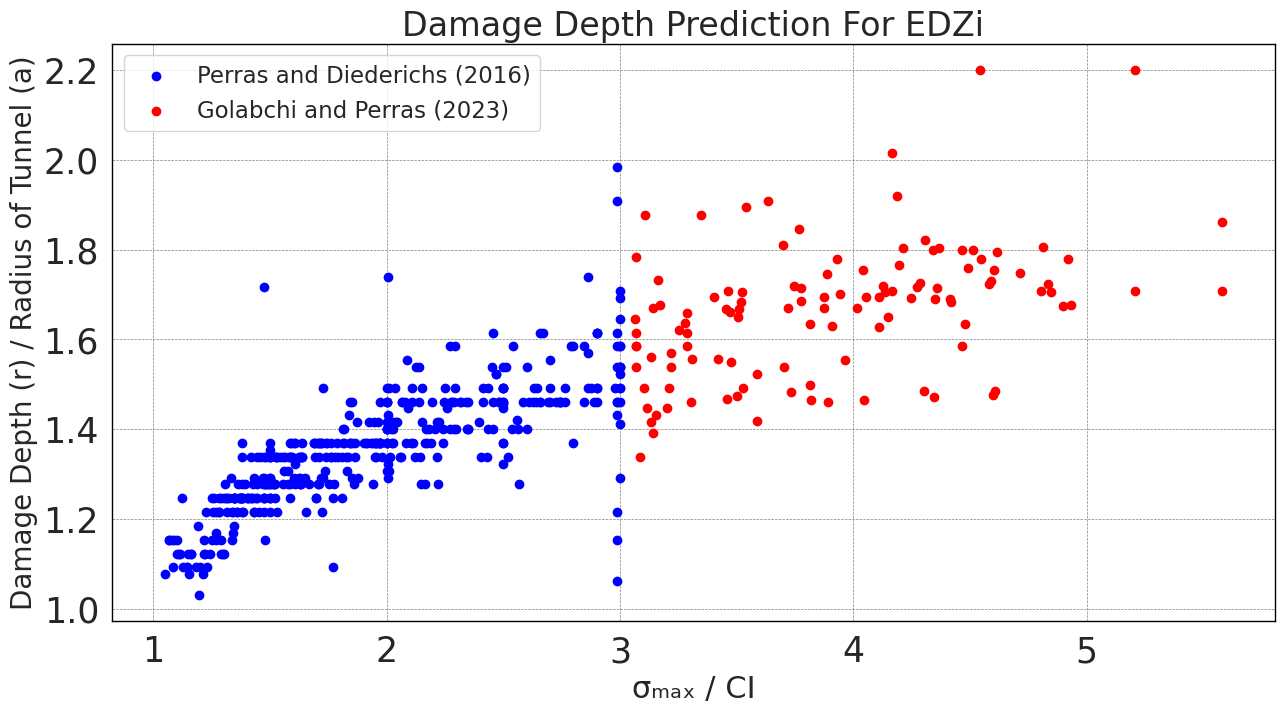

In [18]:
f, ax = plt.subplots(figsize=(15, 7.5))
ax.set_facecolor('w')
plt.scatter (x_EDZi_PerrasDiederichs, y_EDZi_PerrasDiederichs, color= 'blue', label = 'Perras and Diederichs (2016)')
plt.scatter (x_EDZi_GolabchiPerras, y_EDZi_GolabchiPerras, color = 'red', label = 'Golabchi and Perras (2023)')
ax.tick_params(axis='both', labelsize=25)
# plt.xlim(1,5)
plt.title('Damage Depth Prediction For EDZi', size= 24)
# plt.ylim(1,2.5)
plt.xlabel('\u03C3\u2098\u2090\u2093 / CI', size= 22)
plt.ylabel('Damage Depth (r) / Radius of Tunnel (a)',size=20)
# Set the margin lines
ax.spines['left'].set_linewidth(1)    # Left margin line
ax.spines['bottom'].set_linewidth(1)  # Bottom margin line
ax.spines['right'].set_linewidth(1)   # Right margin line
ax.spines['top'].set_linewidth(1)     # Top margin line
# Set the border lines
ax.spines['left'].set_color('black')    # Left border line color
ax.spines['bottom'].set_color('black')  # Bottom border line color
ax.spines['right'].set_color('black')   # Right border line color
ax.spines['top'].set_color('black')     # Top border line color
# Set the grid
plt.grid(linewidth=0.5, linestyle='--', color='gray')
plt.legend(facecolor='w')

###EDZo

In [19]:
EDZo_PerrasDiederichs = EDZo[EDZo['SigMax/CI']<= 3]
EDZo_PerrasDiederichs.sort_values(by = 'SigMax/CI', ascending= True, inplace=True)
x_EDZo_PerrasDiederichs = np.array(EDZo_PerrasDiederichs ['SigMax/CI']).reshape(-1,1)
y_EDZo_PerrasDiederichs = np.array(EDZo_PerrasDiederichs['r/a']).reshape(-1,1)

In [20]:
EDZo_GolabchiPerras = EDZo[EDZo['SigMax/CI']> 3]
EDZo_GolabchiPerras.sort_values(by = 'SigMax/CI', ascending= True, inplace=True)
x_EDZo_GolabchiPerras = np.array(EDZo_GolabchiPerras ['SigMax/CI']).reshape(-1,1)
y_EDZo_GolabchiPerras = np.array(EDZo_GolabchiPerras['r/a']).reshape(-1,1)

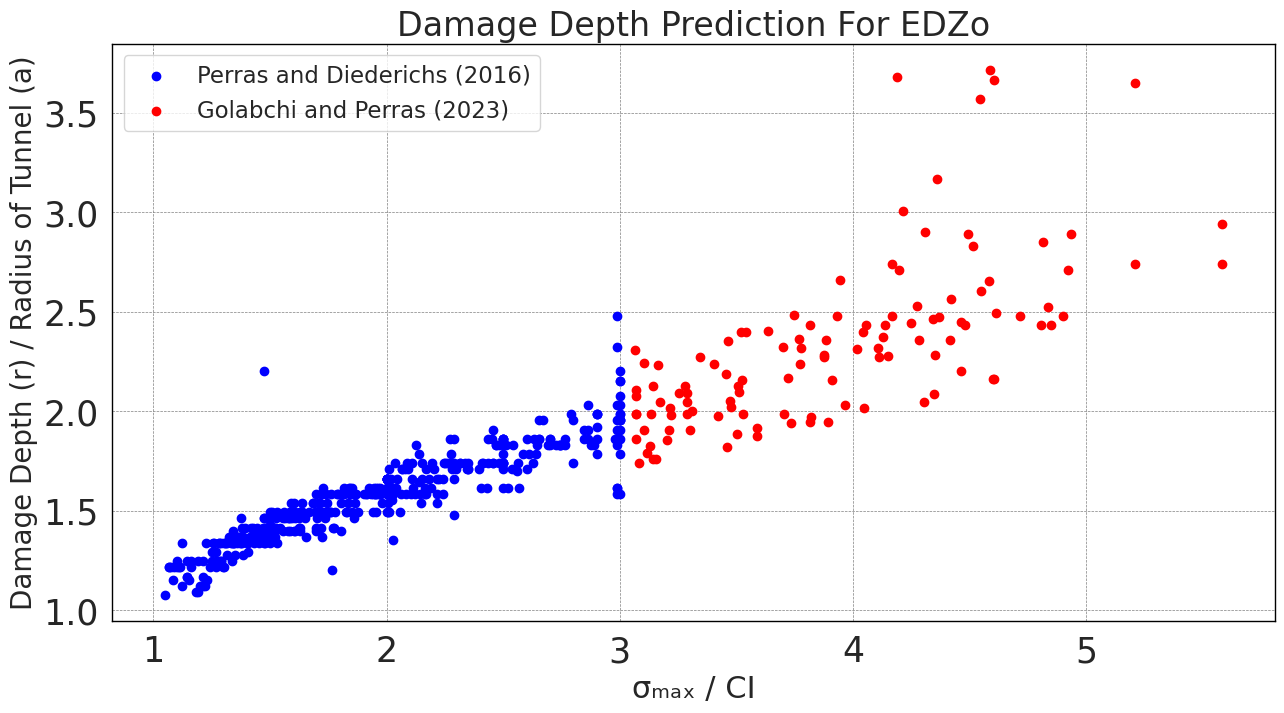

In [21]:
f, ax = plt.subplots(figsize=(15, 7.5))
ax.set_facecolor('w')
plt.scatter (x_EDZo_PerrasDiederichs, y_EDZo_PerrasDiederichs, color= 'blue', label = 'Perras and Diederichs (2016)')
plt.scatter (x_EDZo_GolabchiPerras, y_EDZo_GolabchiPerras, color = 'red', label = 'Golabchi and Perras (2023)')
ax.tick_params(axis='both', labelsize=25)
# plt.xlim(1,5)
plt.title('Damage Depth Prediction For EDZo', size= 24)
# plt.ylim(1,2.5)
plt.xlabel('\u03C3\u2098\u2090\u2093 / CI', size= 22)
plt.ylabel('Damage Depth (r) / Radius of Tunnel (a)',size=20)
# Set the margin lines
ax.spines['left'].set_linewidth(1)    # Left margin line
ax.spines['bottom'].set_linewidth(1)  # Bottom margin line
ax.spines['right'].set_linewidth(1)   # Right margin line
ax.spines['top'].set_linewidth(1)     # Top margin line
# Set the border lines
ax.spines['left'].set_color('black')    # Left border line color
ax.spines['bottom'].set_color('black')  # Bottom border line color
ax.spines['right'].set_color('black')   # Right border line color
ax.spines['top'].set_color('black')     # Top border line color
# Set the grid
plt.grid(linewidth=0.5, linestyle='--', color='gray')
plt.legend(facecolor='w')

###TOTAL

In [22]:
PerrasDiederichs = edz[edz['SigMax/CI']<= 3]
PerrasDiederichs.sort_values(by = 'SigMax/CI', ascending= True, inplace=True)
x_PerrasDiederichs = np.array(PerrasDiederichs ['SigMax/CI']).reshape(-1,1)
y_PerrasDiederichs = np.array(PerrasDiederichs['r/a']).reshape(-1,1)

In [23]:
GolabchiPerras = edz[edz['SigMax/CI']> 3]
GolabchiPerras.sort_values(by = 'SigMax/CI', ascending= True, inplace=True)
x_GolabchiPerras = np.array(GolabchiPerras ['SigMax/CI']).reshape(-1,1)
y_GolabchiPerras = np.array(GolabchiPerras['r/a']).reshape(-1,1)

### Plotting

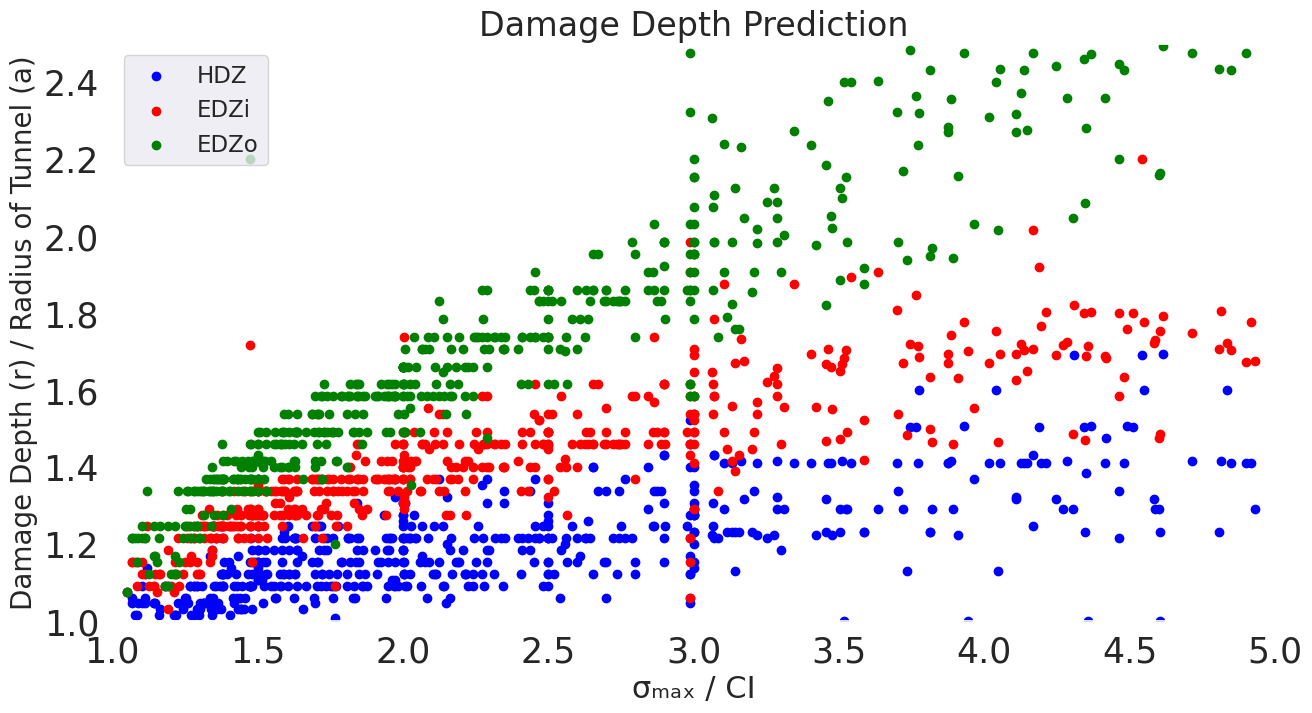

In [24]:
f, ax = plt.subplots(figsize=(15, 7.5))
ax.set_facecolor('w')
plt.scatter (x_HDZ, y_HDZ, color= 'blue', label = 'HDZ')
plt.scatter (x_EDZi, y_EDZi, color = 'red', label = 'EDZi')
plt.scatter (x_EDZo, y_EDZo, color = 'green', label = 'EDZo')
ax.tick_params(axis='both', labelsize=25)
plt.xlim(1,5)
plt.title('Damage Depth Prediction', size= 24)
plt.ylim(1,2.5)
plt.xlabel('\u03C3\u2098\u2090\u2093 / CI', size= 22)
plt.ylabel('Damage Depth (r) / Radius of Tunnel (a)',size=20)
plt.legend()

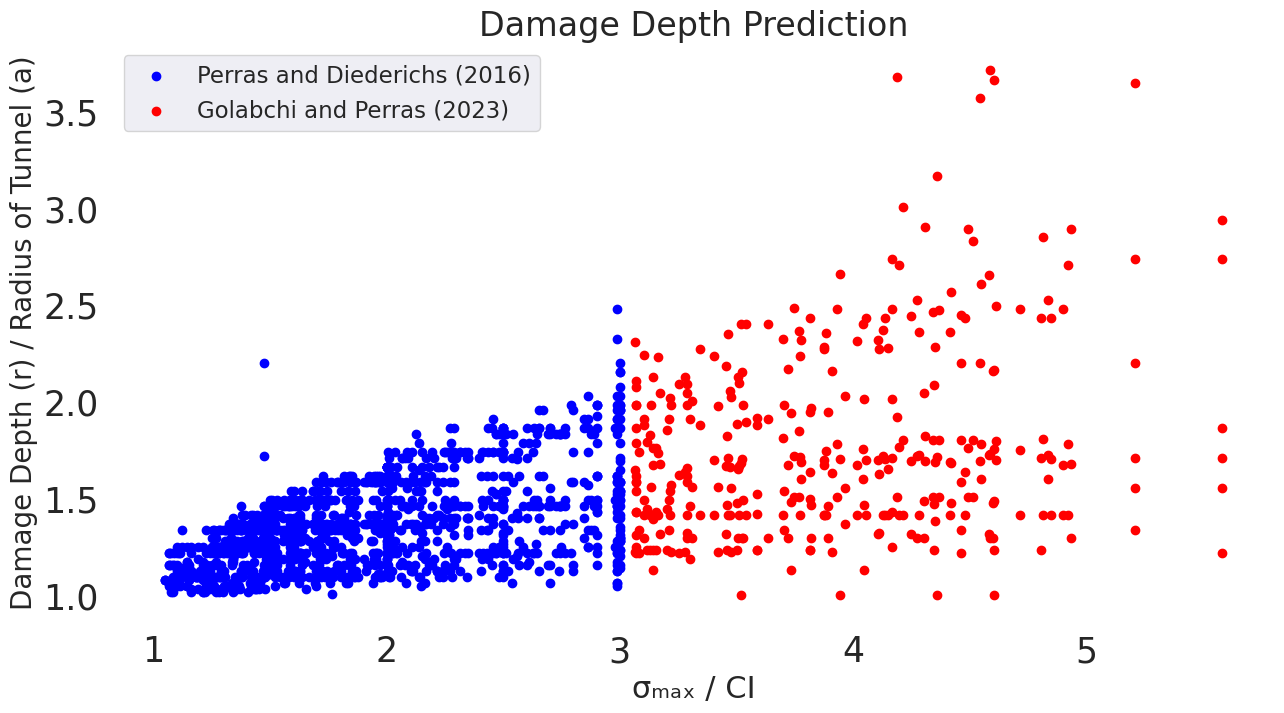

In [25]:
f, ax = plt.subplots(figsize=(15, 7.5))
ax.set_facecolor('w')
plt.scatter (x_PerrasDiederichs, y_PerrasDiederichs, color= 'blue', label = 'Perras and Diederichs (2016)')
plt.scatter (x_GolabchiPerras, y_GolabchiPerras, color = 'red', label = 'Golabchi and Perras (2023)')
ax.tick_params(axis='both', labelsize=25)
# plt.xlim(1,5)
plt.title('Damage Depth Prediction', size= 24)
# plt.ylim(1,2.5)
plt.xlabel('\u03C3\u2098\u2090\u2093 / CI', size= 22)
plt.ylabel('Damage Depth (r) / Radius of Tunnel (a)',size=20)
plt.legend()

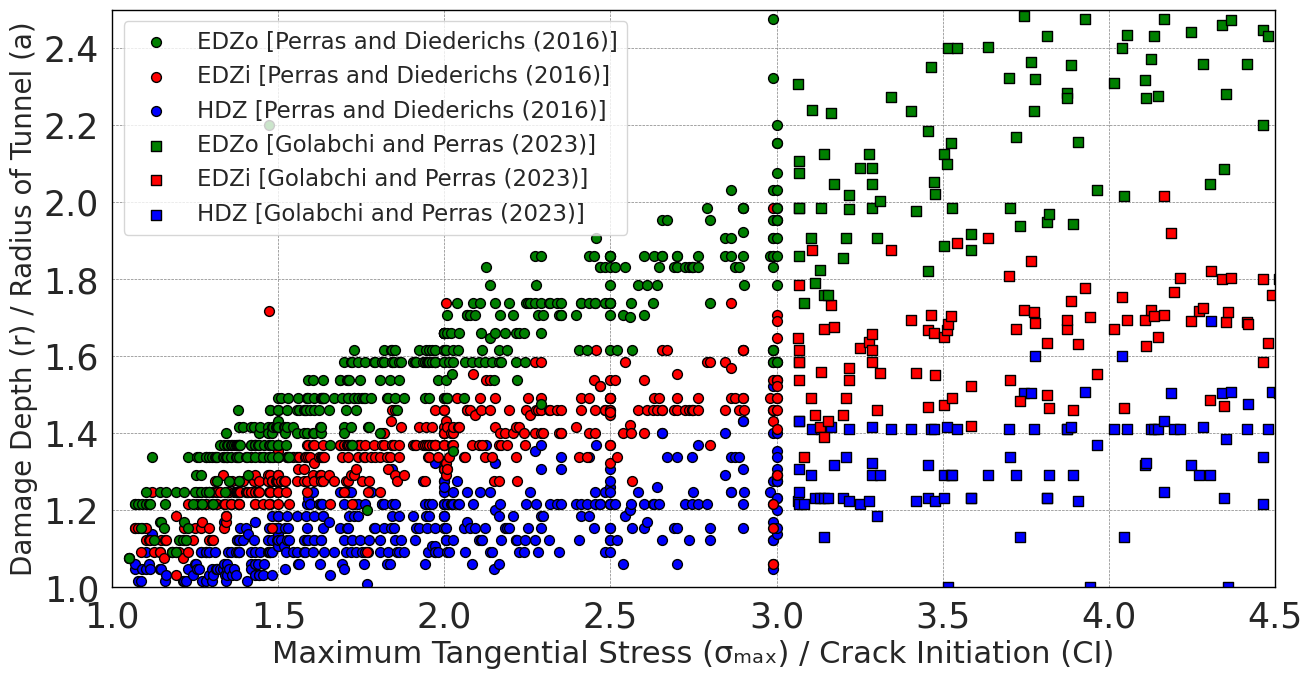

In [26]:
f, ax = plt.subplots(figsize=(15, 7.5))
ax.set_facecolor('w')
plt.scatter (x_HDZ_PerrasDiederichs, y_HDZ_PerrasDiederichs, s=50, color= 'blue', label = 'HDZ [Perras and Diederichs (2016)]', edgecolors='black')
plt.scatter (x_HDZ_GolabchiPerras, y_HDZ_GolabchiPerras, s=50, color = 'blue', label = 'HDZ [Golabchi and Perras (2023)]', edgecolors='black', marker='s')
plt.scatter (x_EDZi_PerrasDiederichs, y_EDZi_PerrasDiederichs, s=50, color= 'red', label = 'EDZi [Perras and Diederichs (2016)]', edgecolors='black')
plt.scatter (x_EDZi_GolabchiPerras, y_EDZi_GolabchiPerras, s=50, color = 'red', label = 'EDZi [Golabchi and Perras (2023)]', edgecolors='black', marker='s')
plt.scatter (x_EDZo_PerrasDiederichs, y_EDZo_PerrasDiederichs, s=50, color= 'green', label = 'EDZo [Perras and Diederichs (2016)]', edgecolors='black')
plt.scatter (x_EDZo_GolabchiPerras, y_EDZo_GolabchiPerras, s=50, color = 'green', label = 'EDZo [Golabchi and Perras (2023)]', edgecolors='black', marker='s')
ax.tick_params(axis='both', labelsize=25)
plt.xlim(1,4.5)
# plt.title('Damage Depth Prediction For EDZs', size= 24)
plt.ylim(1,2.5)
# Set the margin lines
ax.spines['left'].set_linewidth(1)    # Left margin line
ax.spines['bottom'].set_linewidth(1)  # Bottom margin line
ax.spines['right'].set_linewidth(1)   # Right margin line
ax.spines['top'].set_linewidth(1)     # Top margin line
# Set the border lines
ax.spines['left'].set_color('black')    # Left border line color
ax.spines['bottom'].set_color('black')  # Bottom border line color
ax.spines['right'].set_color('black')   # Right border line color
ax.spines['top'].set_color('black')     # Top border line color

# Custom Legend Order
custom_legend_order = ['EDZo [Perras and Diederichs (2016)]', 'EDZi [Perras and Diederichs (2016)]', 'HDZ [Perras and Diederichs (2016)]', 'EDZo [Golabchi and Perras (2023)]', 'EDZi [Golabchi and Perras (2023)]', 'HDZ [Golabchi and Perras (2023)]']
handles, labels = plt.gca().get_legend_handles_labels()
ordered_handles = [handles[labels.index(label)] for label in custom_legend_order]
ordered_labels = custom_legend_order


# Set the grid
plt.grid(linewidth=0.5, linestyle='--', color='gray')
plt.xlabel('Maximum Tangential Stress (\u03C3\u2098\u2090\u2093) / Crack Initiation (CI)', size= 22)
plt.ylabel('Damage Depth (r) / Radius of Tunnel (a)',size=20)
plt.legend(ordered_handles, ordered_labels,facecolor='w')
# plt.savefig("Golabchi and Perras work combined.png", format="png", dpi=600, bbox_inches = 'tight')

## **Statistical Modeling**

In [27]:
# The simple statistical regression was done to set as a benchmark for the ML regressions.

In [28]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree= 2)
xp_HDZ = poly.fit_transform(x_HDZ)
xp_EDZi = poly.fit_transform(x_EDZi)
xp_EDZo = poly.fit_transform(x_EDZo)

In [29]:
import statsmodels.api as sm
#HDZ
model_HDZ = sm.OLS(y_HDZ, xp_HDZ).fit()
ypred_HDZ = np.array(model_HDZ.predict(xp_HDZ)).reshape(-1,1)
# EDZi
model_EDZi = sm.OLS(y_EDZi,xp_EDZi).fit()
ypred_EDZi = np.array(model_EDZi.predict(xp_EDZi)).reshape(-1,1)
#EDZo
model_EDZo = sm.OLS(y_EDZo, xp_EDZo).fit()
ypred_EDZo = np.array(model_EDZo.predict(xp_EDZo)).reshape(-1,1)

In [30]:
MAE_Traditional_HDZ=np.mean(np.abs(ypred_HDZ-y_HDZ))
MAE_Traditional_EDZi=np.mean(np.abs(ypred_EDZi-y_EDZi))
MAE_Traditional_EDZo=np.mean(np.abs(ypred_EDZo-y_EDZo))
print(MAE_Traditional_HDZ)
print(MAE_Traditional_EDZi)
print(MAE_Traditional_EDZo)

0.06560341191022426
0.06376647727192125
0.0939936738498973


In [31]:
print('The HDZ summary would be:\n',model_HDZ.summary())
print('\n The EDZi summary would be:\n',model_EDZi.summary())
print('\n The EDZo summary would be:\n',model_EDZo.summary())

The HDZ summary would be:
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     301.7
Date:                Sat, 28 Dec 2024   Prob (F-statistic):           4.67e-88
Time:                        16:23:24   Log-Likelihood:                 539.10
No. Observations:                 530   AIC:                            -1072.
Df Residuals:                     527   BIC:                            -1059.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9045    

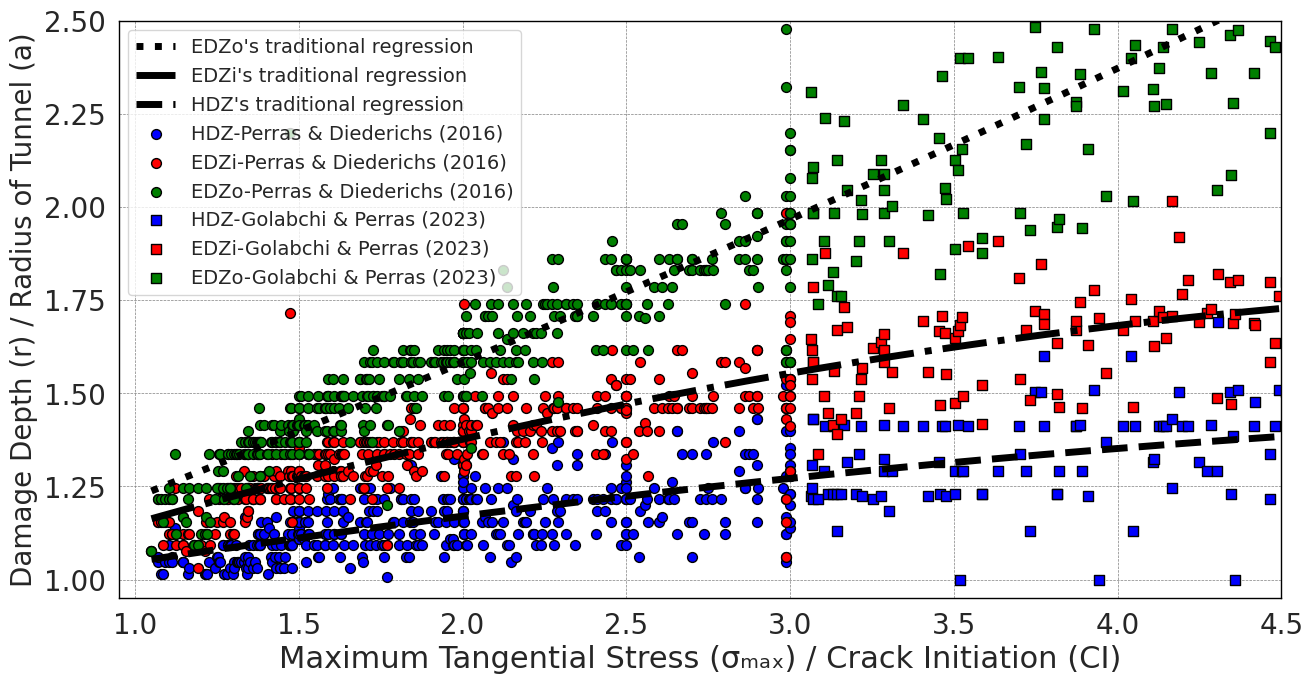

In [32]:
# Again plotting the previous numerical models vs the expanded ones for this research
# for visualization purposes.

f, ax = plt.subplots(figsize=(15, 7.5))
ax.set_facecolor('w')
plt.ylim(0.95,2.5)
plt.xlim(0.95,4.5)
plt.yticks(np.arange(1, 2.51, step=0.25))
ax.tick_params(axis='both', labelsize=20)
plt.plot(x_EDZo, ypred_EDZo, linewidth = 5, linestyle='dotted', color = 'black', label= 'EDZo\'s traditional regression')
plt.plot(x_EDZi, ypred_EDZi, linewidth = 5, linestyle='dashdot', color = 'black', label= 'EDZi\'s traditional regression')
plt.plot(x_HDZ, ypred_HDZ, linewidth = 5, linestyle='dashed', color = 'black', label= 'HDZ\'s traditional regression')

plt.scatter (x_HDZ_PerrasDiederichs, y_HDZ_PerrasDiederichs, s=50, color= 'blue', label = 'HDZ-Perras & Diederichs (2016)', edgecolors='black')
plt.scatter (x_EDZi_PerrasDiederichs, y_EDZi_PerrasDiederichs, s=50, color= 'red', label = 'EDZi-Perras & Diederichs (2016)', edgecolors='black')
plt.scatter (x_EDZo_PerrasDiederichs, y_EDZo_PerrasDiederichs, s=50, color= 'green', label = 'EDZo-Perras & Diederichs (2016)', edgecolors='black')

plt.scatter (x_HDZ_GolabchiPerras, y_HDZ_GolabchiPerras, s=50, color = 'blue', label = 'HDZ-Golabchi & Perras (2023)', edgecolors='black', marker='s')
plt.scatter (x_EDZi_GolabchiPerras, y_EDZi_GolabchiPerras, s=50, color = 'red', label = 'EDZi-Golabchi & Perras (2023)', edgecolors='black', marker='s')
plt.scatter (x_EDZo_GolabchiPerras, y_EDZo_GolabchiPerras, s=50, color = 'green', label = 'EDZo-Golabchi & Perras (2023)', edgecolors='black', marker='s')

plt.xlabel('Maximum Tangential Stress (\u03C3\u2098\u2090\u2093) / Crack Initiation (CI)', size= 22)
plt.ylabel('Damage Depth (r) / Radius of Tunnel (a)',size=27)
# plt.title('Polynomial regression plots using Stats model', size = 24)
plt.ylabel('Damage Depth (r) / Radius of Tunnel (a)',size=20)

# Set the margin lines
ax.spines['left'].set_linewidth(1)    # Left margin line
ax.spines['bottom'].set_linewidth(1)  # Bottom margin line
ax.spines['right'].set_linewidth(1)   # Right margin line
ax.spines['top'].set_linewidth(1)     # Top margin line
# Set the border lines
ax.spines['left'].set_color('black')    # Left border line color
ax.spines['bottom'].set_color('black')  # Bottom border line color
ax.spines['right'].set_color('black')   # Right border line color
ax.spines['top'].set_color('black')     # Top border line color
# Set the grid
plt.grid(linewidth=0.5, linestyle='--', color='gray')

plt.legend(loc='upper left', fontsize= 14, facecolor='w')
# plt.savefig("Golabchi and Perras work combined Plus traditional regression.png", format="png", dpi=600, bbox_inches = 'tight')

## **Empirical Data**

In [33]:
# Adding the in-situ data from the underground research laboratories from
# all around the world as the point of reference for confirmation of numerical models authenticity

x_invert_HDZ=(1.452, 2.012, 2.012, 0.963,1.176, 1.327, 1.573, 1.68, 1.78, 1.9, 1.94, 2.19, 2.3, 0.95, 0.92)
y_invert_HDZ=(1, 1, 1.229, 1.001,1, 1.0147, 1.183, 1.2, 1.27, 1.15, 1.23, 1.3, 1.22, 1.065, 1.11)
print('Size of X is ',len(x_invert_HDZ), ' and size of Y is ', len(y_invert_HDZ))

x_invert_EDZi=(1.452, 2.012, 2.012, 0.963, 1.176, 4, 4, 2.489, 2.489, 1.327)
y_invert_EDZi=(1.029, 1.171, 1.4, 1.005, 1, 1.5, 1.694, 1.533, 1.333, 1.025)
print('Size of X is ',len(x_invert_EDZi), ' and size of Y is ', len(y_invert_EDZi))

x_invert_EDZo=(1.452, 2.012, 2.012, 0.963, 4, 4, 2.489, 1.327)
y_invert_EDZo=(1.286, 1.8, 1.571, 1.017, 2.5, 2.389, 1.933, 1.0413)
print('Size of X is ',len(x_invert_EDZo), ' and size of Y is ', len(y_invert_EDZo))

x_crown_HDZ=(1.452, 2.012, 2.012, 0.963, 1.176, 1.327)
y_crown_HDZ=(1.029, 1.8, 1.229, 1.001, 1, 1.0147)
print('Size of X is ',len(x_crown_HDZ), ' and size of Y is ', len(y_crown_HDZ))

x_crown_EDZi=(1.452, 2.012, 2.012, 0.963, 1.176, 4, 4, 2.489, 2.489, 1.327)
y_crown_EDZi=(1.086, 1.286, 1.4, 1.005, 1, 1.5, 1.694, 1.533, 1.333, 1.025)
print('Size of X is ',len(x_crown_EDZi), ' and size of Y is ', len(y_crown_EDZi))

x_crown_EDZo=(1.452, 2.012, 2.012, 0.963, 4, 4, 2.489, 1.327)
y_crown_EDZo=(1.171, 1.371, 1.571, 1.017, 1.667, 2.111, 1.933, 1.0413)
print('Size of X is ',len(x_crown_EDZo), ' and size of Y is ', len(y_crown_EDZo))

x_sidewall_HDZ=(1.452, 2.012, 2.012, 0.963, 1.176, 1.327, 1.688)
y_sidewall_HDZ=(1, 1, 1, 1.001, 1, 1.0147, 1.1304)
print('Size of X is ',len(x_sidewall_HDZ), ' and size of Y is ', len(y_sidewall_HDZ))

x_sidewall_EDZi=(1.452, 2.012, 2.012, 0.963, 1.176, 4, 4, 2.489, 2.489, 1.327, 1.688, 1.607)
y_sidewall_EDZi=(1, 1.457, 1.2, 1.005, 1, 1.333, 1.611, 1.533, 1.333, 1.025, 1.1304, 1.323)
print('Size of X is ',len(x_sidewall_EDZi), ' and size of Y is ', len(y_sidewall_EDZi))

x_sidewall_EDZo=(1.452, 2.012, 2.012, 0.963, 4, 2.489, 1.327)
y_sidewall_EDZo=(1.229, 1.857, 1.686, 1.017, 2.083, 1.933, 1.0413)
print('Size of X is ',len(x_sidewall_EDZo), ' and size of Y is ', len(y_sidewall_EDZo))

x_empirical_data=(1,2,3,4,5)
y_empirical_data= (1,1.5,2,2.5,3)

Size of X is  15  and size of Y is  15
Size of X is  10  and size of Y is  10
Size of X is  8  and size of Y is  8
Size of X is  6  and size of Y is  6
Size of X is  10  and size of Y is  10
Size of X is  8  and size of Y is  8
Size of X is  7  and size of Y is  7
Size of X is  12  and size of Y is  12
Size of X is  7  and size of Y is  7


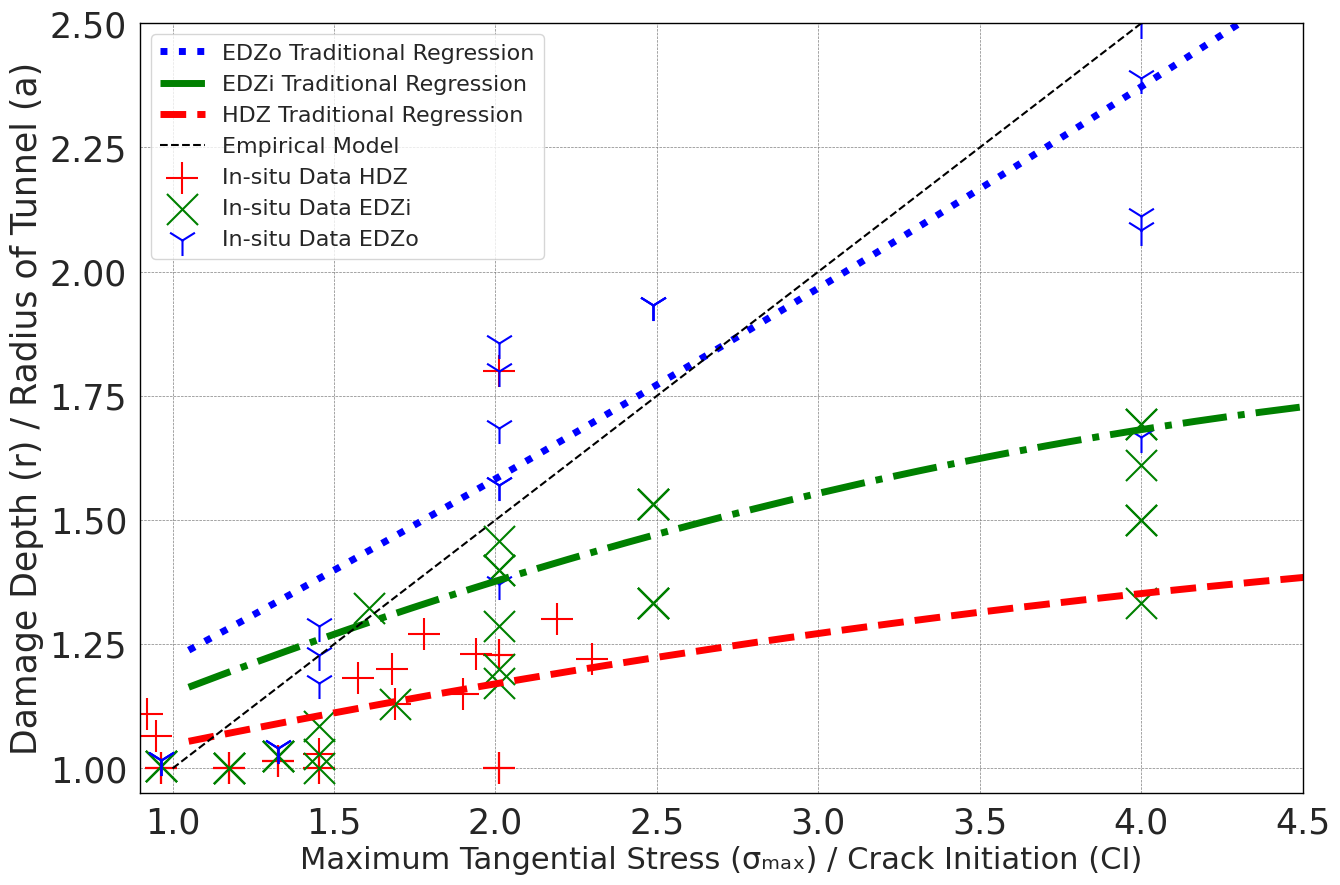

In [34]:
# Keeping things simple and clear prior to start different ML models.
# Plotting the in-situ points from the URL from around the world   and
# Plotting the regression lines from the statistical model    and
# Plotting the empirical model
# Showing the numerical models are in agreement with the in-situ measurements

# plt.figure(figsize=(15, 10))
f, ax = plt.subplots(figsize=(15, 10))
ax.set_facecolor('w')
ax.tick_params(axis='both', labelsize=25)
plt.ylim(0.95, 2.5)
plt.xlim(0.9, 4.5)
plt.yticks(np.arange(1, 2.51, step=0.25))
plt.plot(x_EDZo, ypred_EDZo, linewidth = 5, linestyle='dotted', color = 'blue', label= 'EDZo Traditional Regression')
plt.plot(x_EDZi, ypred_EDZi, linewidth = 5, linestyle='dashdot', color = 'green', label= 'EDZi Traditional Regression')
plt.plot(x_HDZ, ypred_HDZ, linewidth = 5, linestyle='dashed', color = 'red', label= 'HDZ Traditional Regression')
plt.plot(x_empirical_data, y_empirical_data, linestyle='dashed', color='black', label='Empirical Model')
plt.scatter(x_invert_HDZ, y_invert_HDZ, marker='+', color='red', s=500, label='In-situ Data HDZ')
plt.scatter(x_crown_HDZ, y_crown_HDZ, marker='+', color='red', s=500)
plt.scatter(x_sidewall_HDZ, y_sidewall_HDZ, marker='+', color='red', s=500)
# plt.scatter (x_EDZi, y_EDZi, label = 'EDZi [Perras and Diederichs 2016]', color='black', s=10)
plt.scatter(x_invert_EDZi, y_invert_EDZi, marker='x', color='green', s=500, label='In-situ Data EDZi')
plt.scatter(x_crown_EDZi, y_crown_EDZi, marker='x', color='green', s=500)
plt.scatter(x_sidewall_EDZi, y_sidewall_EDZi, marker='x', color='green', s=500)
# plt.scatter (x_EDZo, y_EDZo, label = 'EDZo[Perras and Diederichs 2016]', color='black', s=10)
plt.scatter(x_invert_EDZo, y_invert_EDZo, marker='1', color='blue', s=500, label='In-situ Data EDZo')
plt.scatter(x_crown_EDZo, y_crown_EDZo, marker='1', color='blue', s=500)
plt.scatter(x_sidewall_EDZo, y_sidewall_EDZo, marker='1', color='blue', s=500)
# Set the margin lines
ax.spines['left'].set_linewidth(1)    # Left margin line
ax.spines['bottom'].set_linewidth(1)  # Bottom margin line
ax.spines['right'].set_linewidth(1)   # Right margin line
ax.spines['top'].set_linewidth(1)     # Top margin line
# Set the border lines
ax.spines['left'].set_color('black')    # Left border line color
ax.spines['bottom'].set_color('black')  # Bottom border line color
ax.spines['right'].set_color('black')   # Right border line color
ax.spines['top'].set_color('black')     # Top border line color
# Set the grid
plt.grid(linewidth=0.5, linestyle='--', color='gray')

plt.xlabel('Maximum Tangential Stress (\u03C3\u2098\u2090\u2093) / Crack Initiation (CI)', size= 22)
plt.ylabel('Damage Depth (r) / Radius of Tunnel (a)',size=25)
plt.legend(loc='upper left', fontsize=16, facecolor='w')
# plt.savefig("Initial Graph.png", format="png", dpi=1200, bbox_inches = 'tight')

# **1. Regression**

In [35]:
# Splitting the data into training set and test sets with ratio of 0.8 to 0.2
# for all the regions

# HDZ
x_train_HDZ, x_test_HDZ, y_train_HDZ, y_test_HDZ = train_test_split(x_HDZ,\
                                            y_HDZ,test_size=0.2, random_state=7)
# poly = PolynomialFeatures(degree= 2) is defined for the stats model so we can
# use it in here too.
x_train_HDZ_poly2=poly.fit_transform(x_train_HDZ)
x_test_HDZ_poly2=poly.fit_transform(x_test_HDZ)

# EDZi
x_train_EDZi, x_test_EDZi, y_train_EDZi, y_test_EDZi = train_test_split(x_EDZi,\
                                          y_EDZi, test_size=0.2, random_state=7)
# poly = PolynomialFeatures(degree= 2) is defined for the stats model so we can
# use it in here too.
x_train_EDZi_poly2=poly.fit_transform(x_train_EDZi)
x_test_EDZi_poly2=poly.fit_transform(x_test_EDZi)

# EDZo

x_train_EDZo, x_test_EDZo, y_train_EDZo, y_test_EDZo = train_test_split(x_EDZo,\
                                          y_EDZo, test_size=0.2, random_state=7)
# poly = PolynomialFeatures(degree= 2) is defined for the stats model so we can
# use it in here too.
x_train_EDZo_poly2=poly.fit_transform(x_train_EDZo)
x_test_EDZo_poly2=poly.fit_transform(x_test_EDZo)

##**1.1 Polynomial Regression**

### **HDZ**

In [36]:
polynomial_reg=LinearRegression().fit(x_train_HDZ_poly2, y_train_HDZ)
predicted_y_test_poly2_HDZ_linear=polynomial_reg.predict(x_test_HDZ_poly2)
r2_value=r2_score(y_test_HDZ, predicted_y_test_poly2_HDZ_linear)
mae_value=mean_absolute_error(y_test_HDZ, predicted_y_test_poly2_HDZ_linear)
mse_value=mean_squared_error(y_test_HDZ, predicted_y_test_poly2_HDZ_linear)
rmse_value = np.sqrt (mse_value)
print('The R-Squared value is {:.3f}. The MAE, MSE, and RMSE are {:.3f}, {:.3f}, \
and {:.3f}, respectively.'.format(r2_value, mae_value, mse_value, rmse_value))

The R-Squared value is 0.465. The MAE, MSE, and RMSE are 0.075, 0.010, and 0.100, respectively.


### EDZi

In [37]:
polynomial_reg=LinearRegression().fit(x_train_EDZi_poly2, y_train_EDZi)
predicted_y_test_poly2_EDZi_linear=polynomial_reg.predict(x_test_EDZi_poly2)
r2_value=r2_score(y_test_EDZi, predicted_y_test_poly2_EDZi_linear)
mae_value=mean_absolute_error(y_test_EDZi, predicted_y_test_poly2_EDZi_linear)
mse_value=mean_squared_error(y_test_EDZi, predicted_y_test_poly2_EDZi_linear)
rmse_value= np.sqrt(mse_value)
print('The R-Squared value is {:.3f}. The MAE, MSE, and RMSE are {:.3f}, {:.3f},\
and {:.3f}, respectively.'.format(r2_value, mae_value, mse_value, rmse_value))

The R-Squared value is 0.629. The MAE, MSE, and RMSE are 0.085, 0.017,and 0.131, respectively.


### EDZo

In [38]:
polynomial_reg=LinearRegression().fit(x_train_EDZo_poly2, y_train_EDZo)
predicted_y_test_poly2_EDZo_linear=polynomial_reg.predict(x_test_EDZo_poly2)
r2_value=r2_score(y_test_EDZo, predicted_y_test_poly2_EDZo_linear)
mae_value=mean_absolute_error(y_test_EDZo, predicted_y_test_poly2_EDZo_linear)
mse_value=mean_squared_error(y_test_EDZo, predicted_y_test_poly2_EDZo_linear)
rmse_value = np.sqrt(mse_value)
print('The R-Squared value is {:.3f}. The MAE, MSE, and RMSE are {:.3f}, {:.3f}, \
and {:.3f}, respectively.'.format(r2_value, mae_value, mse_value, rmse_value))

The R-Squared value is 0.745. The MAE, MSE, and RMSE are 0.142, 0.074, and 0.272, respectively.


##**1.2 Ridge Regression**

###**HDZ**

In [39]:
# # HyperParameter Tunning
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import Ridge
# Ridge_Reg_HDZ=Ridge()
# params_Ridge_Reg_HDZ={'alpha':[0.01, 0.1, 1, 10, 100],
#                      'solver':['auto', 'svd', 'cholesky', 'lsqr',
#                                'sparse_cg', 'sag', 'saga', 'lbfgs']}
# gridSearchCV_Ridge_Reg_HDZ=GridSearchCV(Ridge_Reg_HDZ, params_Ridge_Reg_HDZ,
#                                         n_jobs=-1, scoring ='r2')
# gridSearchCV_Ridge_Reg_HDZ.fit(x_train_HDZ_poly2, y_train_HDZ)
# print('The best parameters are: ',gridSearchCV_Ridge_Reg_HDZ.best_params_)

"""
The best parameters are:  {'alpha': 0.01, 'solver': 'lsqr'}
"""

"\nThe best parameters are:  {'alpha': 0.01, 'solver': 'lsqr'}\n"

In [40]:
# Model Training
Ridge_Reg_HDZ= Ridge (alpha=0.01, solver='lsqr')
Ridge_Reg_HDZ = Ridge_Reg_HDZ.fit(x_train_HDZ_poly2, y_train_HDZ)
predicted_y_test_HDZ_Ridge=Ridge_Reg_HDZ.predict(x_test_HDZ_poly2)

In [41]:
r2_value_Ridge_HDZ=r2_score(y_test_HDZ, predicted_y_test_HDZ_Ridge)
MAE_Ridge_HDZ=mean_absolute_error(y_test_HDZ, predicted_y_test_HDZ_Ridge)
MSE_Ridge_HDZ=mean_squared_error(y_test_HDZ, predicted_y_test_HDZ_Ridge)
RMSE_Ridge_HDZ=np.sqrt(MSE_Ridge_HDZ)
print('The best fit for HDZ has r_squared value  {:.2f} and mean absolute error, \
squared error, and root mean squared error, {:.3f}, {:.3f}, and {:.3f} respectively.'\
      .format(r2_value_Ridge_HDZ, MAE_Ridge_HDZ, MSE_Ridge_HDZ, RMSE_Ridge_HDZ))

The best fit for HDZ has r_squared value  0.47 and mean absolute error, squared error, and root mean squared error, 0.075, 0.010, and 0.100 respectively.


###**EDZi**

In [42]:
# # HyperParameter Tunning
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import Ridge
# Ridge_Reg_EDZi=Ridge()
# params_Ridge_Reg_EDZi={'alpha':[0.01, 0.1, 1, 10, 100],
#                      'solver':['auto', 'svd', 'cholesky', 'lsqr',
#                                'sparse_cg', 'sag', 'saga', 'lbfgs']}
# gridSearchCV_Ridge_Reg_EDZi=GridSearchCV(Ridge_Reg_EDZi, params_Ridge_Reg_EDZi,
#                                          n_jobs=-1, scoring ='r2')
# gridSearchCV_Ridge_Reg_EDZi.fit(x_train_EDZi_poly2, y_train_EDZi)
# gridSearchCV_Ridge_Reg_EDZi.best_params_

"""
The best parameters are: {'alpha': 1, 'solver': 'lsqr'}
"""

"\nThe best parameters are: {'alpha': 1, 'solver': 'lsqr'}\n"

In [43]:
# Model Training
Ridge_Reg_EDZi = Ridge (alpha=1, solver='lsqr')
Ridge_Reg_EDZi = Ridge_Reg_EDZi.fit(x_train_EDZi_poly2, y_train_EDZi)
predicted_y_test_EDZi_Ridge = Ridge_Reg_EDZi.predict(x_test_EDZi_poly2)

In [44]:
r2_value_Ridge_EDZi=r2_score(y_test_EDZi, predicted_y_test_EDZi_Ridge)
MAE_Ridge_EDZi=mean_absolute_error(y_test_EDZi, predicted_y_test_EDZi_Ridge)
MSE_Ridge_EDZi=mean_squared_error(y_test_EDZi, predicted_y_test_EDZi_Ridge)
RMSE_Ridge_EDZi=np.sqrt(MSE_Ridge_EDZi)
print('The best fit for HDZ has r_squared value  {:.2f} and mean absolute error \
mean squared error, root mean squared error, {:.3f}, {:.3f} and {:.3f}, respectively.'\
      .format(r2_value_Ridge_EDZi, MAE_Ridge_EDZi, MSE_Ridge_EDZi, RMSE_Ridge_EDZi))

The best fit for HDZ has r_squared value  0.63 and mean absolute error mean squared error, root mean squared error, 0.086, 0.017 and 0.131, respectively.


###**EDZo**

In [45]:
# # HyperParameter Tunning
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import Ridge
# Ridge_Reg_EDZo=Ridge()
# params_Ridge_Reg_EDZo={'alpha':[0.01, 0.1, 1, 10, 100],
#                      'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']}
# gridSearchCV_Ridge_Reg_EDZo=GridSearchCV(Ridge_Reg_EDZo, params_Ridge_Reg_EDZo,n_jobs=-1, scoring ='r2')
# gridSearchCV_Ridge_Reg_EDZo.fit(x_train_EDZo_poly2, y_train_EDZo)
# gridSearchCV_Ridge_Reg_EDZo.best_params_

"""
The best parameters are: {'alpha': 0.1, 'solver': 'saga'}
"""

"\nThe best parameters are: {'alpha': 0.1, 'solver': 'saga'}\n"

In [46]:
# Model Training
Ridge_Reg_EDZo= Ridge (alpha=0.1, solver='saga')
Ridge_Reg_EDZo = Ridge_Reg_EDZo.fit(x_train_EDZo_poly2, y_train_EDZo)
predicted_y_test_EDZo_Ridge=Ridge_Reg_EDZo.predict(x_test_EDZo_poly2)

In [47]:
r2_value_Ridge_EDZo=r2_score(y_test_EDZo, predicted_y_test_EDZo_Ridge)
MAE_Ridge_EDZo=mean_absolute_error(y_test_EDZo, predicted_y_test_EDZo_Ridge)
MSE_Ridge_EDZo=mean_squared_error(y_test_EDZo, predicted_y_test_EDZo_Ridge)
RMSE_Ridge_EDZo=np.sqrt(MSE_Ridge_EDZo)
print('The best fit for HDZ has r_squared value  {:.2f} and mean absolute error \
mean squared error, root mean squared error, {:.3f}, {:.3f}, and {:.3f}, respectively.'\
      .format(r2_value_Ridge_EDZo, MAE_Ridge_EDZo, MSE_Ridge_EDZo, RMSE_Ridge_EDZo))

The best fit for HDZ has r_squared value  0.75 and mean absolute error mean squared error, root mean squared error, 0.142, 0.074, and 0.272, respectively.


## **1.3 KNN Regressor**

### **HDZ**

In [48]:
# # HyperParameter Tunning
# from sklearn.model_selection import GridSearchCV
# from sklearn.neighbors import KNeighborsRegressor
# KNN_Reg_HDZ=KNeighborsRegressor()
# params_KNN_Reg_HDZ={'n_neighbors':[1, 2, 3, 4, 5],
#                      'weights':['uniform', 'distance'],
#                     'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
#                     'p':[1, 2]}
# gridSearchCV_KNN_Reg_HDZ=GridSearchCV(KNN_Reg_HDZ, params_KNN_Reg_HDZ,n_jobs=-1, scoring ='r2')
# gridSearchCV_KNN_Reg_HDZ.fit(x_train_HDZ_poly2, y_train_HDZ)
# print('The best parameters are: ',gridSearchCV_KNN_Reg_HDZ.best_params_)

"""
The best parameters are:  {'algorithm': 'ball_tree', 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
"""

"\nThe best parameters are:  {'algorithm': 'ball_tree', 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}\n"

In [49]:
# Model Training
KNN_Reg_HDZ= KNeighborsRegressor (n_neighbors=5, algorithm= 'ball_tree', p= 2,
                                  weights= 'uniform')
KNN_Reg_HDZ= KNN_Reg_HDZ.fit(x_train_HDZ_poly2, y_train_HDZ)
predicted_y_test_HDZ_KNN=KNN_Reg_HDZ.predict(x_test_HDZ_poly2)

In [50]:
r2_value_KNN_HDZ=r2_score(y_test_HDZ, predicted_y_test_HDZ_KNN)
MAE_KNN_HDZ=mean_absolute_error(y_test_HDZ, predicted_y_test_HDZ_KNN)
MSE_KNN_HDZ=mean_squared_error(y_test_HDZ, predicted_y_test_HDZ_KNN)
RMSE_KNN_HDZ=np.sqrt(MSE_KNN_HDZ)
print('The best fit for HDZ has r_squared value  {:.2f} and mean absolute error \
mean squared error, root mean squared error, {:.3f}, {:.3f}, and {:.3f}, respectively.'\
      .format(r2_value_KNN_HDZ, MAE_KNN_HDZ, MSE_KNN_HDZ, RMSE_KNN_HDZ))

The best fit for HDZ has r_squared value  0.32 and mean absolute error mean squared error, root mean squared error, 0.080, 0.013, and 0.113, respectively.


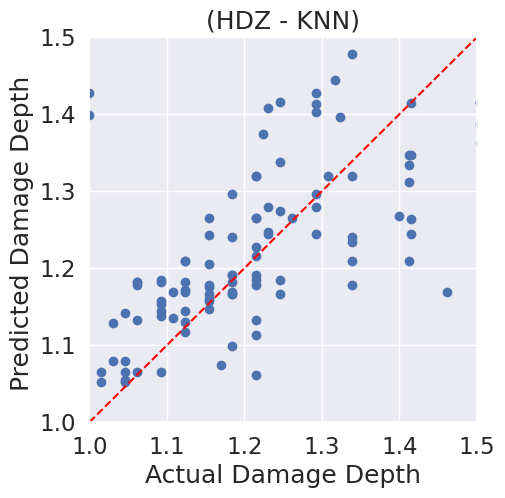

In [51]:
#Error Analysis Actual VS Prediction

plt.figure(figsize=(5, 5))
plt.scatter(y_test_HDZ, predicted_y_test_HDZ_KNN)
plt.plot([1, 3], [1, 3], color='red', linestyle='--')
plt.xlabel("Actual Damage Depth")
plt.ylabel("Predicted Damage Depth ")
plt.title("(HDZ - KNN)")
plt.xlim(1, 1.5)
plt.ylim(1, 1.5)
plt.grid(True)
plt.show()

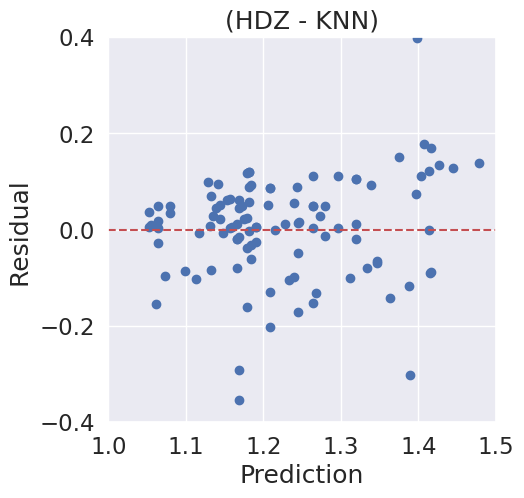

In [52]:
#Error Analysis Residual
residual_HDZ_KNN=predicted_y_test_HDZ_KNN - y_test_HDZ
plt.figure(figsize=(5, 5))
plt.scatter(predicted_y_test_HDZ_KNN, residual_HDZ_KNN)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Prediction")
plt.ylabel("Residual ")
plt.title("(HDZ - KNN)")
plt.ylim(-0.4, 0.4)
plt.yticks(np.arange(-0.4, 0.41, step=0.2))
plt.xticks(np.arange(1, 1.51, step=0.1))
plt.xlim(1, 1.5)
plt.grid(True)
plt.show()

### **EDZi**

In [53]:
# # HyperParameter Tunning

# from sklearn.model_selection import GridSearchCV
# from sklearn.neighbors import KNeighborsRegressor
# KNN_Reg_EDZi=KNeighborsRegressor()
# params_KNN_Reg_EDZi={'n_neighbors':[1, 2, 3, 4, 5],
#                      'weights':['uniform', 'distance'],
#                     'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
#                     'p':[1, 2]}
# gridSearchCV_KNN_Reg_EDZi=GridSearchCV(KNN_Reg_EDZi, params_KNN_Reg_EDZi,n_jobs=-1, scoring ='r2')
# gridSearchCV_KNN_Reg_EDZi.fit(x_train_EDZi_poly2, y_train_EDZi)
# print('The best parameters are: ',gridSearchCV_KNN_Reg_EDZi.best_params_)

"""
The best parameters are:  {'algorithm': 'brute', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
"""

"\nThe best parameters are:  {'algorithm': 'brute', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}\n"

In [54]:
# Model Training
KNN_Reg_EDZi= KNeighborsRegressor (n_neighbors=5, algorithm= 'brute', p= 1,
                                   weights= 'uniform')
KNN_Reg_EDZi= KNN_Reg_EDZi.fit(x_train_EDZi_poly2, y_train_EDZi)
predicted_y_test_EDZi_KNN=KNN_Reg_EDZi.predict(x_test_EDZi_poly2)

In [55]:
r2_value_KNN_EDZi=r2_score(y_test_EDZi, predicted_y_test_EDZi_KNN)
MAE_KNN_EDZi=mean_absolute_error(y_test_EDZi, predicted_y_test_EDZi_KNN)
MSE_KNN_EDZi=mean_squared_error(y_test_EDZi, predicted_y_test_EDZi_KNN)
RMSE_Ridge_EDZi=np.sqrt(MSE_Ridge_EDZi)
print('The best fit for HDZ has r_squared value  {:.2f} and mean absolute error \
, mean squared error, root mean squared error, {:.3f}, {:.3f}, and {:.3f}, respectively.'\
      .format(r2_value_KNN_EDZi, MAE_KNN_EDZi, MSE_KNN_EDZi, RMSE_Ridge_EDZi))

The best fit for HDZ has r_squared value  0.58 and mean absolute error , mean squared error, root mean squared error, 0.095, 0.020, and 0.131, respectively.


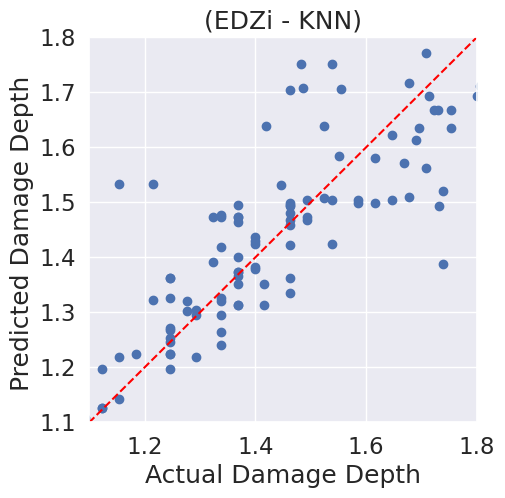

In [56]:
#Error Analysis Actual VS Prediction

plt.figure(figsize=(5, 5))
plt.scatter(y_test_EDZi, predicted_y_test_EDZi_KNN)
plt.plot([1, 3], [1, 3], color='red', linestyle='--')
plt.xlabel("Actual Damage Depth")
plt.ylabel("Predicted Damage Depth ")
plt.title("(EDZi - KNN)")
# plt.axes().set_aspect('equal')
plt.xlim(1.1, 1.8)
plt.ylim(1.1, 1.8)
plt.grid(True)
plt.show()

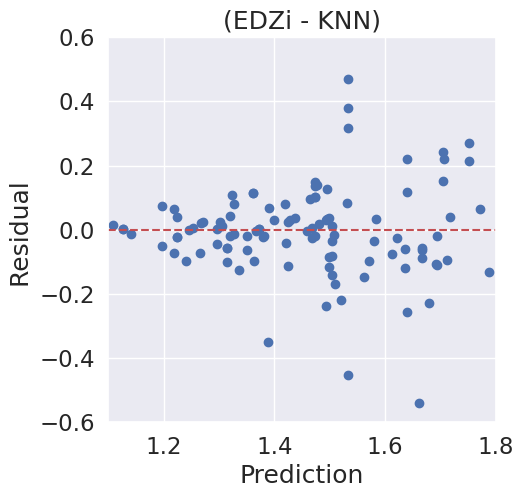

In [57]:
#Error Analysis Residual
residual_EDZi_KNN=predicted_y_test_EDZi_KNN - y_test_EDZi
plt.figure(figsize=(5, 5))
plt.scatter(predicted_y_test_EDZi_KNN, residual_EDZi_KNN)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Prediction")
plt.ylabel("Residual ")
plt.title("(EDZi - KNN)")
plt.ylim(-0.6, 0.6)
# plt.yticks(np.arange(-0.4, 0.41, step=0.2))
plt.xticks(np.arange(1, 1.81, step=0.2))
plt.xlim(1.1, 1.8)
plt.grid(True)
plt.show()

### **EDZo**

In [58]:
# # HyperParameter Tunning

# from sklearn.model_selection import GridSearchCV
# from sklearn.neighbors import KNeighborsRegressor
# KNN_Reg_EDZo=KNeighborsRegressor()
# params_KNN_Reg_EDZo={'n_neighbors':[1, 2, 3, 4, 5],
#                      'weights':['uniform', 'distance'],
#                     'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
#                     'p':[1, 2]}
# gridSearchCV_KNN_Reg_EDZo=GridSearchCV(KNN_Reg_EDZo, params_KNN_Reg_EDZo,n_jobs=-1, scoring ='r2')
# gridSearchCV_KNN_Reg_EDZo.fit(x_train_EDZo_poly2, y_train_EDZo)
# print('The best parameters are: ',gridSearchCV_KNN_Reg_EDZo.best_params_)


"""
The best parameters are:  {'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
"""

"\nThe best parameters are:  {'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}\n"

In [59]:
# Model Training
KNN_Reg_EDZo= KNeighborsRegressor (n_neighbors = 5, algorithm= 'auto', p= 1,
                                   weights= 'uniform')
KNN_Reg_EDZo= KNN_Reg_EDZo.fit(x_train_EDZo_poly2, y_train_EDZo)
predicted_y_test_EDZo_KNN=KNN_Reg_EDZo.predict(x_test_EDZo_poly2)

In [60]:
r2_value_KNN_EDZo=r2_score(y_test_EDZo, predicted_y_test_EDZo_KNN)
MAE_KNN_EDZo=mean_absolute_error(y_test_EDZo, predicted_y_test_EDZo_KNN)
MSE_KNN_EDZo=mean_squared_error(y_test_EDZo, predicted_y_test_EDZo_KNN)
RMSE_KNN_EDZo=np.sqrt(MSE_KNN_EDZo)
print('The best fit for HDZ has r_squared value  {:.2f} and mean absolute error \
, mean squared error, and root mean squared error {:.3f}, {:.3f}, and {:.3f} respectively.'\
      .format(r2_value_KNN_EDZo, MAE_KNN_EDZo, MSE_KNN_EDZo, RMSE_KNN_EDZo))

The best fit for HDZ has r_squared value  0.73 and mean absolute error , mean squared error, and root mean squared error 0.157, 0.080, and 0.282 respectively.


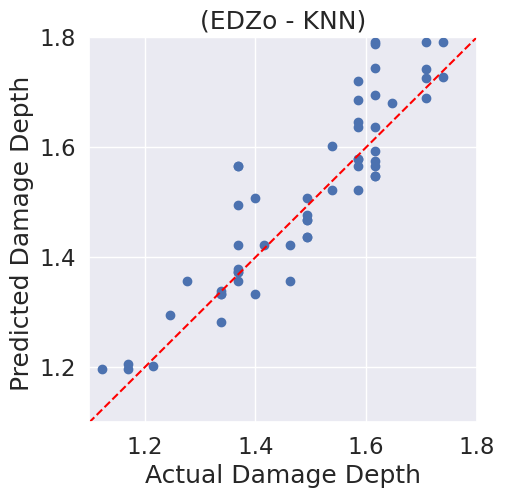

In [61]:
#Error Analysis Actual VS Prediction

plt.figure(figsize=(5, 5))
plt.scatter(y_test_EDZo, predicted_y_test_EDZo_KNN)
plt.plot([1, 3], [1, 3], color='red', linestyle='--')
plt.xlabel("Actual Damage Depth")
plt.ylabel("Predicted Damage Depth ")
plt.title("(EDZo - KNN)")
# plt.axes().set_aspect('equal')
plt.xlim(1.1, 1.8)
plt.yticks(np.arange(1, 1.81, step=0.2))
plt.ylim(1.1, 1.8)
plt.grid(True)
plt.show()

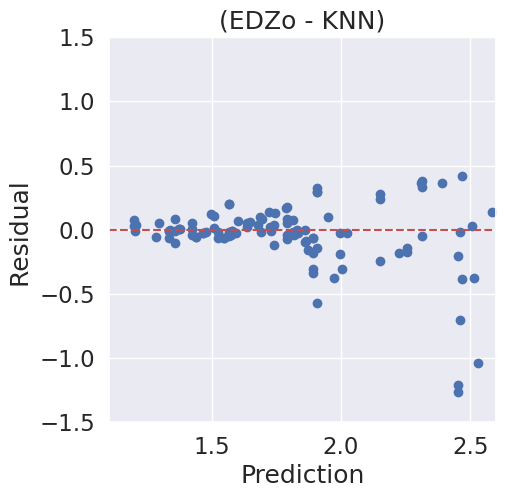

In [62]:
#Error Analysis Residual
residual_EDZo_KNN=predicted_y_test_EDZo_KNN - y_test_EDZo
plt.figure(figsize=(5, 5))
plt.scatter(predicted_y_test_EDZo_KNN, residual_EDZo_KNN)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Prediction")
plt.ylabel("Residual ")
plt.title("(EDZo - KNN)")
plt.yticks(np.arange(-1.5, 1.51, step=0.5))
plt.xticks(np.arange(1, 2.51, step=0.5))
plt.xlim(1.1, 2.6)
plt.ylim(-1.5, 1.5)
plt.grid(True)
plt.show()

## **1.4 SVM Regressor**

### **HDZ**

In [63]:
# # HyperParameter Tunning
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVR
# SVR_Reg_HDZ=SVR()
# params_SVR_Reg_HDZ={'C':[0.01, 0.1, 1, 10],
#                     'kernel':['linear', 'poly', 'rbf'],
#                     'degree':[2,3]}
# gridSearchCV_SVR_Reg_HDZ=GridSearchCV(SVR_Reg_HDZ, params_SVR_Reg_HDZ,n_jobs=-1,
#                                       scoring ='r2')
# gridSearchCV_SVR_Reg_HDZ.fit(x_train_HDZ_poly2, y_train_HDZ)
# print('The best parameters are: ',gridSearchCV_SVR_Reg_HDZ.best_params_)
"""
The best parameters are:  {'C': 10, 'degree': 2, 'kernel': 'linear'}
"""

"\nThe best parameters are:  {'C': 10, 'degree': 2, 'kernel': 'linear'}\n"

In [64]:
# Model Training
SVR_Reg_HDZ= SVR(C=10, kernel ='linear', degree =2 )
SVR_Reg_HDZ= SVR_Reg_HDZ.fit(x_train_HDZ_poly2, y_train_HDZ)
predicted_y_test_HDZ_SVR=SVR_Reg_HDZ.predict(x_test_HDZ_poly2)

In [65]:
r2_value_SVR_HDZ=r2_score(y_test_HDZ, predicted_y_test_HDZ_SVR)
MAE_SVR_HDZ=mean_absolute_error(y_test_HDZ, predicted_y_test_HDZ_SVR)
MSE_SVR_HDZ=mean_squared_error(y_test_HDZ, predicted_y_test_HDZ_SVR)
RMSE_SVR_HDZ=np.sqrt(MSE_SVR_HDZ)
print('The best fit for HDZ has r_squared value  {:.2f} and mean absolute error \
mean squared error, root mean squared error {:.3f}, {:.3f}, and {:.3f}, respectively.'\
      .format(r2_value_SVR_HDZ, MAE_SVR_HDZ, MSE_SVR_HDZ, RMSE_SVR_HDZ))

The best fit for HDZ has r_squared value  0.46 and mean absolute error mean squared error, root mean squared error 0.077, 0.010, and 0.101, respectively.


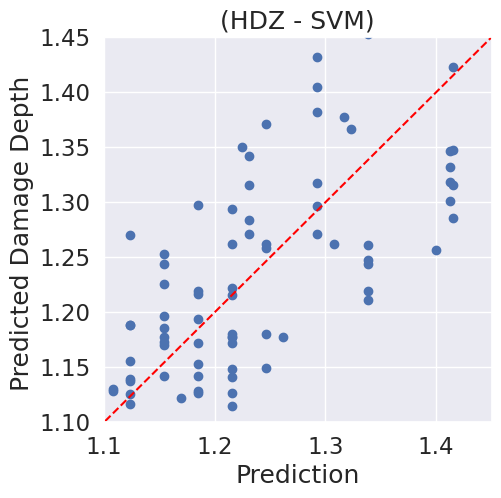

In [66]:
#Error Analysis Actual VS Prediction

plt.figure(figsize=(5, 5))
plt.scatter(y_test_HDZ, predicted_y_test_HDZ_SVR)
plt.plot([1, 3], [1, 3], color='red', linestyle='--')
plt.xlabel("Prediction")
plt.ylabel("Predicted Damage Depth ")
plt.title("(HDZ - SVM)")
plt.xlim(1.1, 1.45)
plt.ylim(1.1, 1.45)
plt.grid(True)
plt.show()

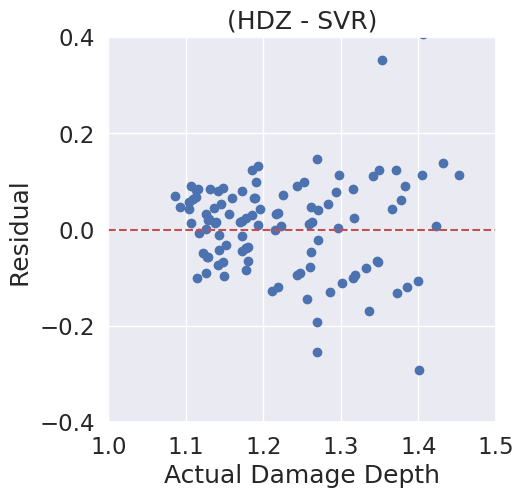

In [67]:
#Error Analysis Residual

residual_HDZ_SVR=predicted_y_test_HDZ_SVR.reshape(-1,1) - y_test_HDZ # reshaping the predicted one as its original shape is (106,) and not (106,1)
plt.figure(figsize=(5, 5))
plt.scatter(predicted_y_test_HDZ_SVR, residual_HDZ_SVR)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual Damage Depth")
plt.ylabel("Residual ")
plt.title("(HDZ - SVR)")
# plt.xlim(1, 1.5)
plt.ylim(-0.4, 0.4)
plt.yticks(np.arange(-0.4, 0.41, step=0.2))
plt.xticks(np.arange(1, 1.51, step=0.1))
plt.grid(True)
plt.show()

### **EDZi**

In [68]:
# # HyperParameter Tunning
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVR
# SVR_Reg_EDZi=SVR()
# params_SVR_Reg_EDZi={'C':[0.01, 0.1, 1, 10],
#                     'kernel':['linear', 'poly', 'rbf'],
#                     'degree':[2,3]}
# gridSearchCV_SVR_Reg_EDZi=GridSearchCV(SVR_Reg_EDZi, params_SVR_Reg_EDZi,n_jobs=-1,
#                                        scoring ='r2')
# gridSearchCV_SVR_Reg_EDZi.fit(x_train_EDZi_poly2, y_train_EDZi)
# print('The best parameters are: ',gridSearchCV_SVR_Reg_EDZi.best_params_)

"""
The best parameters are:  {'C': 0.1, 'degree': 2, 'kernel': 'linear'}
"""

"\nThe best parameters are:  {'C': 0.1, 'degree': 2, 'kernel': 'linear'}\n"

In [69]:
# Model Training
SVR_Reg_EDZi= SVR(C=0.1, kernel ='linear', degree =2 )
SVR_Reg_EDZi= SVR_Reg_EDZi.fit(x_train_EDZi_poly2, y_train_EDZi)
predicted_y_test_EDZi_SVR=SVR_Reg_EDZi.predict(x_test_EDZi_poly2)

In [70]:
r2_value_SVR_EDZi = r2_score(y_test_EDZi, predicted_y_test_EDZi_SVR)
MAE_SVR_EDZi = mean_absolute_error(y_test_EDZi, predicted_y_test_EDZi_SVR)
MSE_SVR_EDZi = mean_squared_error(y_test_EDZi, predicted_y_test_EDZi_SVR)
RMSE_SVR_EDZi = np.sqrt(MSE_SVR_EDZi)
print('The best fit for EDZi has r_squared value  {:.2f} and mean absolute error\
 and mean squared error, and root mean squared error {:.3f}, {:.3f}, and {:.3f} respectively.'\
      .format(r2_value_SVR_EDZi, MAE_SVR_EDZi, MSE_SVR_EDZi, RMSE_SVR_EDZi))

The best fit for EDZi has r_squared value  0.63 and mean absolute error and mean squared error, and root mean squared error 0.087, 0.017, and 0.131 respectively.


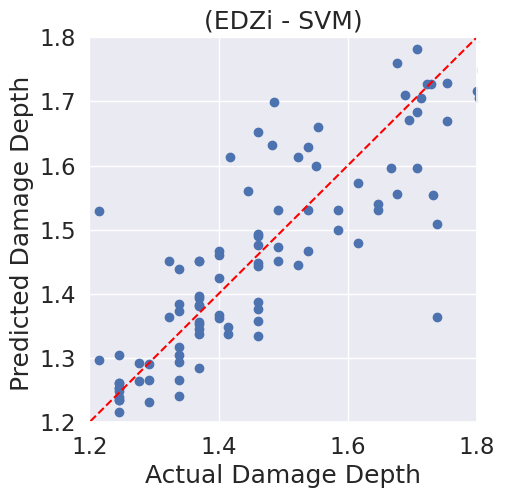

In [71]:
#Error Analysis Actual VS Prediction

plt.figure(figsize=(5, 5))
plt.scatter(y_test_EDZi, predicted_y_test_EDZi_SVR)
plt.plot([1, 3], [1, 3], color='red', linestyle='--')
plt.xlabel("Actual Damage Depth")
plt.ylabel("Predicted Damage Depth ")
plt.title("(EDZi - SVM)")
plt.xlim(1.2, 1.8)
plt.ylim(1.2, 1.8)
plt.grid(True)
plt.show()

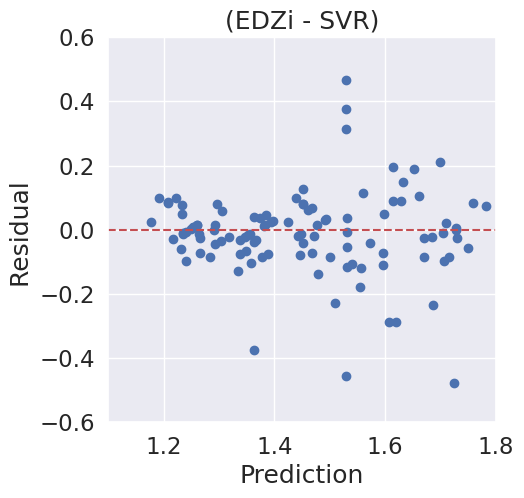

In [72]:
#Error Analysis Residual
residual_EDZi_SVR=predicted_y_test_EDZi_SVR.reshape(-1,1) - y_test_EDZi
plt.figure(figsize=(5, 5))
plt.scatter(predicted_y_test_EDZi_SVR, residual_EDZi_SVR)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Prediction")
plt.ylabel("Residual ")
plt.title("(EDZi - SVR)")
plt.ylim(-0.6, 0.6)
# plt.yticks(np.arange(-0.4, 0.41, step=0.2))
plt.xticks(np.arange(1, 1.81, step=0.2))
plt.xlim(1.1, 1.8)
plt.grid(True)
plt.show()

### **EDZo**

In [73]:
# # HyperParameter Tunning
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVR
# SVR_Reg_EDZo=SVR()
# params_SVR_Reg_EDZo={'C':[0.01, 0.1, 1, 10],
#                     'kernel':['linear', 'poly', 'rbf'],
#                     'degree':[2,3]}
# gridSearchCV_SVR_Reg_EDZo=GridSearchCV(SVR_Reg_EDZo, params_SVR_Reg_EDZo, n_jobs=-1,
#                                        scoring ='r2')
# gridSearchCV_SVR_Reg_EDZo.fit(x_train_EDZo_poly2, y_train_EDZo)
# print('The best parameters are: ', gridSearchCV_SVR_Reg_EDZo.best_params_)


"""
The best parameters are:  {'C': 1, 'degree': 2, 'kernel': 'linear'}
"""

"\nThe best parameters are:  {'C': 1, 'degree': 2, 'kernel': 'linear'}\n"

In [74]:
# Model Training
SVR_Reg_EDZo= SVR(C=1, kernel ='linear', degree =2 )
SVR_Reg_EDZo= SVR_Reg_EDZo.fit(x_train_EDZo_poly2, y_train_EDZo)
predicted_y_test_EDZo_SVR=SVR_Reg_EDZo.predict(x_test_EDZo_poly2)

In [75]:
r2_value_SVR_EDZo=r2_score(y_test_EDZo, predicted_y_test_EDZo_SVR)
MAE_SVR_EDZo=mean_absolute_error(y_test_EDZo, predicted_y_test_EDZo_SVR)
MSE_SVR_EDZo=mean_squared_error(y_test_EDZo, predicted_y_test_EDZo_SVR)
RMSE_SVR_EDZo=np.sqrt(MSE_SVR_EDZo)
print('The best fit for EDZo has r_squared value  {:.2f} and mean absolute error\
 mean squared error, and root mean squared error {:.3f}, {:.3f}, and, {:.3f} respectively.'\
      .format(r2_value_SVR_EDZo, MAE_SVR_EDZo, MSE_SVR_EDZo, RMSE_SVR_EDZo))

The best fit for EDZo has r_squared value  0.74 and mean absolute error mean squared error, and root mean squared error 0.143, 0.076, and, 0.276 respectively.


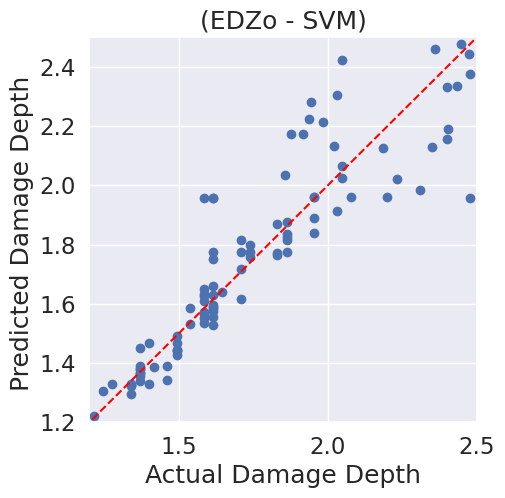

In [76]:
#Error Analysis Actual VS Prediction

plt.figure(figsize=(5, 5))
plt.scatter(y_test_EDZo, predicted_y_test_EDZo_SVR)
plt.plot([1, 3], [1, 3], color='red', linestyle='--')
plt.xlabel("Actual Damage Depth")
plt.ylabel("Predicted Damage Depth ")
plt.title("(EDZo - SVM)")
plt.xlim(1.2, 2.5)
plt.ylim(1.2, 2.5)
plt.grid(True)
plt.show()

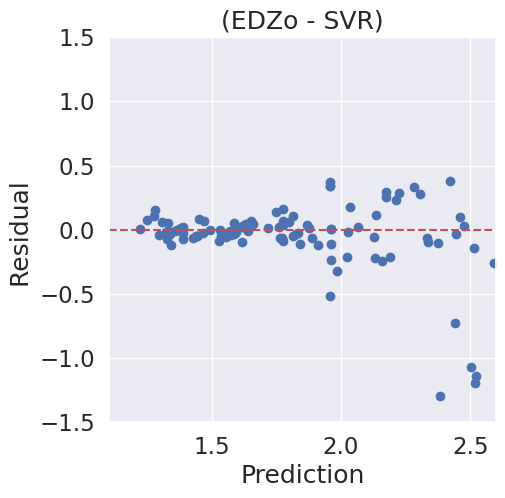

In [77]:
#Error Analysis Residual
residual_EDZo_SVR=predicted_y_test_EDZo_SVR.reshape(-1,1) - y_test_EDZo
plt.figure(figsize=(5, 5))
plt.scatter(predicted_y_test_EDZo_SVR, residual_EDZo_SVR)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Prediction")
plt.ylabel("Residual ")
plt.title("(EDZo - SVR)")
plt.yticks(np.arange(-1.5, 1.51, step=0.5))
plt.xticks(np.arange(1, 2.51, step=0.5))
plt.xlim(1.1, 2.6)
plt.ylim(-1.5, 1.5)
plt.grid(True)
plt.show()

## **1.5 MLP Regressor**

### **HDZ**

In [78]:
## HyperParameter Tunning

# from sklearn.neural_network import MLPRegressor
# layers=list()
# for i in range(1,6):
#   for j in range (1,6):
#     k=(i,j)
#     layers.append(k)
# MLP_regression=MLPRegressor(random_state=7)
# params_grid = {'hidden_layer_sizes': layers,
#                'activation' : ['logistic', 'relu'],
#                'alpha':[1e-4, 1e-3, 1e-2, 0.1],
#                'solver': ['lbfgs', 'sgd', 'adam'],
#                'learning_rate' : ['constant', 'adaptive']}
# gridsearch_MLPReg=GridSearchCV(MLP_regression, params_grid, n_jobs=-1, cv=5, scoring ='r2')
# MLP_model=gridsearch_MLPReg.fit(x_train_HDZ_poly2, y_train_HDZ)


In [79]:
# MLP_model.best_params_

'''
{'activation': 'logistic',
 'alpha': 0.01,
 'hidden_layer_sizes': (4, 4),
 'learning_rate': 'constant',
 'solver': 'lbfgs'}
'''

"\n{'activation': 'logistic',\n 'alpha': 0.01,\n 'hidden_layer_sizes': (4, 4),\n 'learning_rate': 'constant',\n 'solver': 'lbfgs'}\n"

In [80]:
# The Model Training
MLP_Reg_HDZ= MLPRegressor(activation='logistic',alpha= 0.01, hidden_layer_sizes= (4, 4),
                          learning_rate= 'constant',solver= 'lbfgs')
MLP_Reg_HDZ= MLP_Reg_HDZ.fit(x_train_HDZ_poly2, y_train_HDZ)
predicted_y_test_HDZ_MLP=MLP_Reg_HDZ.predict(x_test_HDZ_poly2)

In [81]:
r2_value_MLP_HDZ=r2_score(y_test_HDZ, predicted_y_test_HDZ_MLP)
MAE_MLP_HDZ=mean_absolute_error(y_test_HDZ, predicted_y_test_HDZ_MLP)
MSE_MLP_HDZ=mean_squared_error(y_test_HDZ, predicted_y_test_HDZ_MLP)
RMSE_MLP_HDZ=np.sqrt(MSE_MLP_HDZ)
print('The best fit for HDZ has r_squared value  {:.2f} and mean absolute error, \
mean squared error and root mean squared error, {:.3f}, {:.3f}, and {:.3f}, respectively.'\
      .format(r2_value_MLP_HDZ, MAE_MLP_HDZ, MSE_MLP_HDZ, RMSE_MLP_HDZ))

The best fit for HDZ has r_squared value  0.46 and mean absolute error, mean squared error and root mean squared error, 0.074, 0.010, and 0.100, respectively.


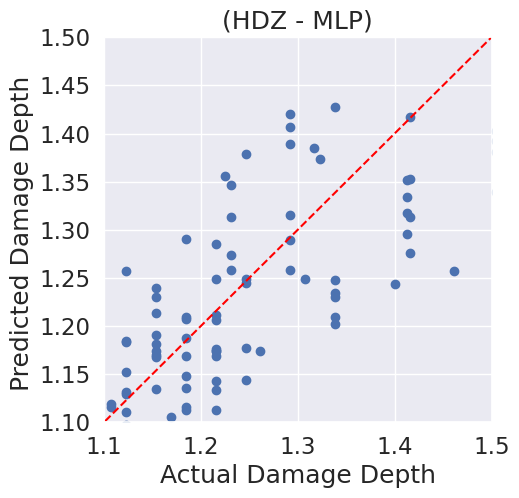

In [82]:
#Error Analysis Actual VS Prediction

plt.figure(figsize=(5, 5))
plt.scatter(y_test_HDZ, predicted_y_test_HDZ_MLP)
plt.plot([1, 3], [1, 3], color='red', linestyle='--')
plt.xlabel("Actual Damage Depth")
plt.ylabel("Predicted Damage Depth ")
plt.title("(HDZ - MLP)")
plt.xlim(1.1, 1.5)
plt.ylim(1.1, 1.5)
plt.grid(True)
plt.show()

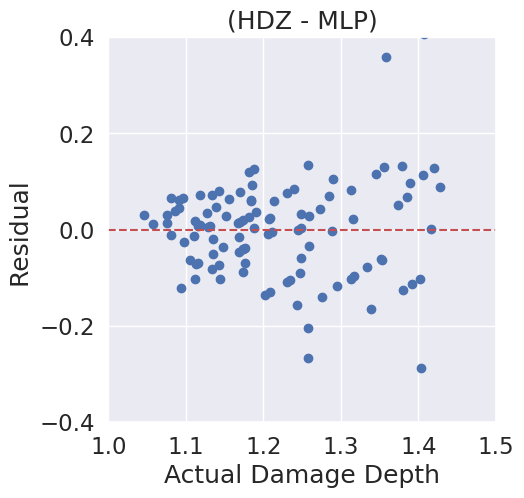

In [83]:
#Error Analysis Residual
residual_HDZ_MLP=predicted_y_test_HDZ_MLP.reshape(-1,1) - y_test_HDZ
plt.figure(figsize=(5, 5))
plt.scatter(predicted_y_test_HDZ_MLP, residual_HDZ_MLP)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual Damage Depth")
plt.ylabel("Residual ")
plt.title("(HDZ - MLP)")
# plt.xlim(1, 1.5)
plt.ylim(-0.4, 0.4)
plt.yticks(np.arange(-0.4, 0.41, step=0.2))
plt.xticks(np.arange(1, 1.51, step=0.1))
plt.grid(True)
plt.show()

### **EDZi**

In [84]:
# # HyperParameter Tunning

# from sklearn.neural_network import MLPRegressor
# layers=list()
# for i in range(1,6):
#   for j in range (1,6):
#     k=(i,j)
#     layers.append(k)
# MLP_regression=MLPRegressor(random_state=7)
# params_grid = {'hidden_layer_sizes': layers,
#                'activation' : ['logistic', 'relu'],
#                'alpha':[1e-4, 1e-3, 1e-2, 0.1],
#                'solver': ['lbfgs', 'sgd', 'adam'],
#                'learning_rate' : ['constant', 'adaptive']}
# gridsearch_MLPReg=GridSearchCV(MLP_regression, params_grid, n_jobs=-1, cv=5, scoring ='r2')
# MLP_model=gridsearch_MLPReg.fit(x_train_EDZi_poly2, y_train_EDZi)


In [85]:
#MLP_model.best_params_
'''
{'activation': 'logistic',
 'alpha': 0.001,
 'hidden_layer_sizes': (2, 1),
 'learning_rate': 'constant',
 'solver': 'lbfgs'}
 '''

"\n{'activation': 'logistic',\n 'alpha': 0.001,\n 'hidden_layer_sizes': (2, 1),\n 'learning_rate': 'constant',\n 'solver': 'lbfgs'}\n "

In [86]:
# The Model Training
MLP_Reg_EDZi= MLPRegressor(activation='logistic',alpha= 0.001, hidden_layer_sizes= (2, 1), learning_rate= 'constant',solver= 'lbfgs')
MLP_Reg_EDZi= MLP_Reg_EDZi.fit(x_train_EDZi_poly2, y_train_EDZi)
predicted_y_test_EDZi_MLP=MLP_Reg_EDZi.predict(x_test_EDZi_poly2)

In [87]:
r2_value_MLP_EDZi=r2_score(y_test_EDZi, predicted_y_test_EDZi_MLP)
MAE_MLP_EDZi=mean_absolute_error(y_test_EDZi, predicted_y_test_EDZi_MLP)
MSE_MLP_EDZi=mean_squared_error(y_test_EDZi, predicted_y_test_EDZi_MLP)
RMSE_MLP_EDZi=np.sqrt(MSE_MLP_EDZi)
print('The best fit for EDZi has r_squared value  {:.2f}, mean absolute error, \
mean squared error, root mean squared error, {:.3f}, {:.3f} and {:.3f}, respectively.'\
      .format(r2_value_MLP_EDZi, MAE_MLP_EDZi, MSE_MLP_EDZi, RMSE_MLP_EDZi))

The best fit for EDZi has r_squared value  0.64, mean absolute error, mean squared error, root mean squared error, 0.084, 0.017 and 0.130, respectively.


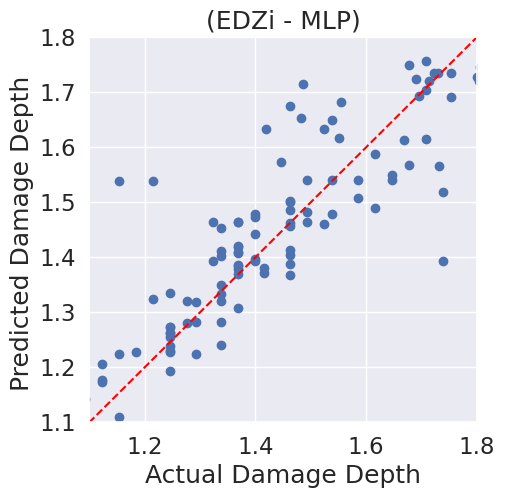

In [88]:
#Error Analysis Actual VS Prediction

plt.figure(figsize=(5, 5))
plt.scatter(y_test_EDZi, predicted_y_test_EDZi_MLP)
plt.plot([1, 3], [1, 3], color='red', linestyle='--')
plt.xlabel("Actual Damage Depth")
plt.ylabel("Predicted Damage Depth ")
plt.title("(EDZi - MLP)")
plt.xlim(1.1, 1.8)
plt.ylim(1.1, 1.8)
plt.grid(True)
plt.show()

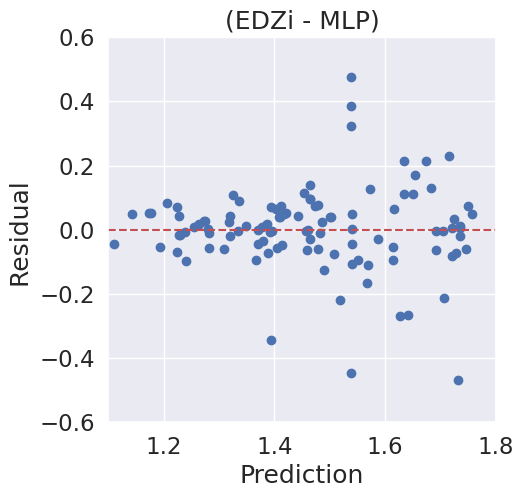

In [89]:
#Error Analysis Residual
residual_EDZi_MLP=predicted_y_test_EDZi_MLP.reshape(-1,1) - y_test_EDZi
plt.figure(figsize=(5, 5))
plt.scatter(predicted_y_test_EDZi_MLP, residual_EDZi_MLP)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Prediction")
plt.ylabel("Residual ")
plt.title("(EDZi - MLP)")
plt.ylim(-0.6, 0.6)
# plt.yticks(np.arange(-0.4, 0.41, step=0.2))
plt.xticks(np.arange(1, 1.81, step=0.2))
plt.xlim(1.1, 1.8)
plt.grid(True)
plt.show()

### **EDZo**

In [90]:
## HyperParameter Tunning

# from sklearn.neural_network import MLPRegressor
# layers=list()
# for i in range(1,6):
#   for j in range (1,6):
#     k=(i,j)
#     layers.append(k)
# MLP_regression=MLPRegressor(random_state=7)
# params_grid = {'hidden_layer_sizes': layers,
#                'activation' : ['logistic', 'relu'],
#                'alpha':[1e-4, 1e-3, 1e-2, 0.1],
#                'solver': ['lbfgs', 'sgd', 'adam'],
#                'learning_rate' : ['constant', 'adaptive']}
# gridsearch_MLPReg=GridSearchCV(MLP_regression, params_grid, n_jobs=-1, cv=5, scoring ='r2')
# MLP_model=gridsearch_MLPReg.fit(x_train_EDZo_poly2, y_train_EDZo)


In [91]:
#MLP_model.best_params_
'''
{'activation': 'relu',
 'alpha': 0.1,
 'hidden_layer_sizes': (4, 5),
 'learning_rate': 'constant',
 'solver': 'lbfgs'}
 '''

"\n{'activation': 'relu',\n 'alpha': 0.1,\n 'hidden_layer_sizes': (4, 5),\n 'learning_rate': 'constant',\n 'solver': 'lbfgs'}\n "

In [92]:
# The Model Training
from sklearn.neural_network import MLPRegressor
MLP_Reg_EDZo= MLPRegressor(activation='relu',alpha= 0.1, hidden_layer_sizes= (4, 5),
                           learning_rate= 'constant',solver= 'lbfgs')
MLP_Reg_EDZo= MLP_Reg_EDZo.fit(x_train_EDZo_poly2, y_train_EDZo)
predicted_y_test_EDZo_MLP=MLP_Reg_EDZo.predict(x_test_EDZo_poly2)

In [93]:
r2_value_MLP_EDZo=r2_score(y_test_EDZo, predicted_y_test_EDZo_MLP)
MAE_MLP_EDZo=mean_absolute_error(y_test_EDZo, predicted_y_test_EDZo_MLP)
MSE_MLP_EDZo=mean_squared_error(y_test_EDZo, predicted_y_test_EDZo_MLP)
RMSE_MLP_EDZo = np.sqrt(MSE_MLP_EDZo)
print('The best fit for EDZo has r_squared value  {:.2f} and mean absolute error, \
mean squared error, root mean squared error, {:.3f}, {:.3f} and {:.3f}, respectively.'\
      .format(r2_value_MLP_EDZo, MAE_MLP_EDZo, MSE_MLP_EDZo, RMSE_MLP_EDZo))

The best fit for EDZo has r_squared value  0.75 and mean absolute error, mean squared error, root mean squared error, 0.142, 0.073 and 0.269, respectively.


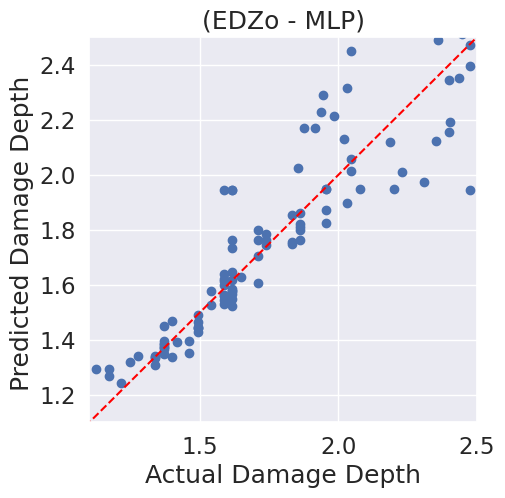

In [94]:
#Error Analysis Actual VS Prediction

plt.figure(figsize=(5, 5))
plt.scatter(y_test_EDZo, predicted_y_test_EDZo_MLP)
plt.plot([1, 3], [1, 3], color='red', linestyle='--')
plt.xlabel("Actual Damage Depth")
plt.ylabel("Predicted Damage Depth ")
plt.title("(EDZo - MLP)")
plt.xlim(1.1, 2.5)
plt.ylim(1.1, 2.5)
plt.grid(True)
plt.show()

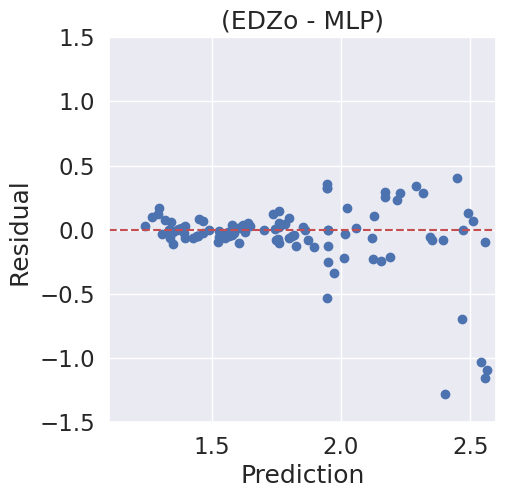

In [95]:
#Error Analysis Residual
residual_EDZo_MLP=predicted_y_test_EDZo_MLP.reshape(-1,1) - y_test_EDZo
plt.figure(figsize=(5, 5))
plt.scatter(predicted_y_test_EDZo_MLP, residual_EDZo_MLP)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Prediction")
plt.ylabel("Residual ")
plt.title("(EDZo - MLP)")
plt.yticks(np.arange(-1.5, 1.51, step=0.5))
plt.xticks(np.arange(1, 2.51, step=0.5))
plt.xlim(1.1, 2.6)
plt.ylim(-1.5, 1.5)
plt.grid(True)
plt.show()

## **1.6 Error Analysis for Different Regressions**

### **Actual VS Prediction**

#### **HDZ**

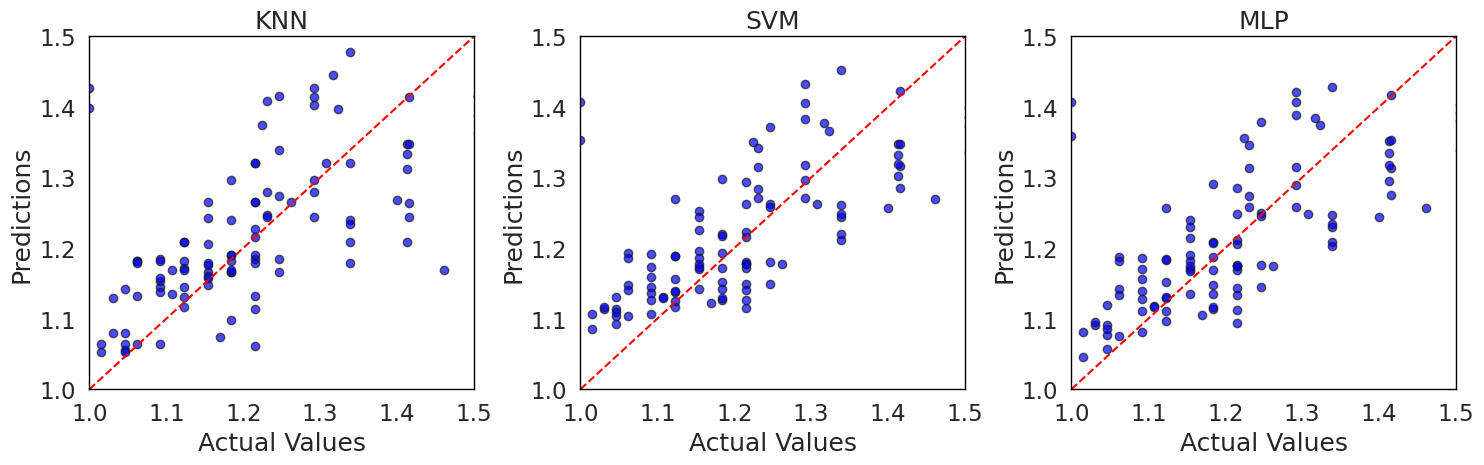

In [96]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# KNN Plot
axes[0].scatter(y_test_HDZ, predicted_y_test_HDZ_KNN, color='blue', edgecolors='k', alpha=0.7)
axes[0].plot([1, 3], [1, 3], color='red', linestyle='--')
axes[0].set_xlim([1, 1.5])
axes[0].set_ylim([1, 1.5])
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predictions')
axes[0].set_title('KNN')
axes[0].set_facecolor('w')
axes[0].spines['left'].set_linewidth(1)
axes[0].spines['bottom'].set_linewidth(1)
axes[0].spines['right'].set_linewidth(1)
axes[0].spines['top'].set_linewidth(1)
axes[0].spines['left'].set_color('black')
axes[0].spines['bottom'].set_color('black')
axes[0].spines['right'].set_color('black')
axes[0].spines['top'].set_color('black')

# SVM Plot
axes[1].scatter(y_test_HDZ, predicted_y_test_HDZ_SVR, color='blue', edgecolors='k', alpha=0.7)
axes[1].plot([1, 3], [1, 3], color='red', linestyle='--')
axes[1].set_xlim([1, 1.5])
axes[1].set_ylim([1, 1.5])
axes[1].set_xlabel('Actual Values')
axes[1].set_ylabel('Predictions')
axes[1].set_title('SVM')
axes[1].set_facecolor('w')
axes[1].spines['left'].set_linewidth(1)
axes[1].spines['bottom'].set_linewidth(1)
axes[1].spines['right'].set_linewidth(1)
axes[1].spines['top'].set_linewidth(1)
axes[1].spines['left'].set_color('black')
axes[1].spines['bottom'].set_color('black')
axes[1].spines['right'].set_color('black')
axes[1].spines['top'].set_color('black')

# MLP Plot
axes[2].scatter(y_test_HDZ, predicted_y_test_HDZ_MLP, color='blue', edgecolors='k', alpha=0.7)
axes[2].plot([1, 3], [1, 3], color='red', linestyle='--')
axes[2].set_xlim([1, 1.5])
axes[2].set_ylim([1, 1.5])
axes[2].set_xlabel('Actual Values')
axes[2].set_ylabel('Predictions')
axes[2].set_title('MLP')
axes[2].set_facecolor('w')
axes[2].spines['left'].set_linewidth(1)
axes[2].spines['bottom'].set_linewidth(1)
axes[2].spines['right'].set_linewidth(1)
axes[2].spines['top'].set_linewidth(1)
axes[2].spines['left'].set_color('black')
axes[2].spines['bottom'].set_color('black')
axes[2].spines['right'].set_color('black')
axes[2].spines['top'].set_color('black')

plt.tight_layout()
# plt.show()
# plt.savefig("Actual VS Prediction for HDZ.png", format="png", dpi=600, bbox_inches = 'tight')

#### **EDZi**

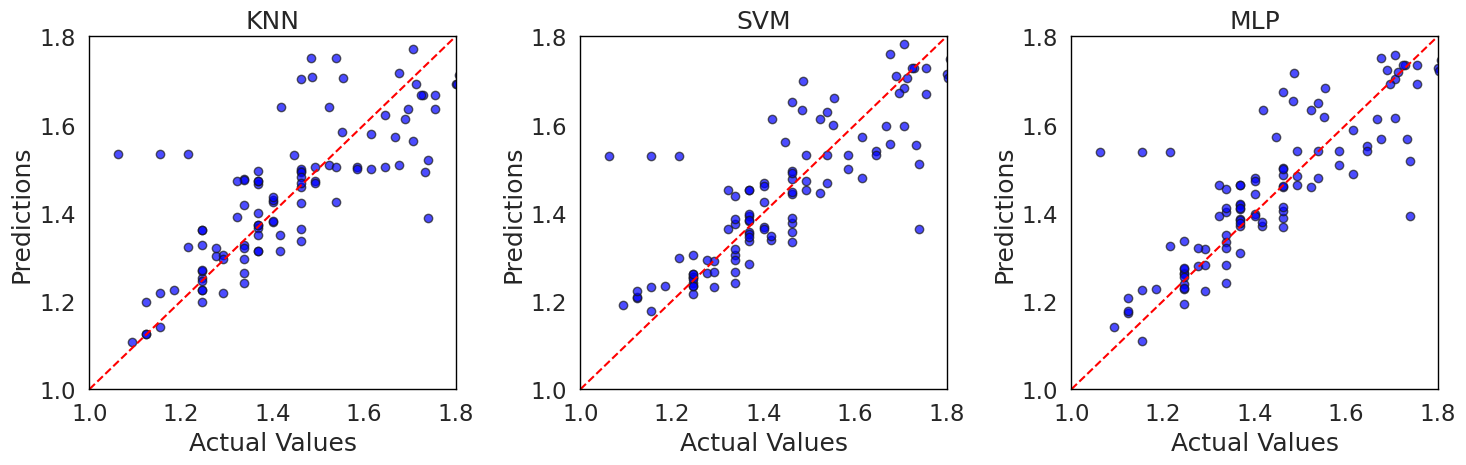

In [97]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# KNN Plot
axes[0].scatter(y_test_EDZi, predicted_y_test_EDZi_KNN, color='blue', edgecolors='k', alpha=0.7)
axes[0].plot([1, 3], [1, 3], color='red', linestyle='--')
axes[0].set_xlim([1, 1.8])
axes[0].set_ylim([1, 1.8])
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predictions')
axes[0].set_title('KNN')
axes[0].set_facecolor('w')
axes[0].spines['left'].set_linewidth(1)
axes[0].spines['bottom'].set_linewidth(1)
axes[0].spines['right'].set_linewidth(1)
axes[0].spines['top'].set_linewidth(1)
axes[0].spines['left'].set_color('black')
axes[0].spines['bottom'].set_color('black')
axes[0].spines['right'].set_color('black')
axes[0].spines['top'].set_color('black')

# SVM Plot
axes[1].scatter(y_test_EDZi, predicted_y_test_EDZi_SVR, color='blue', edgecolors='k', alpha=0.7)
axes[1].plot([1, 3], [1, 3], color='red', linestyle='--')
axes[1].set_xlim([1, 1.8])
axes[1].set_ylim([1, 1.8])
axes[1].set_xlabel('Actual Values')
axes[1].set_ylabel('Predictions')
axes[1].set_title('SVM')
axes[1].set_facecolor('w')
axes[1].spines['left'].set_linewidth(1)
axes[1].spines['bottom'].set_linewidth(1)
axes[1].spines['right'].set_linewidth(1)
axes[1].spines['top'].set_linewidth(1)
axes[1].spines['left'].set_color('black')
axes[1].spines['bottom'].set_color('black')
axes[1].spines['right'].set_color('black')
axes[1].spines['top'].set_color('black')

# MLP Plot
axes[2].scatter(y_test_EDZi, predicted_y_test_EDZi_MLP, color='blue', edgecolors='k', alpha=0.7)
axes[2].plot([1, 3], [1, 3], color='red', linestyle='--')
axes[2].set_xlim([1, 1.8])
axes[2].set_ylim([1, 1.8])
axes[2].set_xlabel('Actual Values')
axes[2].set_ylabel('Predictions')
axes[2].set_title('MLP')
axes[2].set_facecolor('w')
axes[2].spines['left'].set_linewidth(1)
axes[2].spines['bottom'].set_linewidth(1)
axes[2].spines['right'].set_linewidth(1)
axes[2].spines['top'].set_linewidth(1)
axes[2].spines['left'].set_color('black')
axes[2].spines['bottom'].set_color('black')
axes[2].spines['right'].set_color('black')
axes[2].spines['top'].set_color('black')

plt.tight_layout()
# plt.show()
# plt.savefig("Actual VS Prediction for EDZi.png", format="png", dpi=600, bbox_inches = 'tight')

#### **EDZo**

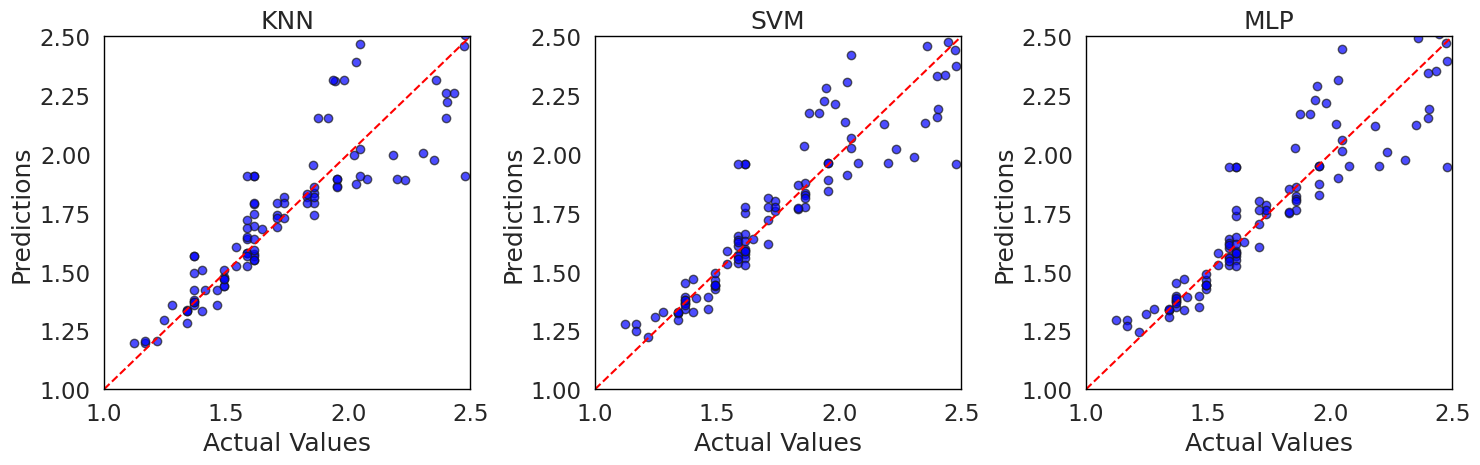

In [98]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# KNN Plot
axes[0].scatter(y_test_EDZo, predicted_y_test_EDZo_KNN, color='blue', edgecolors='k', alpha=0.7)
axes[0].plot([1, 3], [1, 3], color='red', linestyle='--')
axes[0].set_xlim([1, 2.5])
axes[0].set_ylim([1, 2.5])
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predictions')
axes[0].set_title('KNN')
axes[0].set_facecolor('w')
axes[0].spines['left'].set_linewidth(1)
axes[0].spines['bottom'].set_linewidth(1)
axes[0].spines['right'].set_linewidth(1)
axes[0].spines['top'].set_linewidth(1)
axes[0].spines['left'].set_color('black')
axes[0].spines['bottom'].set_color('black')
axes[0].spines['right'].set_color('black')
axes[0].spines['top'].set_color('black')

# SVM Plot
axes[1].scatter(y_test_EDZo, predicted_y_test_EDZo_SVR, color='blue', edgecolors='k', alpha=0.7)
axes[1].plot([1, 3], [1, 3], color='red', linestyle='--')
axes[1].set_xlim([1, 2.5])
axes[1].set_ylim([1, 2.5])
axes[1].set_xlabel('Actual Values')
axes[1].set_ylabel('Predictions')
axes[1].set_title('SVM')
axes[1].set_facecolor('w')
axes[1].spines['left'].set_linewidth(1)
axes[1].spines['bottom'].set_linewidth(1)
axes[1].spines['right'].set_linewidth(1)
axes[1].spines['top'].set_linewidth(1)
axes[1].spines['left'].set_color('black')
axes[1].spines['bottom'].set_color('black')
axes[1].spines['right'].set_color('black')
axes[1].spines['top'].set_color('black')

# MLP Plot
axes[2].scatter(y_test_EDZo, predicted_y_test_EDZo_MLP, color='blue', edgecolors='k', alpha=0.7)
axes[2].plot([1, 3], [1, 3], color='red', linestyle='--')
axes[2].set_xlim([1, 2.5])
axes[2].set_ylim([1, 2.5])
axes[2].set_xlabel('Actual Values')
axes[2].set_ylabel('Predictions')
axes[2].set_title('MLP')
axes[2].set_facecolor('w')
axes[2].spines['left'].set_linewidth(1)
axes[2].spines['bottom'].set_linewidth(1)
axes[2].spines['right'].set_linewidth(1)
axes[2].spines['top'].set_linewidth(1)
axes[2].spines['left'].set_color('black')
axes[2].spines['bottom'].set_color('black')
axes[2].spines['right'].set_color('black')
axes[2].spines['top'].set_color('black')

plt.tight_layout()
# plt.show()
# plt.savefig("Actual VS Prediction for EDZo.png", format="png", dpi=600, bbox_inches = 'tight')

#### **KNN**

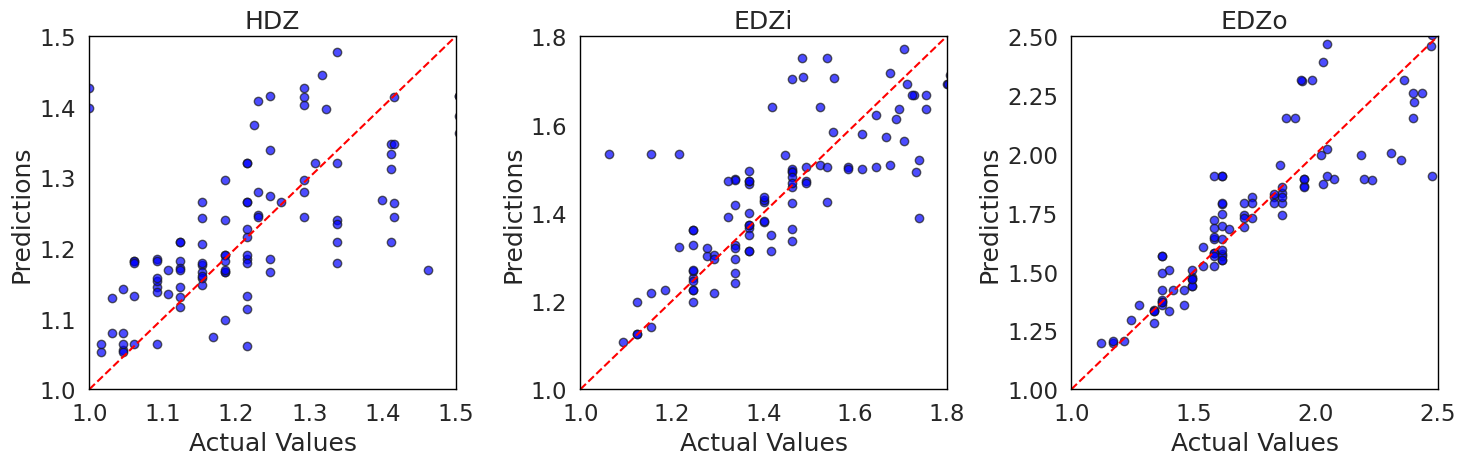

In [99]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# KNN Plot
axes[0].scatter(y_test_HDZ, predicted_y_test_HDZ_KNN, color='blue', edgecolors='k', alpha=0.7)
axes[0].plot([1, 3], [1, 3], color='red', linestyle='--')
axes[0].set_xlim([1, 1.5])
axes[0].set_ylim([1, 1.5])
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predictions')
axes[0].set_title('HDZ')
axes[0].set_facecolor('w')
axes[0].spines['left'].set_linewidth(1)
axes[0].spines['bottom'].set_linewidth(1)
axes[0].spines['right'].set_linewidth(1)
axes[0].spines['top'].set_linewidth(1)
axes[0].spines['left'].set_color('black')
axes[0].spines['bottom'].set_color('black')
axes[0].spines['right'].set_color('black')
axes[0].spines['top'].set_color('black')


axes[1].scatter(y_test_EDZi, predicted_y_test_EDZi_KNN, color='blue', edgecolors='k', alpha=0.7)
axes[1].plot([1, 3], [1, 3], color='red', linestyle='--')
axes[1].set_xlim([1, 1.8])
axes[1].set_ylim([1, 1.8])
axes[1].set_xlabel('Actual Values')
axes[1].set_ylabel('Predictions')
axes[1].set_title('EDZi')
axes[1].set_facecolor('w')
axes[1].spines['left'].set_linewidth(1)
axes[1].spines['bottom'].set_linewidth(1)
axes[1].spines['right'].set_linewidth(1)
axes[1].spines['top'].set_linewidth(1)
axes[1].spines['left'].set_color('black')
axes[1].spines['bottom'].set_color('black')
axes[1].spines['right'].set_color('black')
axes[1].spines['top'].set_color('black')


axes[2].scatter(y_test_EDZo, predicted_y_test_EDZo_KNN, color='blue', edgecolors='k', alpha=0.7)
axes[2].plot([1, 3], [1, 3], color='red', linestyle='--')
axes[2].set_xlim([1, 2.5])
axes[2].set_ylim([1, 2.5])
axes[2].set_xlabel('Actual Values')
axes[2].set_ylabel('Predictions')
axes[2].set_title('EDZo')
axes[2].set_facecolor('w')
axes[2].spines['left'].set_linewidth(1)
axes[2].spines['bottom'].set_linewidth(1)
axes[2].spines['right'].set_linewidth(1)
axes[2].spines['top'].set_linewidth(1)
axes[2].spines['left'].set_color('black')
axes[2].spines['bottom'].set_color('black')
axes[2].spines['right'].set_color('black')
axes[2].spines['top'].set_color('black')

plt.tight_layout()
# plt.show()
# plt.savefig("Actual VS Prediction for KNN.png", format="png", dpi=600, bbox_inches = 'tight')

#### **SVM**

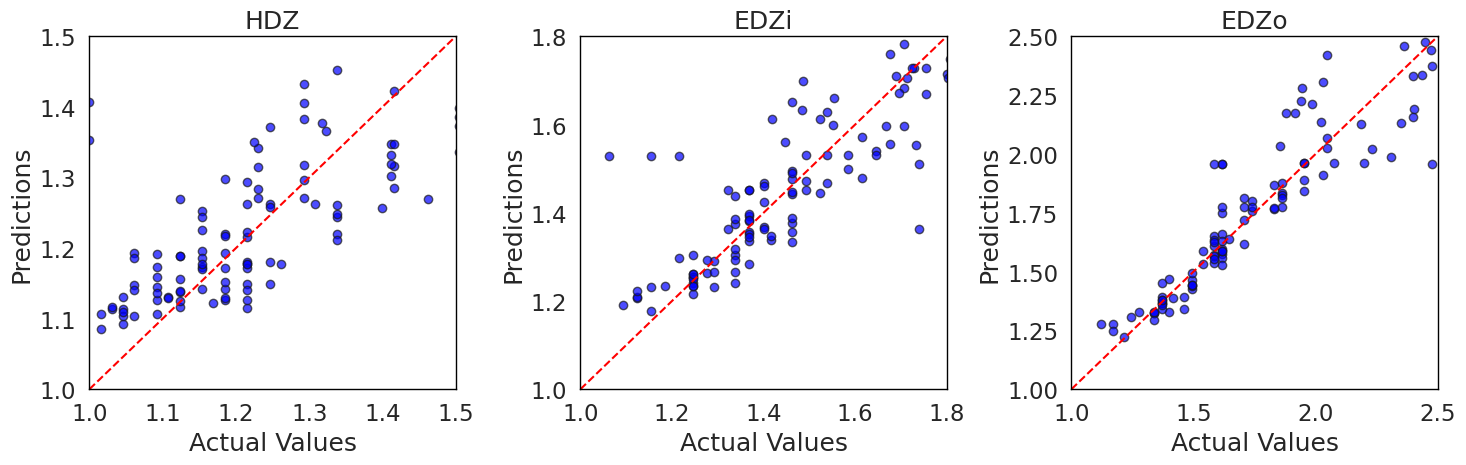

In [100]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# SVM Plot
axes[0].scatter(y_test_HDZ, predicted_y_test_HDZ_SVR, color='blue', edgecolors='k', alpha=0.7)
axes[0].plot([1, 3], [1, 3], color='red', linestyle='--')
axes[0].set_xlim([1, 1.5])
axes[0].set_ylim([1, 1.5])
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predictions')
axes[0].set_title('HDZ')
axes[0].set_facecolor('w')
axes[0].spines['left'].set_linewidth(1)
axes[0].spines['bottom'].set_linewidth(1)
axes[0].spines['right'].set_linewidth(1)
axes[0].spines['top'].set_linewidth(1)
axes[0].spines['left'].set_color('black')
axes[0].spines['bottom'].set_color('black')
axes[0].spines['right'].set_color('black')
axes[0].spines['top'].set_color('black')


# SVM Plot
axes[1].scatter(y_test_EDZi, predicted_y_test_EDZi_SVR, color='blue', edgecolors='k', alpha=0.7)
axes[1].plot([1, 3], [1, 3], color='red', linestyle='--')
axes[1].set_xlim([1, 1.8])
axes[1].set_ylim([1, 1.8])
axes[1].set_xlabel('Actual Values')
axes[1].set_ylabel('Predictions')
axes[1].set_title('EDZi')
axes[1].set_facecolor('w')
axes[1].spines['left'].set_linewidth(1)
axes[1].spines['bottom'].set_linewidth(1)
axes[1].spines['right'].set_linewidth(1)
axes[1].spines['top'].set_linewidth(1)
axes[1].spines['left'].set_color('black')
axes[1].spines['bottom'].set_color('black')
axes[1].spines['right'].set_color('black')
axes[1].spines['top'].set_color('black')


axes[2].scatter(y_test_EDZo, predicted_y_test_EDZo_SVR, color='blue', edgecolors='k', alpha=0.7)
axes[2].plot([1, 3], [1, 3], color='red', linestyle='--')
axes[2].set_xlim([1, 2.5])
axes[2].set_ylim([1, 2.5])
axes[2].set_xlabel('Actual Values')
axes[2].set_ylabel('Predictions')
axes[2].set_title('EDZo')
axes[2].set_facecolor('w')
axes[2].spines['left'].set_linewidth(1)
axes[2].spines['bottom'].set_linewidth(1)
axes[2].spines['right'].set_linewidth(1)
axes[2].spines['top'].set_linewidth(1)
axes[2].spines['left'].set_color('black')
axes[2].spines['bottom'].set_color('black')
axes[2].spines['right'].set_color('black')
axes[2].spines['top'].set_color('black')

plt.tight_layout()
# plt.show()

# plt.savefig("Actual VS Prediction for SVM.png", format="png", dpi=600, bbox_inches = 'tight')

#### **MLP**

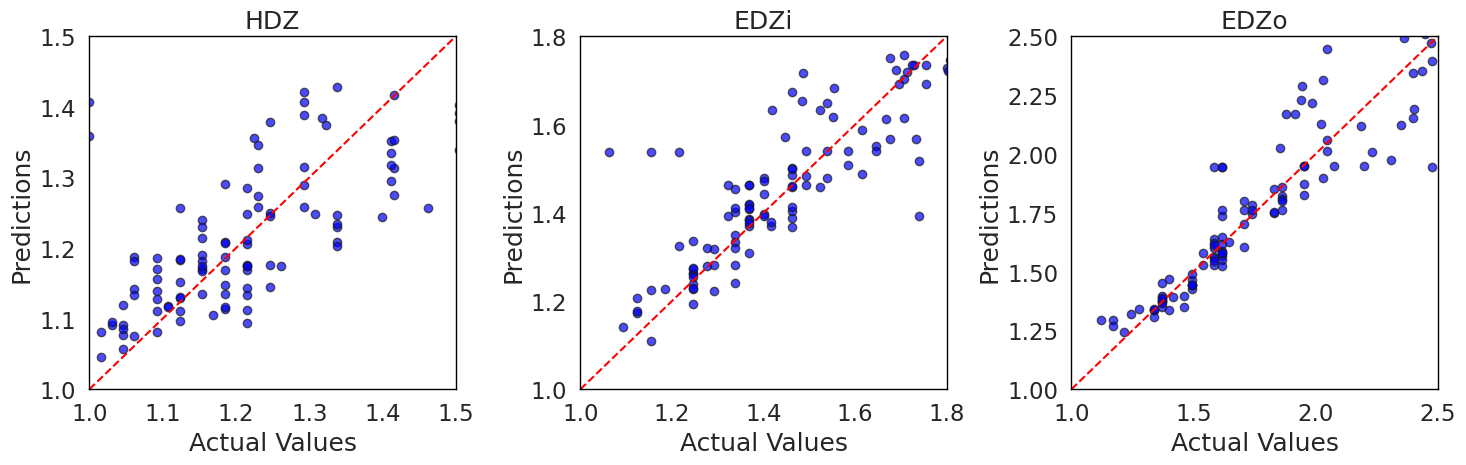

In [101]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))


axes[0].scatter(y_test_HDZ, predicted_y_test_HDZ_MLP, color='blue', edgecolors='k', alpha=0.7)
axes[0].plot([1, 3], [1, 3], color='red', linestyle='--')
axes[0].set_xlim([1, 1.5])
axes[0].set_ylim([1, 1.5])
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predictions')
axes[0].set_title('HDZ')
axes[0].set_facecolor('w')
axes[0].spines['left'].set_linewidth(1)
axes[0].spines['bottom'].set_linewidth(1)
axes[0].spines['right'].set_linewidth(1)
axes[0].spines['top'].set_linewidth(1)
axes[0].spines['left'].set_color('black')
axes[0].spines['bottom'].set_color('black')
axes[0].spines['right'].set_color('black')
axes[0].spines['top'].set_color('black')


axes[1].scatter(y_test_EDZi, predicted_y_test_EDZi_MLP, color='blue', edgecolors='k', alpha=0.7)
axes[1].plot([1, 3], [1, 3], color='red', linestyle='--')
axes[1].set_xlim([1, 1.8])
axes[1].set_ylim([1, 1.8])
axes[1].set_xlabel('Actual Values')
axes[1].set_ylabel('Predictions')
axes[1].set_title('EDZi')
axes[1].set_facecolor('w')
axes[1].spines['left'].set_linewidth(1)
axes[1].spines['bottom'].set_linewidth(1)
axes[1].spines['right'].set_linewidth(1)
axes[1].spines['top'].set_linewidth(1)
axes[1].spines['left'].set_color('black')
axes[1].spines['bottom'].set_color('black')
axes[1].spines['right'].set_color('black')
axes[1].spines['top'].set_color('black')


# MLP Plot
axes[2].scatter(y_test_EDZo, predicted_y_test_EDZo_MLP, color='blue', edgecolors='k', alpha=0.7)
axes[2].plot([1, 3], [1, 3], color='red', linestyle='--')
axes[2].set_xlim([1, 2.5])
axes[2].set_ylim([1, 2.5])
axes[2].set_xlabel('Actual Values')
axes[2].set_ylabel('Predictions')
axes[2].set_title('EDZo')
axes[2].set_facecolor('w')
axes[2].spines['left'].set_linewidth(1)
axes[2].spines['bottom'].set_linewidth(1)
axes[2].spines['right'].set_linewidth(1)
axes[2].spines['top'].set_linewidth(1)
axes[2].spines['left'].set_color('black')
axes[2].spines['bottom'].set_color('black')
axes[2].spines['right'].set_color('black')
axes[2].spines['top'].set_color('black')

plt.tight_layout()
# plt.show()

# plt.savefig("Actual VS Prediction for MLP.png", format="png", dpi=600, bbox_inches = 'tight')

### **Residual**

#### **HDZ**

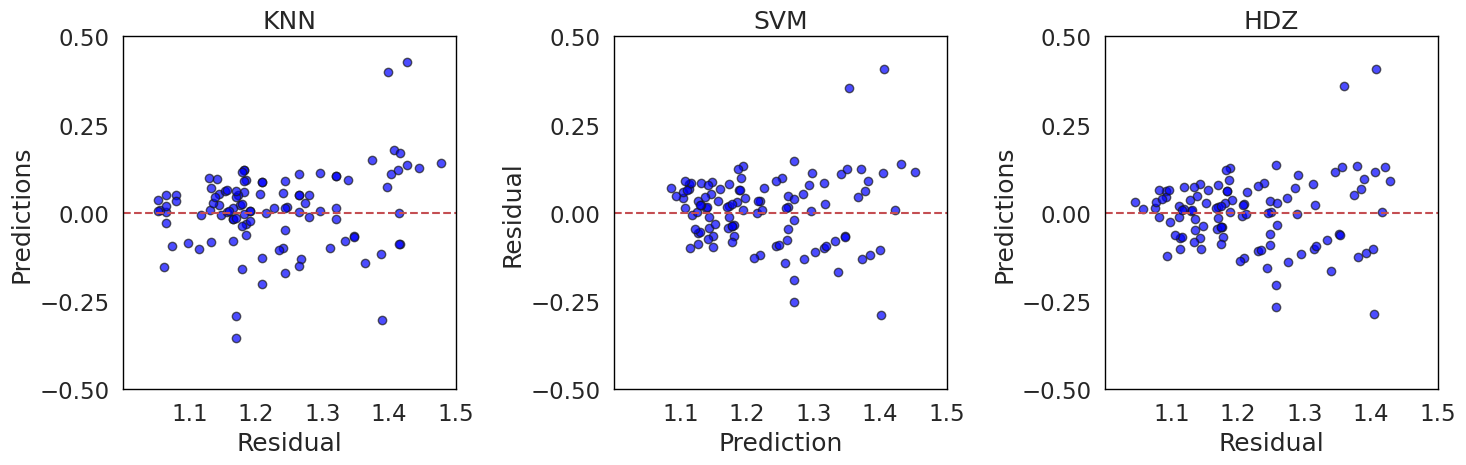

In [102]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))


# KNN Plot
axes[0].scatter(predicted_y_test_HDZ_KNN, residual_HDZ_KNN, color='blue', edgecolors='k', alpha=0.7)
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_yticks(np.arange(-0.5, 0.51, step=0.25))
axes[0].set_xticks(np.arange(1.1, 1.51, step=0.1))
axes[0].set_xlim([1, 1.5])
axes[0].set_ylim([-0.5, 0.5])
axes[0].set_xlabel('Residual')
axes[0].set_ylabel('Predictions')
axes[0].set_title('KNN')
axes[0].set_facecolor('w')
axes[0].spines['left'].set_linewidth(1)
axes[0].spines['bottom'].set_linewidth(1)
axes[0].spines['right'].set_linewidth(1)
axes[0].spines['top'].set_linewidth(1)
axes[0].spines['left'].set_color('black')
axes[0].spines['bottom'].set_color('black')
axes[0].spines['right'].set_color('black')
axes[0].spines['top'].set_color('black')

# SVM Plot
axes[1].scatter(predicted_y_test_HDZ_SVR, residual_HDZ_SVR,color='blue', edgecolors='k', alpha=0.7)
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_yticks(np.arange(-0.5, 0.51, step=0.25))
axes[1].set_xticks(np.arange(1.1, 1.51, step=0.1))
axes[1].set_xlim([1, 1.5])
axes[1].set_ylim([-0.5, 0.5])
axes[1].set_xlabel('Prediction')
axes[1].set_ylabel('Residual')
axes[1].set_title('SVM')
axes[1].set_facecolor('w')
axes[1].spines['left'].set_linewidth(1)
axes[1].spines['bottom'].set_linewidth(1)
axes[1].spines['right'].set_linewidth(1)
axes[1].spines['top'].set_linewidth(1)
axes[1].spines['left'].set_color('black')
axes[1].spines['bottom'].set_color('black')
axes[1].spines['right'].set_color('black')
axes[1].spines['top'].set_color('black')


# MLP Plot
axes[2].scatter(predicted_y_test_HDZ_MLP, residual_HDZ_MLP, color='blue', edgecolors='k', alpha=0.7)
axes[2].axhline(y=0, color='r', linestyle='--')
axes[2].set_yticks(np.arange(-0.5, 0.51, step=0.25))
axes[2].set_xticks(np.arange(1.1, 1.51, step=0.1))
axes[2].set_xlim([1, 1.5])
axes[2].set_ylim([-0.5, 0.5])
axes[2].set_xlabel('Residual')
axes[2].set_ylabel('Predictions')
axes[2].set_title('HDZ')
axes[2].set_facecolor('w')
axes[2].spines['left'].set_linewidth(1)
axes[2].spines['bottom'].set_linewidth(1)
axes[2].spines['right'].set_linewidth(1)
axes[2].spines['top'].set_linewidth(1)
axes[2].spines['left'].set_color('black')
axes[2].spines['bottom'].set_color('black')
axes[2].spines['right'].set_color('black')
axes[2].spines['top'].set_color('black')

plt.tight_layout()
# plt.show()

# plt.savefig("Residuals for HDZ.png", format="png", dpi=600, bbox_inches = 'tight')

#### **EDZi**

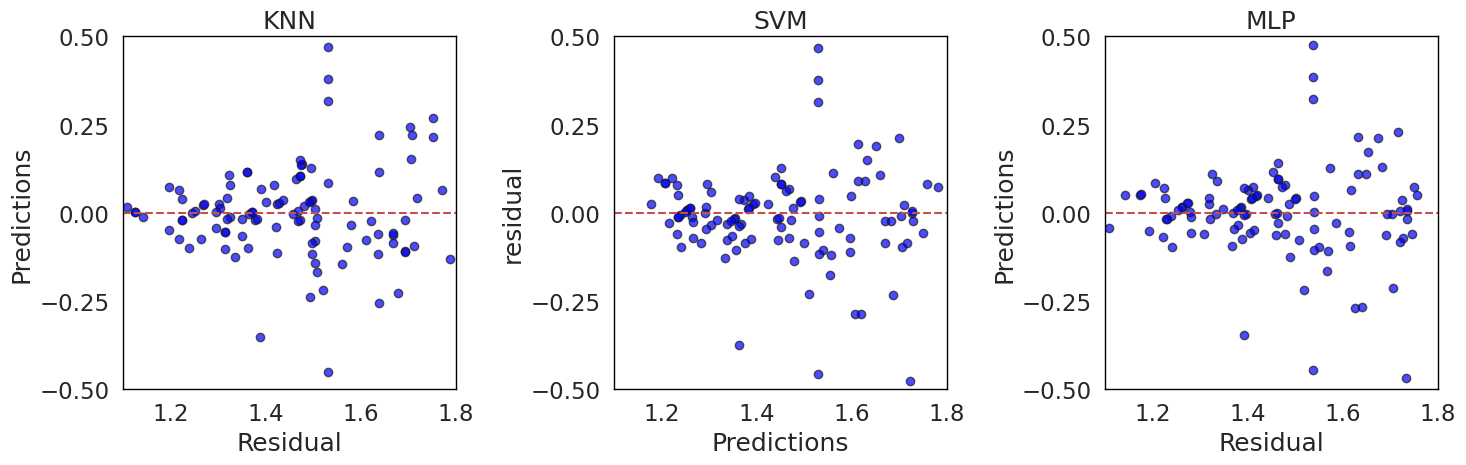

In [103]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# KNN Plot
axes[0].scatter(predicted_y_test_EDZi_KNN, residual_EDZi_KNN, color='blue', edgecolors='k', alpha=0.7)
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_yticks(np.arange(-0.5, 0.51, step=0.25))
axes[0].set_xticks(np.arange(1, 1.81, step=0.2))
axes[0].set_xlim([1.1, 1.8])
axes[0].set_ylim([-0.5, 0.5])
axes[0].set_xlabel('Residual')
axes[0].set_ylabel('Predictions')
axes[0].set_title('KNN')
axes[0].set_facecolor('w')
axes[0].spines['left'].set_linewidth(1)
axes[0].spines['bottom'].set_linewidth(1)
axes[0].spines['right'].set_linewidth(1)
axes[0].spines['top'].set_linewidth(1)
axes[0].spines['left'].set_color('black')
axes[0].spines['bottom'].set_color('black')
axes[0].spines['right'].set_color('black')
axes[0].spines['top'].set_color('black')


# SVM Plot
axes[1].scatter(predicted_y_test_EDZi_SVR, residual_EDZi_SVR, color='blue', edgecolors='k', alpha=0.7)
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_yticks(np.arange(-0.5, 0.51, step=0.25))
axes[1].set_xticks(np.arange(1, 1.81, step=0.2))
axes[1].set_xlim([1.1, 1.8])
axes[1].set_ylim([-0.5, 0.5])
axes[1].set_xlabel('Predictions')
axes[1].set_ylabel('residual')
axes[1].set_title('SVM')
axes[1].set_facecolor('w')
axes[1].spines['left'].set_linewidth(1)
axes[1].spines['bottom'].set_linewidth(1)
axes[1].spines['right'].set_linewidth(1)
axes[1].spines['top'].set_linewidth(1)
axes[1].spines['left'].set_color('black')
axes[1].spines['bottom'].set_color('black')
axes[1].spines['right'].set_color('black')
axes[1].spines['top'].set_color('black')

# EDZi Plot
axes[2].scatter(predicted_y_test_EDZi_MLP, residual_EDZi_MLP, color='blue', edgecolors='k', alpha=0.7)
axes[2].axhline(y=0, color='r', linestyle='--')
axes[2].set_yticks(np.arange(-0.5, 0.51, step=0.25))
axes[2].set_xticks(np.arange(1, 1.81, step=0.2))
axes[2].set_xlim([1.1, 1.8])
axes[2].set_ylim([-0.5, 0.5])
axes[2].set_xlabel('Residual')
axes[2].set_ylabel('Predictions')
axes[2].set_title('MLP')
axes[2].set_facecolor('w')
axes[2].spines['left'].set_linewidth(1)
axes[2].spines['bottom'].set_linewidth(1)
axes[2].spines['right'].set_linewidth(1)
axes[2].spines['top'].set_linewidth(1)
axes[2].spines['left'].set_color('black')
axes[2].spines['bottom'].set_color('black')
axes[2].spines['right'].set_color('black')
axes[2].spines['top'].set_color('black')

plt.tight_layout()
# plt.show()
# plt.savefig("Residuals for EDZi.png", format="png", dpi=600, bbox_inches = 'tight')

#### **EDZo**

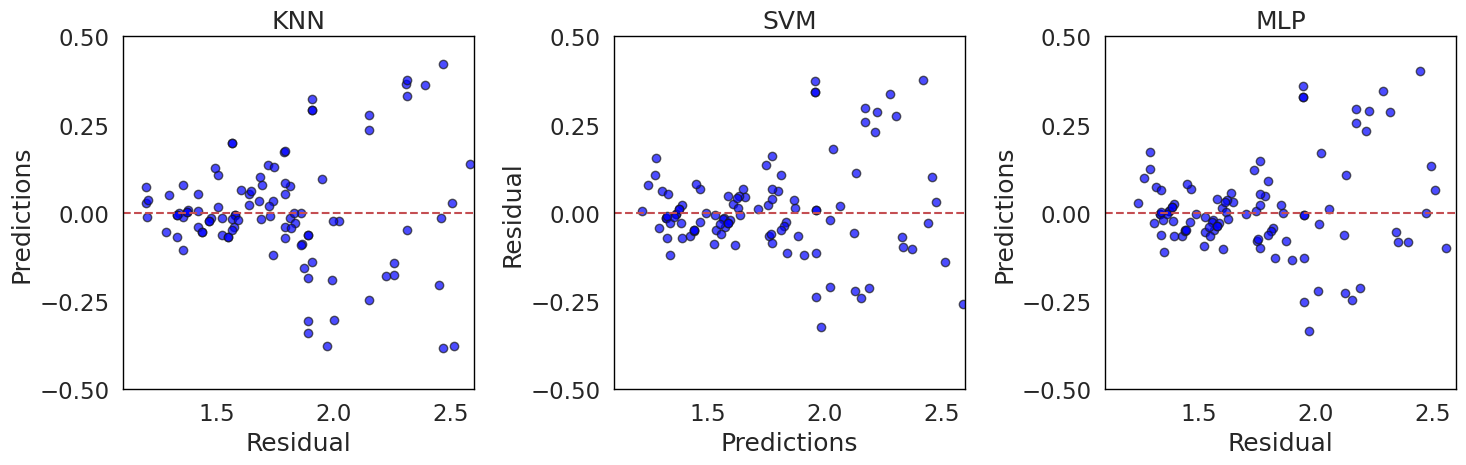

In [104]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# KNN Plot
axes[0].scatter(predicted_y_test_EDZo_KNN, residual_EDZo_KNN, color='blue', edgecolors='k', alpha=0.7)
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_yticks(np.arange(-0.5, 0.51, step=0.25))
axes[0].set_xticks(np.arange(1, 2.51, step=0.5))
axes[0].set_xlim([1.1, 2.6])
axes[0].set_ylim([-0.5, 0.5])
axes[0].set_xlabel('Residual')
axes[0].set_ylabel('Predictions')
axes[0].set_title('KNN')
axes[0].set_facecolor('w')
axes[0].spines['left'].set_linewidth(1)
axes[0].spines['bottom'].set_linewidth(1)
axes[0].spines['right'].set_linewidth(1)
axes[0].spines['top'].set_linewidth(1)
axes[0].spines['left'].set_color('black')
axes[0].spines['bottom'].set_color('black')
axes[0].spines['right'].set_color('black')
axes[0].spines['top'].set_color('black')


# SVM Plot
axes[1].scatter(predicted_y_test_EDZo_SVR, residual_EDZo_SVR, color='blue', edgecolors='k', alpha=0.7)
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_yticks(np.arange(-0.5, 0.51, step=0.25))
axes[1].set_xticks(np.arange(1, 2.51, step=0.5))
axes[1].set_xlim([1.1, 2.6])
axes[1].set_ylim([-0.5, 0.5])
axes[1].set_xlabel('Predictions')
axes[1].set_ylabel('Residual')
axes[1].set_title('SVM')
axes[1].set_facecolor('w')
axes[1].spines['left'].set_linewidth(1)
axes[1].spines['bottom'].set_linewidth(1)
axes[1].spines['right'].set_linewidth(1)
axes[1].spines['top'].set_linewidth(1)
axes[1].spines['left'].set_color('black')
axes[1].spines['bottom'].set_color('black')
axes[1].spines['right'].set_color('black')
axes[1].spines['top'].set_color('black')


# MLP Plot
axes[2].scatter(predicted_y_test_EDZo_MLP, residual_EDZo_MLP, color='blue', edgecolors='k', alpha=0.7)
axes[2].axhline(y=0, color='r', linestyle='--')
axes[2].set_yticks(np.arange(-0.5, 0.51, step=0.25))
axes[2].set_xticks(np.arange(1, 2.51, step=0.5))
axes[2].set_xlim([1.1, 2.6])
axes[2].set_ylim([-0.5, 0.5])
axes[2].set_xlabel('Residual')
axes[2].set_ylabel('Predictions')
axes[2].set_title('MLP')
axes[2].set_facecolor('w')
axes[2].spines['left'].set_linewidth(1)
axes[2].spines['bottom'].set_linewidth(1)
axes[2].spines['right'].set_linewidth(1)
axes[2].spines['top'].set_linewidth(1)
axes[2].spines['left'].set_color('black')
axes[2].spines['bottom'].set_color('black')
axes[2].spines['right'].set_color('black')
axes[2].spines['top'].set_color('black')

plt.tight_layout()
# plt.show()
# plt.savefig("Residuals for EDZo.png", format="png", dpi=600, bbox_inches = 'tight')

#### **KNN**

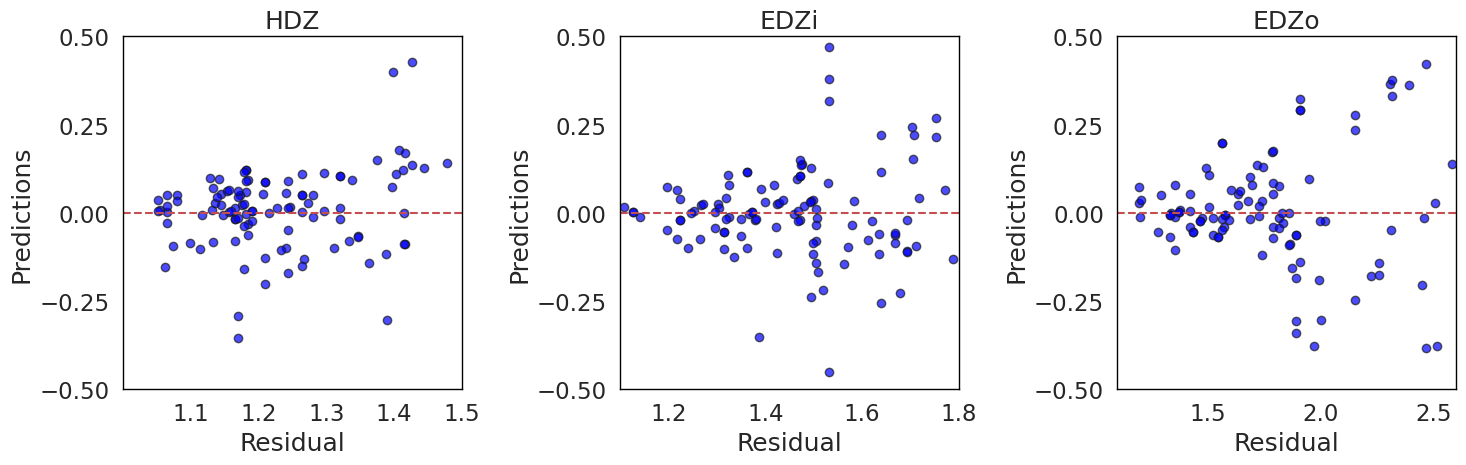

In [105]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))


# HDZ Plot
axes[0].scatter(predicted_y_test_HDZ_KNN, residual_HDZ_KNN, color='blue', edgecolors='k', alpha=0.7)
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_yticks(np.arange(-0.5, 0.51, step=0.25))
axes[0].set_xticks(np.arange(1.1, 1.51, step=0.1))
axes[0].set_xlim([1, 1.5])
axes[0].set_ylim([-0.5, 0.5])
axes[0].set_xlabel('Residual')
axes[0].set_ylabel('Predictions')
axes[0].set_title('HDZ')
axes[0].set_facecolor('w')
axes[0].spines['left'].set_linewidth(1)
axes[0].spines['bottom'].set_linewidth(1)
axes[0].spines['right'].set_linewidth(1)
axes[0].spines['top'].set_linewidth(1)
axes[0].spines['left'].set_color('black')
axes[0].spines['bottom'].set_color('black')
axes[0].spines['right'].set_color('black')
axes[0].spines['top'].set_color('black')




# EDZi Plot
axes[1].scatter(predicted_y_test_EDZi_KNN, residual_EDZi_KNN, color='blue', edgecolors='k', alpha=0.7)
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_yticks(np.arange(-0.5, 0.51, step=0.25))
axes[1].set_xticks(np.arange(1, 1.81, step=0.2))
axes[1].set_xlim([1.1, 1.8])
axes[1].set_ylim([-0.5, 0.5])
axes[1].set_xlabel('Residual')
axes[1].set_ylabel('Predictions')
axes[1].set_title('EDZi')
axes[1].set_facecolor('w')
axes[1].spines['left'].set_linewidth(1)
axes[1].spines['bottom'].set_linewidth(1)
axes[1].spines['right'].set_linewidth(1)
axes[1].spines['top'].set_linewidth(1)
axes[1].spines['left'].set_color('black')
axes[1].spines['bottom'].set_color('black')
axes[1].spines['right'].set_color('black')
axes[1].spines['top'].set_color('black')



# EDZo Plot
axes[2].scatter(predicted_y_test_EDZo_KNN, residual_EDZo_KNN, color='blue', edgecolors='k', alpha=0.7)
axes[2].axhline(y=0, color='r', linestyle='--')
axes[2].set_yticks(np.arange(-0.5, 0.51, step=0.25))
axes[2].set_xticks(np.arange(1, 2.51, step=0.5))
axes[2].set_xlim([1.1, 2.6])
axes[2].set_ylim([-0.5, 0.5])
axes[2].set_xlabel('Residual')
axes[2].set_ylabel('Predictions')
axes[2].set_title('EDZo')
axes[2].set_facecolor('w')
axes[2].spines['left'].set_linewidth(1)
axes[2].spines['bottom'].set_linewidth(1)
axes[2].spines['right'].set_linewidth(1)
axes[2].spines['top'].set_linewidth(1)
axes[2].spines['left'].set_color('black')
axes[2].spines['bottom'].set_color('black')
axes[2].spines['right'].set_color('black')
axes[2].spines['top'].set_color('black')

plt.tight_layout()
# plt.show()
# plt.savefig("Residuals for KNN.png", format="png", dpi=600, bbox_inches = 'tight')

#### **SVM**

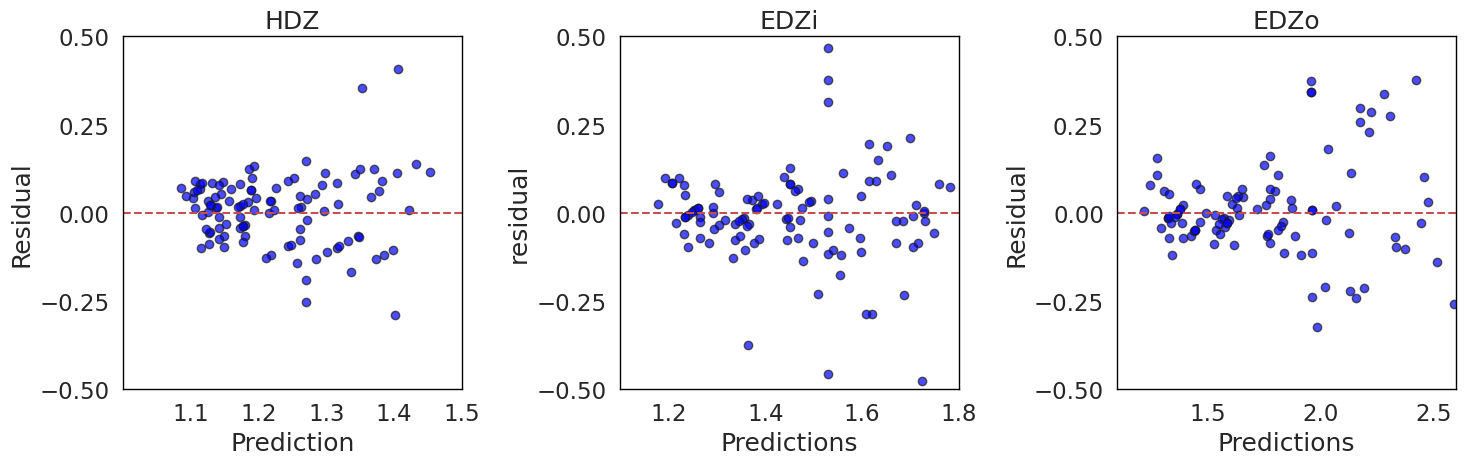

In [106]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))


# HDZ Plot
axes[0].scatter(predicted_y_test_HDZ_SVR, residual_HDZ_SVR,color='blue', edgecolors='k', alpha=0.7)
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_yticks(np.arange(-0.5, 0.51, step=0.25))
axes[0].set_xticks(np.arange(1.1, 1.51, step=0.1))
axes[0].set_xlim([1, 1.5])
axes[0].set_ylim([-0.5, 0.5])
axes[0].set_xlabel('Prediction')
axes[0].set_ylabel('Residual')
axes[0].set_title('HDZ')
axes[0].set_facecolor('w')
axes[0].spines['left'].set_linewidth(1)
axes[0].spines['bottom'].set_linewidth(1)
axes[0].spines['right'].set_linewidth(1)
axes[0].spines['top'].set_linewidth(1)
axes[0].spines['left'].set_color('black')
axes[0].spines['bottom'].set_color('black')
axes[0].spines['right'].set_color('black')
axes[0].spines['top'].set_color('black')




# EDZi Plot
axes[1].scatter(predicted_y_test_EDZi_SVR, residual_EDZi_SVR, color='blue', edgecolors='k', alpha=0.7)
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_yticks(np.arange(-0.5, 0.51, step=0.25))
axes[1].set_xticks(np.arange(1, 1.81, step=0.2))
axes[1].set_xlim([1.1, 1.8])
axes[1].set_ylim([-0.5, 0.5])
axes[1].set_xlabel('Predictions')
axes[1].set_ylabel('residual')
axes[1].set_title('EDZi')
axes[1].set_facecolor('w')
axes[1].spines['left'].set_linewidth(1)
axes[1].spines['bottom'].set_linewidth(1)
axes[1].spines['right'].set_linewidth(1)
axes[1].spines['top'].set_linewidth(1)
axes[1].spines['left'].set_color('black')
axes[1].spines['bottom'].set_color('black')
axes[1].spines['right'].set_color('black')
axes[1].spines['top'].set_color('black')



# EDZo Plot
axes[2].scatter(predicted_y_test_EDZo_SVR, residual_EDZo_SVR, color='blue', edgecolors='k', alpha=0.7)
axes[2].axhline(y=0, color='r', linestyle='--')
axes[2].set_yticks(np.arange(-0.5, 0.51, step=0.25))
axes[2].set_xticks(np.arange(1, 2.51, step=0.5))
axes[2].set_xlim([1.1, 2.6])
axes[2].set_ylim([-0.5, 0.5])
axes[2].set_xlabel('Predictions')
axes[2].set_ylabel('Residual')
axes[2].set_title('EDZo')
axes[2].set_facecolor('w')
axes[2].spines['left'].set_linewidth(1)
axes[2].spines['bottom'].set_linewidth(1)
axes[2].spines['right'].set_linewidth(1)
axes[2].spines['top'].set_linewidth(1)
axes[2].spines['left'].set_color('black')
axes[2].spines['bottom'].set_color('black')
axes[2].spines['right'].set_color('black')
axes[2].spines['top'].set_color('black')

plt.tight_layout()
# plt.show()

# plt.savefig("Residuals for SVM.png", format="png", dpi=600, bbox_inches = 'tight')

#### **MLP**

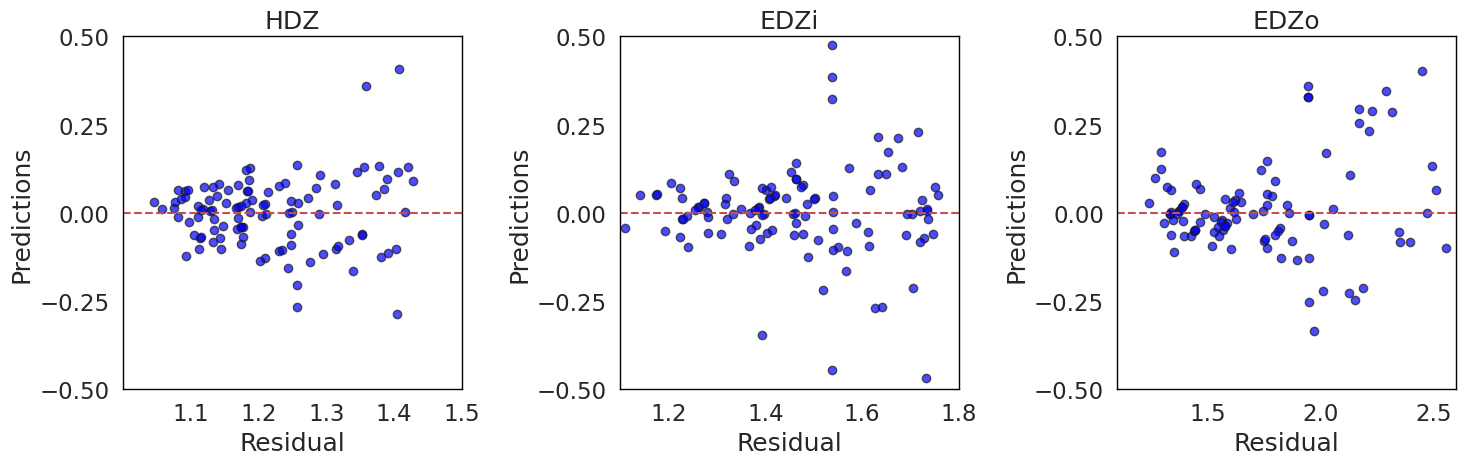

In [107]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))


# HDZ Plot
axes[0].scatter(predicted_y_test_HDZ_MLP, residual_HDZ_MLP, color='blue', edgecolors='k', alpha=0.7)
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_yticks(np.arange(-0.5, 0.51, step=0.25))
axes[0].set_xticks(np.arange(1.1, 1.51, step=0.1))
axes[0].set_xlim([1, 1.5])
axes[0].set_ylim([-0.5, 0.5])
axes[0].set_xlabel('Residual')
axes[0].set_ylabel('Predictions')
axes[0].set_title('HDZ')
axes[0].set_facecolor('w')
axes[0].spines['left'].set_linewidth(1)
axes[0].spines['bottom'].set_linewidth(1)
axes[0].spines['right'].set_linewidth(1)
axes[0].spines['top'].set_linewidth(1)
axes[0].spines['left'].set_color('black')
axes[0].spines['bottom'].set_color('black')
axes[0].spines['right'].set_color('black')
axes[0].spines['top'].set_color('black')




# EDZi Plot
axes[1].scatter(predicted_y_test_EDZi_MLP, residual_EDZi_MLP, color='blue', edgecolors='k', alpha=0.7)
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_yticks(np.arange(-0.5, 0.51, step=0.25))
axes[1].set_xticks(np.arange(1, 1.81, step=0.2))
axes[1].set_xlim([1.1, 1.8])
axes[1].set_ylim([-0.5, 0.5])
axes[1].set_xlabel('Residual')
axes[1].set_ylabel('Predictions')
axes[1].set_title('EDZi')
axes[1].set_facecolor('w')
axes[1].spines['left'].set_linewidth(1)
axes[1].spines['bottom'].set_linewidth(1)
axes[1].spines['right'].set_linewidth(1)
axes[1].spines['top'].set_linewidth(1)
axes[1].spines['left'].set_color('black')
axes[1].spines['bottom'].set_color('black')
axes[1].spines['right'].set_color('black')
axes[1].spines['top'].set_color('black')



# EDZo Plot
axes[2].scatter(predicted_y_test_EDZo_MLP, residual_EDZo_MLP, color='blue', edgecolors='k', alpha=0.7)
axes[2].axhline(y=0, color='r', linestyle='--')
axes[2].set_yticks(np.arange(-0.5, 0.51, step=0.25))
axes[2].set_xticks(np.arange(1, 2.51, step=0.5))
axes[2].set_xlim([1.1, 2.6])
axes[2].set_ylim([-0.5, 0.5])
axes[2].set_xlabel('Residual')
axes[2].set_ylabel('Predictions')
axes[2].set_title('EDZo')
axes[2].set_facecolor('w')
axes[2].spines['left'].set_linewidth(1)
axes[2].spines['bottom'].set_linewidth(1)
axes[2].spines['right'].set_linewidth(1)
axes[2].spines['top'].set_linewidth(1)
axes[2].spines['left'].set_color('black')
axes[2].spines['bottom'].set_color('black')
axes[2].spines['right'].set_color('black')
axes[2].spines['top'].set_color('black')

plt.tight_layout()
# plt.show()
# plt.savefig("Residuals for MLP.png", format="png", dpi=600, bbox_inches = 'tight')

## **1.7 Plotting $R^2$ for different EDZs**

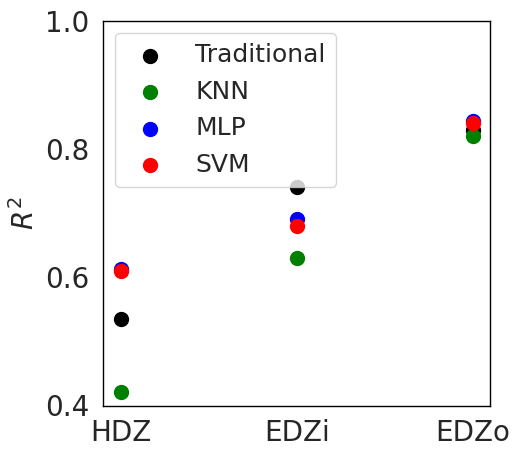

In [108]:
f, ax = plt.subplots(figsize=(5, 5))
ax.set_facecolor('w')
# Set the margin lines
ax.spines['left'].set_linewidth(1)    # Left margin line
ax.spines['bottom'].set_linewidth(1)  # Bottom margin line
ax.spines['right'].set_linewidth(1)   # Right margin line
ax.spines['top'].set_linewidth(1)     # Top margin line
# Set the border lines
ax.spines['left'].set_color('black')    # Left border line color
ax.spines['bottom'].set_color('black')  # Bottom border line color
ax.spines['right'].set_color('black')   # Right border line color
ax.spines['top'].set_color('black')     # Top border line color
x_eval=np.array([1,2,3])
my_xticks = ['HDZ','EDZi','EDZo']
KNN_r2=np.array([0.42, 0.63, 0.82])
MLP_r2=np.array([0.612, 0.69, 0.844])
SVM_r2=np.array([0.61, 0.68, 0.84])
Traditional_r2=np.array([0.534, 0.74, 0.83])
plt.xticks(x_eval, my_xticks)
plt.scatter(x_eval, Traditional_r2, color='black',s=100, label='Traditional')
plt.scatter(x_eval, KNN_r2, color='green', s=100, label='KNN')
plt.scatter(x_eval, MLP_r2, color='blue',s=100, label='MLP')
plt.scatter(x_eval, SVM_r2, color='red',s=100, label='SVM')
plt.xticks(fontsize=20)
plt.ylabel('$R^2$', size=20)
plt.yticks(np.arange(0.4, 1.01, step=0.2),fontsize=20)
plt.legend(fontsize=18, facecolor='w',loc='upper left')
# plt.savefig("r-squared for HDZ.png", format="png", dpi=1200, bbox_inches = 'tight')

## **1.8 Plotting  MAE for different EDZs**

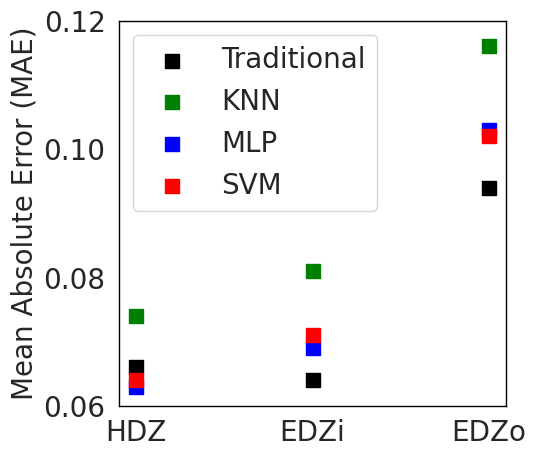

In [109]:
f, ax = plt.subplots(figsize=(5, 5))
ax.set_facecolor('w')
# Set the margin lines
ax.spines['left'].set_linewidth(1)    # Left margin line
ax.spines['bottom'].set_linewidth(1)  # Bottom margin line
ax.spines['right'].set_linewidth(1)   # Right margin line
ax.spines['top'].set_linewidth(1)     # Top margin line
# Set the border lines
ax.spines['left'].set_color('black')    # Left border line color
ax.spines['bottom'].set_color('black')  # Bottom border line color
ax.spines['right'].set_color('black')   # Right border line color
ax.spines['top'].set_color('black')     # Top border line color
x_eval=np.array([1,2,3])
my_xticks = ['HDZ','EDZi','EDZo']
KNN_MAE=np.array([0.074, 0.081,0.116])
MLP_MAE=np.array([0.063, 0.069, 0.103])
SVM_MAE=np.array([0.064, 0.071, 0.102])
Traditional_MAE=np.array([0.066, 0.064, 0.094])
plt.xticks(x_eval, my_xticks)
plt.scatter(x_eval, Traditional_MAE, color='black', s=100, label='Traditional', marker='s')
plt.scatter(x_eval, KNN_MAE, color='green', s=100, label='KNN', marker='s')
plt.scatter(x_eval, MLP_MAE, color='blue',s=100, label='MLP', marker='s')
plt.scatter(x_eval, SVM_MAE, color='red', s=100, label='SVM', marker='s')
plt.xticks(fontsize=20)
plt.yticks(np.arange(0.06, 0.121, step=0.02),fontsize=20)
plt.ylabel("Mean Absolute Error (MAE)", size=20)
plt.legend(facecolor='w',fontsize=20,loc='upper left')
# plt.grid(linewidth=0.5, linestyle='--', color='gray')
# plt.savefig("MAE.png", format="png", dpi=1200, bbox_inches = 'tight')

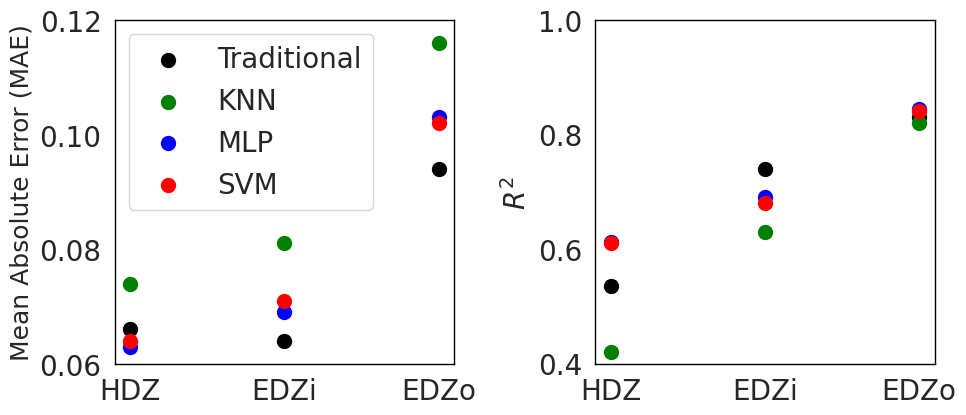

In [110]:
# Data for the first plot
x_eval = np.array([1, 2, 3])
my_xticks = ['HDZ', 'EDZi', 'EDZo']
KNN_r2 = np.array([0.42, 0.63, 0.82])
MLP_r2 = np.array([0.612, 0.69, 0.844])
SVM_r2 = np.array([0.61, 0.68, 0.84])
Traditional_r2 = np.array([0.534, 0.74, 0.83])

# Create the first subplot
plt.figure(figsize=(10, 4.5))  # Adjust the figure size to fit two plots side by side


# Data for the first plot
KNN_MAE = np.array([0.074, 0.081, 0.116])
MLP_MAE = np.array([0.063, 0.069, 0.103])
SVM_MAE = np.array([0.064, 0.071, 0.102])
Traditional_MAE = np.array([0.066, 0.064, 0.094])

# Subplot 1
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.gca().set_facecolor('w')
plt.gca().spines['left'].set_linewidth(1)
plt.gca().spines['bottom'].set_linewidth(1)
plt.gca().spines['right'].set_linewidth(1)
plt.gca().spines['top'].set_linewidth(1)
plt.gca().spines['left'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.gca().spines['top'].set_color('black')

plt.xticks(x_eval, my_xticks, fontsize=20)
plt.scatter(x_eval, Traditional_MAE, color='black', s=100, label='Traditional')
plt.scatter(x_eval, KNN_MAE, color='green', s=100, label='KNN')
plt.scatter(x_eval, MLP_MAE, color='blue', s=100, label='MLP')
plt.scatter(x_eval, SVM_MAE, color='red', s=100, label='SVM')
plt.xticks(fontsize=20)
plt.yticks(np.arange(0.06, 0.121, step=0.02), fontsize=20)
plt.ylabel("Mean Absolute Error (MAE)", size=18)
plt.legend(facecolor='w', fontsize=20, loc='upper left')


# Subplot 2
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.gca().set_facecolor('w')
plt.gca().spines['left'].set_linewidth(1)
plt.gca().spines['bottom'].set_linewidth(1)
plt.gca().spines['right'].set_linewidth(1)
plt.gca().spines['top'].set_linewidth(1)
plt.gca().spines['left'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.gca().spines['top'].set_color('black')

plt.xticks(x_eval, my_xticks, fontsize=20)
plt.scatter(x_eval, Traditional_r2, color='black', s=100, label='Traditional')
plt.scatter(x_eval, KNN_r2, color='green', s=100, label='KNN')
plt.scatter(x_eval, MLP_r2, color='blue', s=100, label='MLP')
plt.scatter(x_eval, SVM_r2, color='red', s=100, label='SVM')
plt.xticks(fontsize=20)
plt.ylabel('$R^2$', size=20)
plt.yticks(np.arange(0.4, 1.01, step=0.2), fontsize=20)
# plt.legend(fontsize=18, facecolor='w', loc='upper left')



# Adjust spacing between subplots
plt.tight_layout()


# plt.savefig("Regression Metrics for ISRM.png", format="png", dpi=600, bbox_inches = 'tight')

## **1.9 Plotting Regression Lines for different EDZs**

### **Plotting Real World Data**

In [111]:
# x = sigmax/CI,   y = r/R

x_invert_HDZ=(1.452, 2.012, 2.012, 0.963,1.176, 1.327)
y_invert_HDZ=(1, 1, 1.229, 1.001,1, 1.0147)
print('Size of X is ',len(x_invert_HDZ), ' and size of Y is ', len(y_invert_HDZ))

x_invert_EDZi=(1.452, 2.012, 2.012, 0.963, 1.176, 4, 4, 2.489, 2.489, 1.327)
y_invert_EDZi=(1.029, 1.171, 1.4, 1.005, 1, 1.5, 1.694, 1.533, 1.333, 1.025)
print('Size of X is ',len(x_invert_EDZi), ' and size of Y is ', len(y_invert_EDZi))

x_invert_EDZo=(1.452, 2.012, 2.012, 0.963, 4, 4, 2.489, 1.327)
y_invert_EDZo=(1.286, 1.8, 1.571, 1.017, 2.5, 2.389, 1.933, 1.0413)
print('Size of X is ',len(x_invert_EDZo), ' and size of Y is ', len(y_invert_EDZo))

x_crown_HDZ=(1.452, 2.012, 2.012, 0.963, 1.176, 1.327)
y_crown_HDZ=(1.029, 1.8, 1.229, 1.001, 1, 1.0147)
print('Size of X is ',len(x_crown_HDZ), ' and size of Y is ', len(y_crown_HDZ))

x_crown_EDZi=(1.452, 2.012, 2.012, 0.963, 1.176, 4, 4, 2.489, 2.489, 1.327)
y_crown_EDZi=(1.086, 1.286, 1.4, 1.005, 1, 1.5, 1.694, 1.533, 1.333, 1.025)
print('Size of X is ',len(x_crown_EDZi), ' and size of Y is ', len(y_crown_EDZi))

x_crown_EDZo=(1.452, 2.012, 2.012, 0.963, 4, 4, 2.489, 1.327)
y_crown_EDZo=(1.171, 1.371, 1.571, 1.017, 1.667, 2.111, 1.933, 1.0413)
print('Size of X is ',len(x_crown_EDZo), ' and size of Y is ', len(y_crown_EDZo))

x_sidewall_HDZ=(1.452, 2.012, 2.012, 0.963, 1.176, 1.327, 1.688)
y_sidewall_HDZ=(1, 1, 1, 1.001, 1, 1.0147, 1.1304)
print('Size of X is ',len(x_sidewall_HDZ), ' and size of Y is ', len(y_sidewall_HDZ))

x_sidewall_EDZi=(1.452, 2.012, 2.012, 0.963, 1.176, 4, 4, 2.489, 2.489, 1.327, 1.688, 1.607)
y_sidewall_EDZi=(1, 1.457, 1.2, 1.005, 1, 1.333, 1.611, 1.533, 1.333, 1.025, 1.1304, 1.323)
print('Size of X is ',len(x_sidewall_EDZi), ' and size of Y is ', len(y_sidewall_EDZi))

x_sidewall_EDZo=(1.452, 2.012, 2.012, 0.963, 4, 2.489, 1.327)
y_sidewall_EDZo=(1.229, 1.857, 1.686, 1.017, 2.083, 1.933, 1.0413)
print('Size of X is ',len(x_sidewall_EDZo), ' and size of Y is ', len(y_sidewall_EDZo))



Size of X is  6  and size of Y is  6
Size of X is  10  and size of Y is  10
Size of X is  8  and size of Y is  8
Size of X is  6  and size of Y is  6
Size of X is  10  and size of Y is  10
Size of X is  8  and size of Y is  8
Size of X is  7  and size of Y is  7
Size of X is  12  and size of Y is  12
Size of X is  7  and size of Y is  7


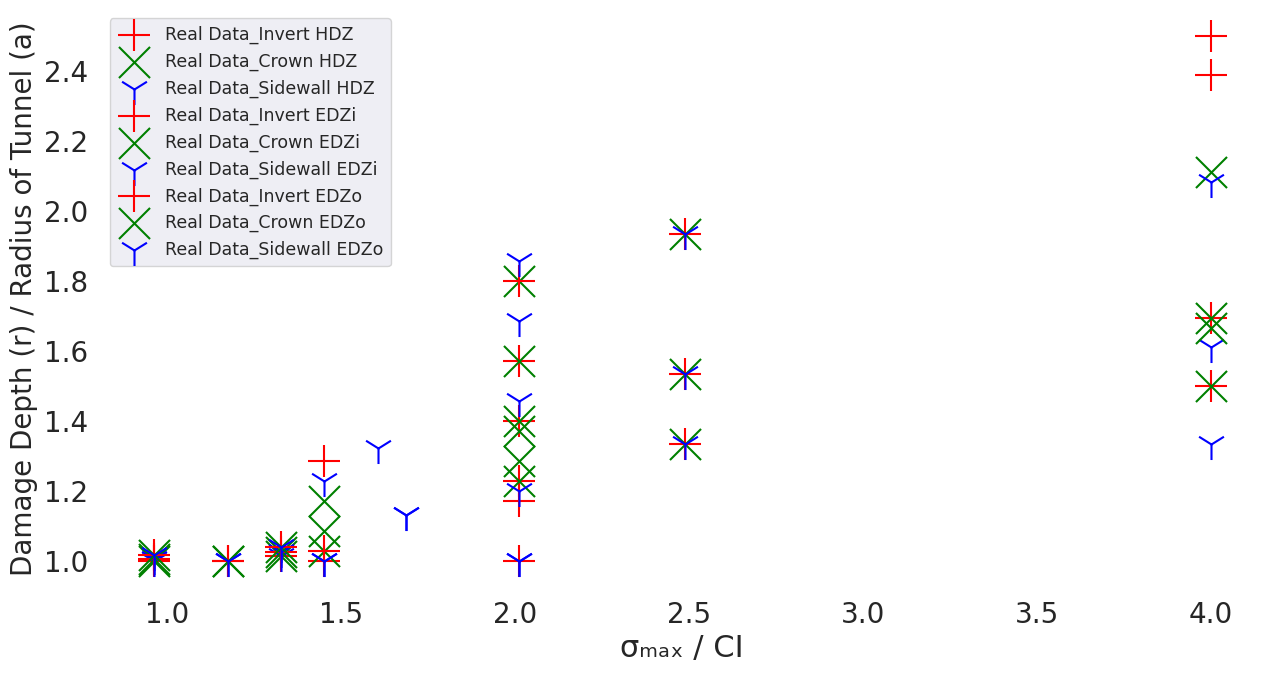

In [112]:
f, ax = plt.subplots(figsize=(15, 7.5))
ax.set_facecolor('w')
plt.scatter(x_invert_HDZ, y_invert_HDZ, marker='+', color='red', s=500, label='Real Data_Invert HDZ')
plt.scatter(x_crown_HDZ, y_crown_HDZ, marker='x', color='green', s=500, label='Real Data_Crown HDZ')
plt.scatter(x_sidewall_HDZ, y_sidewall_HDZ, marker='1', color='blue', s=500, label='Real Data_Sidewall HDZ')
plt.scatter(x_invert_EDZi, y_invert_EDZi, marker='+', color='red', s=500, label='Real Data_Invert EDZi')
plt.scatter(x_crown_EDZi, y_crown_EDZi, marker='x', color='green', s=500, label='Real Data_Crown EDZi')
plt.scatter(x_sidewall_EDZi, y_sidewall_EDZi, marker='1', color='blue', s=500, label='Real Data_Sidewall EDZi')
plt.scatter(x_invert_EDZo, y_invert_EDZo, marker='+', color='red', s=500, label='Real Data_Invert EDZo')
plt.scatter(x_crown_EDZo, y_crown_EDZo, marker='x', color='green', s=500, label='Real Data_Crown EDZo')
plt.scatter(x_sidewall_EDZo, y_sidewall_EDZo, marker='1', color='blue', s=500, label='Real Data_Sidewall EDZo')
plt.xlabel('\u03C3\u2098\u2090\u2093 / CI', size= 22)
plt.ylabel('Damage Depth (r) / Radius of Tunnel (a)',size=20)
ax.tick_params(axis='both', labelsize=20)
plt.legend(loc='upper left', fontsize='x-small')

### **HDZ**

In [113]:
# Sorting values for plotting otherwise, the regression plot would be messy
# starting with the x_test_HDZ then predicted values for different algorithms

predicted_y_test_HDZ_SVR = predicted_y_test_HDZ_SVR.reshape(106,1)
predicted_y_test_HDZ_MLP = predicted_y_test_HDZ_MLP.reshape(106,1)
predicted_y_test_HDZ_Ridge = predicted_y_test_HDZ_Ridge.reshape(106,1)

x_test_HDZ=x_test_HDZ[x_test_HDZ[:, 0].argsort()]
predicted_y_test_poly2_HDZ_linear= predicted_y_test_poly2_HDZ_linear[predicted_y_test_poly2_HDZ_linear[:,0].argsort()]
predicted_y_test_HDZ_KNN= predicted_y_test_HDZ_KNN[predicted_y_test_HDZ_KNN[:,0].argsort()]
predicted_y_test_HDZ_Ridge= predicted_y_test_HDZ_Ridge[predicted_y_test_HDZ_Ridge[:,0].argsort()]
predicted_y_test_HDZ_SVR= predicted_y_test_HDZ_SVR[predicted_y_test_HDZ_SVR[:,0].argsort()]
predicted_y_test_HDZ_MLP= predicted_y_test_HDZ_MLP[predicted_y_test_HDZ_MLP[:,0].argsort()]

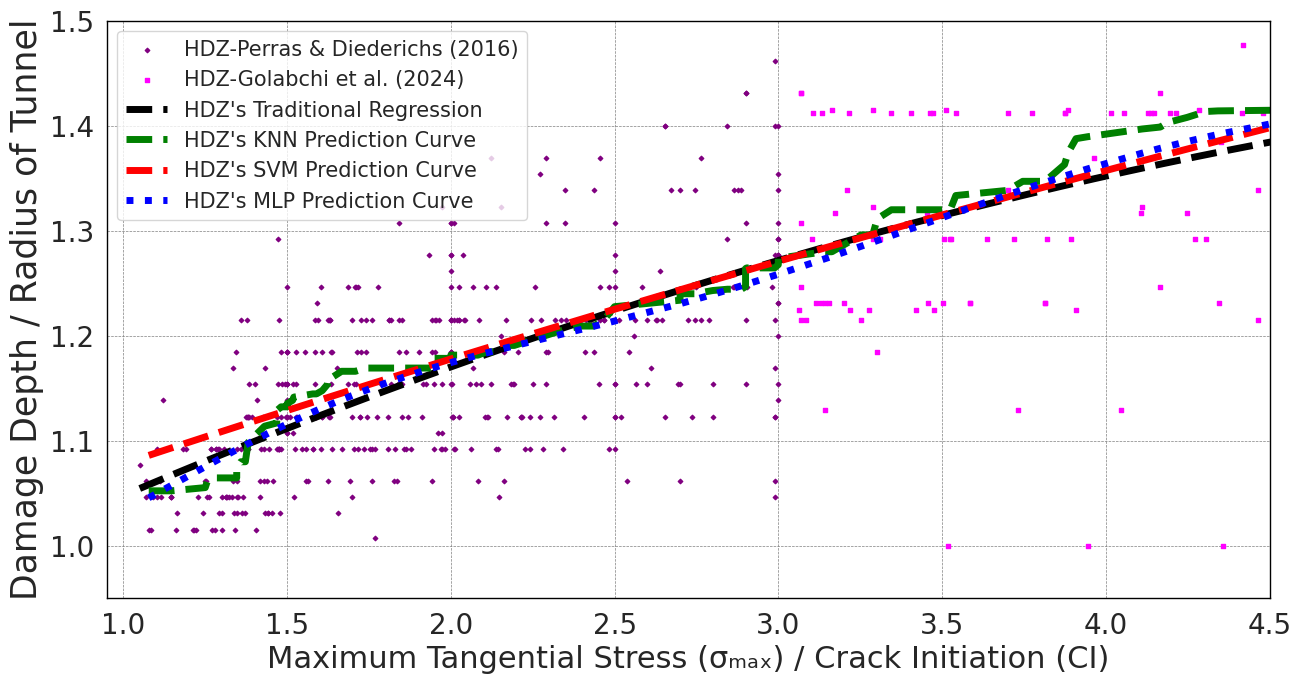

In [114]:
f, ax = plt.subplots(figsize=(15, 7.5))
ax.set_facecolor('w')

# plt.scatter(x_invert_HDZ, y_invert_HDZ, marker='+', color='red', s=500, label='Empirical Data_Invert HDZ')
# plt.scatter(x_crown_HDZ, y_crown_HDZ, marker='x', color='green', s=500, label='Empirical Data_Crown HDZ')
# plt.scatter(x_sidewall_HDZ, y_sidewall_HDZ, marker='1', color='blue', s=500, label='Empirical Data_Sidewall HDZ')


plt.scatter (x_HDZ_PerrasDiederichs, y_HDZ_PerrasDiederichs, s=5, color= 'purple', label = 'HDZ-Perras & Diederichs (2016)', marker='D')
plt.scatter (x_HDZ_GolabchiPerras, y_HDZ_GolabchiPerras, s=5, color = 'magenta', label = 'HDZ-Golabchi et al. (2024)', marker='s')

plt.plot(x_HDZ, ypred_HDZ, linewidth = 5, linestyle='dashed', color = 'black', label= 'HDZ\'s Traditional Regression')

# plt.plot(x_test_HDZ, predicted_y_test_poly2_HDZ_linear, linewidth = 5, linestyle='dashed', color = 'blue', label= 'HDZ\'s polynomial prediction line')
# plt.plot(x_test_HDZ, predicted_y_test_HDZ_Ridge, linewidth = 5, linestyle='dashed', color = 'red', label= 'HDZ\'s Ridge prediction line')
plt.plot(x_test_HDZ, predicted_y_test_HDZ_KNN, linewidth = 5, linestyle='dashed', color = 'green', label= 'HDZ\'s KNN Prediction Curve')
plt.plot(x_test_HDZ, predicted_y_test_HDZ_SVR, linewidth = 5, linestyle='dashed', color = 'red', label= 'HDZ\'s SVM Prediction Curve')
plt.plot(x_test_HDZ, predicted_y_test_HDZ_MLP, linewidth = 5, linestyle='dotted', color = 'blue', label= 'HDZ\'s MLP Prediction Curve')


# Set the margin lines
ax.spines['left'].set_linewidth(1)    # Left margin line
ax.spines['bottom'].set_linewidth(1)  # Bottom margin line
ax.spines['right'].set_linewidth(1)   # Right margin line
ax.spines['top'].set_linewidth(1)     # Top margin line
# Set the border lines
ax.spines['left'].set_color('black')    # Left border line color
ax.spines['bottom'].set_color('black')  # Bottom border line color
ax.spines['right'].set_color('black')   # Right border line color
ax.spines['top'].set_color('black')     # Top border line color


# Set the grid
plt.grid(linewidth=0.5, linestyle='--', color='gray')

ax.tick_params(axis='both', labelsize=20)
plt.ylim(.95, 1.5)
plt.xlim(0.95, 4.5)
plt.xlabel('Maximum Tangential Stress (\u03C3\u2098\u2090\u2093) / Crack Initiation (CI)', size= 22)
plt.ylabel('Damage Depth / Radius of Tunnel', size = 25)
plt.legend(fontsize=15, facecolor='w')
# plt.savefig("Regression HDZ.png", format="png", dpi=600, bbox_inches = 'tight')

### **EDZi**

In [115]:
# Sorting values for plotting otherwise, the regression plot would be messy
# starting with the x_test_HDZ then predicted values for different algorithms

predicted_y_test_EDZi_SVR = predicted_y_test_EDZi_SVR.reshape(108,1)
predicted_y_test_EDZi_MLP = predicted_y_test_EDZi_MLP.reshape(108,1)
predicted_y_test_EDZi_Ridge = predicted_y_test_EDZi_Ridge.reshape(108,1)

x_test_EDZi=x_test_EDZi[x_test_EDZi[:, 0].argsort()]
predicted_y_test_poly2_EDZi_linear= predicted_y_test_poly2_EDZi_linear[predicted_y_test_poly2_EDZi_linear[:,0].argsort()]
predicted_y_test_EDZi_KNN= predicted_y_test_EDZi_KNN[predicted_y_test_EDZi_KNN[:,0].argsort()]
predicted_y_test_EDZi_Ridge= predicted_y_test_EDZi_Ridge[predicted_y_test_EDZi_Ridge[:,0].argsort()]
predicted_y_test_EDZi_SVR= predicted_y_test_EDZi_SVR[predicted_y_test_EDZi_SVR[:,0].argsort()]
predicted_y_test_EDZi_MLP= predicted_y_test_EDZi_MLP[predicted_y_test_EDZi_MLP[:,0].argsort()]

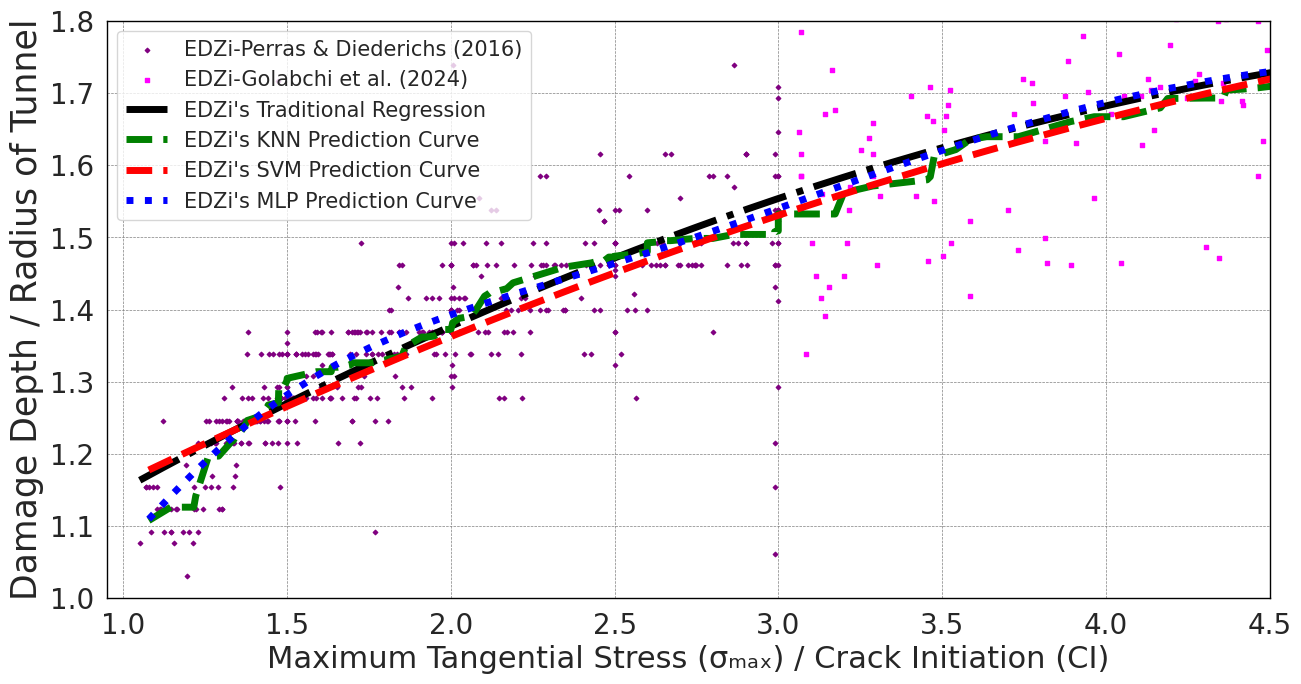

In [116]:
f, ax = plt.subplots(figsize=(15, 7.5))
ax.set_facecolor('w')

# plt.scatter(x_invert_EDZi, y_invert_EDZi, marker='+', color='red', s=500, label='Empirical Data_Invert EDZi')
# plt.scatter(x_crown_EDZi, y_crown_EDZi, marker='x', color='green', s=500, label='Empirical Data_Crown EDZi')
# plt.scatter(x_sidewall_EDZi, y_sidewall_EDZi, marker='1', color='blue', s=500, label='Empirical Data_Sidewall EDZi')



plt.scatter (x_EDZi_PerrasDiederichs, y_EDZi_PerrasDiederichs, color= 'purple', label = 'EDZi-Perras & Diederichs (2016)', s=5, marker='D')
plt.scatter (x_EDZi_GolabchiPerras, y_EDZi_GolabchiPerras, color = 'magenta', label = 'EDZi-Golabchi et al. (2024)', marker='s', s=5)

# Set the margin lines
ax.spines['left'].set_linewidth(1)    # Left margin line
ax.spines['bottom'].set_linewidth(1)  # Bottom margin line
ax.spines['right'].set_linewidth(1)   # Right margin line
ax.spines['top'].set_linewidth(1)     # Top margin line
# Set the border lines
ax.spines['left'].set_color('black')    # Left border line color
ax.spines['bottom'].set_color('black')  # Bottom border line color
ax.spines['right'].set_color('black')   # Right border line color
ax.spines['top'].set_color('black')     # Top border line color


# Set the grid
plt.grid(linewidth=0.5, linestyle='--', color='gray')
plt.xlim(0.95, 4.5)
plt.ylim(1, 1.8)

plt.plot(x_EDZi, ypred_EDZi, linewidth = 5, linestyle='dashdot', color = 'black', label= 'EDZi\'s Traditional Regression')

# plt.plot(x_test_EDZi, predicted_y_test_poly2_EDZi_linear, linewidth = 5, linestyle='dashed', color = 'blue', label= 'EDZi\'s polynomial prediction line')
# plt.plot(x_test_EDZi, predicted_y_test_EDZi_Ridge, linewidth = 5, linestyle='dashed', color = 'red', label= 'EDZi\'s Ridge prediction line')
plt.plot(x_test_EDZi, predicted_y_test_EDZi_KNN, linewidth = 5, linestyle='dashed', color = 'green', label= 'EDZi\'s KNN Prediction Curve')
plt.plot(x_test_EDZi, predicted_y_test_EDZi_SVR, linewidth = 5, linestyle='dashed', color = 'red', label= 'EDZi\'s SVM Prediction Curve')
plt.plot(x_test_EDZi, predicted_y_test_EDZi_MLP, linewidth = 5, linestyle='dotted', color = 'blue', label= 'EDZi\'s MLP Prediction Curve')
ax.tick_params(axis='both', labelsize=20)
plt.xlabel('Maximum Tangential Stress (\u03C3\u2098\u2090\u2093) / Crack Initiation (CI)', size= 22)
plt.ylabel('Damage Depth / Radius of Tunnel', size = 25)
plt.legend(loc='upper left', fontsize=15, facecolor='w')
# plt.savefig("Regression EDZi.png", format="png", dpi=600, bbox_inches = 'tight')

### **EDZo**

In [117]:
# Sorting values for plotting otherwise, the regression plot would be messy
# starting with the x_test_HDZ then predicted values for different algorithms

predicted_y_test_EDZo_SVR = predicted_y_test_EDZo_SVR.reshape(108,1)
predicted_y_test_EDZo_MLP = predicted_y_test_EDZo_MLP.reshape(108,1)
predicted_y_test_EDZo_Ridge = predicted_y_test_EDZo_Ridge.reshape(108,1)
predicted_y_test_EDZo_KNN = predicted_y_test_EDZo_KNN.reshape(108,1)


x_test_EDZo=x_test_EDZo[x_test_EDZo[:, 0].argsort()]
predicted_y_test_poly2_EDZo_linear= predicted_y_test_poly2_EDZo_linear[predicted_y_test_poly2_EDZo_linear[:,0].argsort()]
predicted_y_test_EDZo_KNN= predicted_y_test_EDZo_KNN[predicted_y_test_EDZo_KNN[:,0].argsort()]
predicted_y_test_EDZo_Ridge= predicted_y_test_EDZo_Ridge[predicted_y_test_EDZo_Ridge[:,0].argsort()]
predicted_y_test_EDZo_SVR= predicted_y_test_EDZo_SVR[predicted_y_test_EDZo_SVR[:,0].argsort()]
predicted_y_test_EDZo_MLP= predicted_y_test_EDZo_MLP[predicted_y_test_EDZo_MLP[:,0].argsort()]

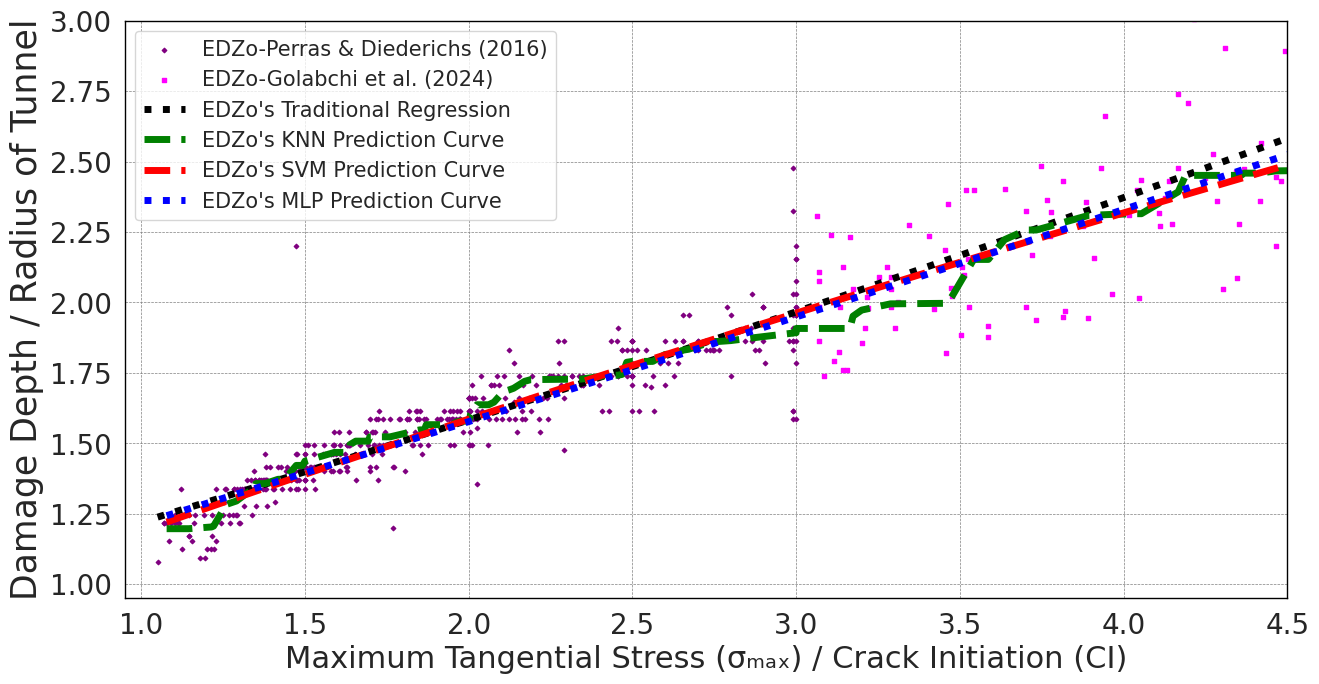

In [118]:
f, ax = plt.subplots(figsize=(15, 7.5))
ax.set_facecolor('w')

# plt.scatter(x_invert_EDZo, y_invert_EDZo, marker='+', color='red', s=500, label='Empirical Data_Invert EDZo')
# plt.scatter(x_crown_EDZo, y_crown_EDZo, marker='x', color='green', s=500, label='Empirical Data_Crown EDZo')
# plt.scatter(x_sidewall_EDZo, y_sidewall_EDZo, marker='1', color='blue', s=500, label='Empirical Data_Sidewall EDZo')


plt.scatter (x_EDZo_PerrasDiederichs, y_EDZo_PerrasDiederichs, s=5, color= 'purple', label = 'EDZo-Perras & Diederichs (2016)', marker='D')
plt.scatter (x_EDZo_GolabchiPerras, y_EDZo_GolabchiPerras, s=5, color = 'magenta', label = 'EDZo-Golabchi et al. (2024)', marker='s')


# Set the margin lines
ax.spines['left'].set_linewidth(1)    # Left margin line
ax.spines['bottom'].set_linewidth(1)  # Bottom margin line
ax.spines['right'].set_linewidth(1)   # Right margin line
ax.spines['top'].set_linewidth(1)     # Top margin line
# Set the border lines
ax.spines['left'].set_color('black')    # Left border line color
ax.spines['bottom'].set_color('black')  # Bottom border line color
ax.spines['right'].set_color('black')   # Right border line color
ax.spines['top'].set_color('black')     # Top border line color


# Set the grid
plt.grid(linewidth=0.5, linestyle='--', color='gray')


plt.plot(x_EDZo, ypred_EDZo, linewidth = 5, linestyle='dotted', color = 'black', label= 'EDZo\'s Traditional Regression')
# plt.plot(x_test_EDZo, predicted_y_test_poly2_EDZo_linear, linewidth = 5, linestyle='dashed', color = 'blue', label= 'EDZo\'s polynomial prediction line')
# plt.plot(x_test_EDZo, predicted_y_test_EDZo_Ridge, linewidth = 5, linestyle='dashed', color = 'red', label= 'EDZo\'s Ridge prediction line')
plt.plot(x_test_EDZo, predicted_y_test_EDZo_KNN, linewidth = 5, linestyle='dashed', color = 'green', label= 'EDZo\'s KNN Prediction Curve')
plt.plot(x_test_EDZo, predicted_y_test_EDZo_SVR, linewidth = 5, linestyle='dashed', color = 'red', label= 'EDZo\'s SVM Prediction Curve')
plt.plot(x_test_EDZo, predicted_y_test_EDZo_MLP, linewidth = 5, linestyle='dotted', color = 'blue', label= 'EDZo\'s MLP Prediction Curve')
ax.tick_params(axis='both', labelsize=20)
plt.xlim(0.95, 4.5)
plt.ylim(0.95,3)
plt.xlabel('Maximum Tangential Stress (\u03C3\u2098\u2090\u2093) / Crack Initiation (CI)', size= 22)
plt.ylabel('Damage Depth / Radius of Tunnel', size = 25)
plt.legend(loc='upper left', fontsize=15, facecolor='w')
# plt.savefig("Regression EDZo.png", format="png", dpi=600, bbox_inches = 'tight')

# **2. Classification**

##**Initial Steps**

In [119]:
# Dropping the output column and consider the rest as inputs
inputs = edz.drop('Region', axis=1)
# Considering the final column as the output
output = edz['Region']
# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(inputs, output, test_size= 0.2, shuffle = True, random_state = 7)
y_test.shape
# print (x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(321,)

##**2.1 Logistic Regression**

### **Parameter Tunning**

In [120]:
model_logistic_GCV=LogisticRegression()
params_logistic_GCV={'C':[0.1, 1, 10, 100],
                     'solver':['lbfgs', 'newton-cg', 'sag', 'saga'],
                     'multi_class':['ovr', 'auto', 'multinomial']}
gridSearchCV=GridSearchCV(model_logistic_GCV, params_logistic_GCV,n_jobs=-1, cv= StratifiedKFold (n_splits = 5), scoring ='accuracy',)
gridSearchCV.fit(x_train, y_train)
gridSearchCV.best_params_

{'C': 1, 'multi_class': 'auto', 'solver': 'lbfgs'}

### **Visualizing Parameter Tunning**

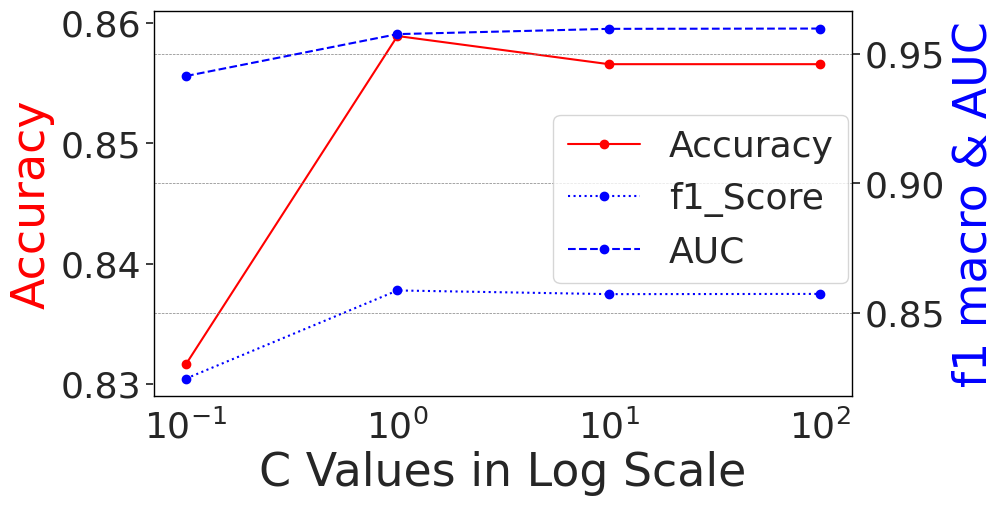

In [121]:
C_values = [0.1, 1, 10, 100]
accuracy_c= []
f1_macro= []
AUC_c= []
for i in C_values:
  accuracy_c.append(cross_val_score(LogisticRegression(C= i , solver= 'lbfgs' , multi_class = 'auto'), x_train, y_train, cv= StratifiedKFold (n_splits = 5), scoring ='accuracy').mean())
  f1_macro.append(abs(cross_val_score(LogisticRegression(C= i , solver= 'lbfgs' , multi_class = 'auto'), x_train, y_train, cv= StratifiedKFold (n_splits = 5), scoring ='f1_macro').mean()))
  AUC_c.append(cross_val_score(LogisticRegression(C= i , solver= 'lbfgs' , multi_class = 'auto'), x_train, y_train, cv= StratifiedKFold (n_splits = 5), scoring ='roc_auc_ovr').mean())
fig = plt.figure(figsize=(9, 5))
ax=plt.axes(facecolor='white', xscale=('log'), xticks=([0.1, 1, 10, 100]), yticks = ([0.83, 0.84, 0.85, 0.86]))

ax.plot(C_values, accuracy_c, color = 'red', label='Accuracy', marker='o')
ax.set_ylabel("Accuracy",color="red",fontsize=33)
ax.set_ylim(0.829, 0.861)
ax2=ax.twinx()
ax2.plot(C_values, f1_macro, color = 'blue', label='f1_Score', linestyle='dotted', marker='o')
ax2.plot(C_values, AUC_c, color = 'blue', label='AUC', linestyle='dashed', marker='o')
ax2.set_ylabel("f1 macro & AUC",color="blue",fontsize=33)
ax.set_xlabel('C Values in Log Scale', size =33 )
# ax2.legend(facecolor='w', fontsize= 17)
fig.legend(loc=(0.55, 0.44), facecolor='w', fontsize= 26)
ax2.spines['left'].set_linewidth(1)    # Left margin line
ax2.spines['bottom'].set_linewidth(1)  # Bottom margin line
ax2.spines['right'].set_linewidth(1)   # Right margin line
ax2.spines['top'].set_linewidth(1)     # Top margin line
# Set the border lines
ax2.spines['left'].set_color('black')    # Left border line color
ax2.spines['bottom'].set_color('black')  # Bottom border line color
ax2.spines['right'].set_color('black')   # Right border line color
ax2.spines['top'].set_color('black')     # Top border line color
ax.tick_params(axis='both', labelsize=26)
ax2.tick_params(axis='both', labelsize=26)
plt.grid(linewidth=0.5, linestyle='--', color='gray')
# plt.title('Accuracy, MSE, & MAE for different C values', size= 24)
plt.savefig("Visualizing Parameter Tunning.png", format="png", dpi=600, bbox_inches = 'tight')

### **Model Training**

In [122]:
model = LogisticRegression(solver ='lbfgs', C = 1, multi_class='auto', random_state = 7)
model.fit(x_train, y_train)
print(' The model score is: ', model.score(x_test, y_test))
y_predicted_train = model.predict(x_train)
print('The accuracy score is: ', accuracy_score(y_test, model.predict(x_test)))

 The model score is:  0.897196261682243
The accuracy score is:  0.897196261682243


### **Confusion Matrix**

Text(20.75, 0.5, 'Expected')

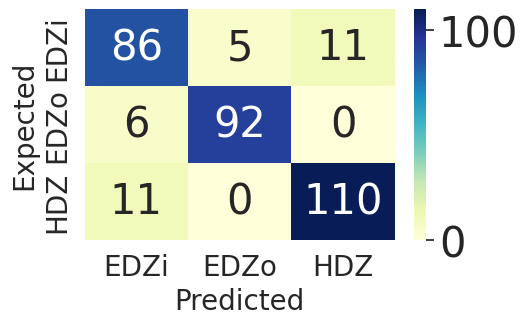

In [123]:
y_predicted_logistic = model.predict(x_test)
confusion_logistic = confusion_matrix (y_test, y_predicted_logistic)
plt.figure (figsize = (5, 3))
heatmap = sns.heatmap(confusion_logistic, annot = True, fmt='g', xticklabels=('EDZi', 'EDZo', 'HDZ'),
            yticklabels=('EDZi', 'EDZo', 'HDZ'), cmap= 'YlGnBu', annot_kws={"size": 30})
colorbar = heatmap.collections[0].colorbar
colorbar.ax.tick_params(labelsize=30)
plt.xticks(fontsize=20, rotation='horizontal')
plt.yticks(fontsize=20)
plt.xlabel ('Predicted', size=20)
plt.ylabel ('Expected', size=20)

### **ROC Curve**

In [124]:
Logistic_OVRC= OneVsRestClassifier(LogisticRegression(solver ='lbfgs', C = 1, multi_class='auto'))
Logistic_OVRC.fit(x_train, y_train)
y_pred_OVRC_Logistic = Logistic_OVRC.predict(x_test)
y_pred_prob_OVRC_Logistic = Logistic_OVRC.predict_proba(x_test)

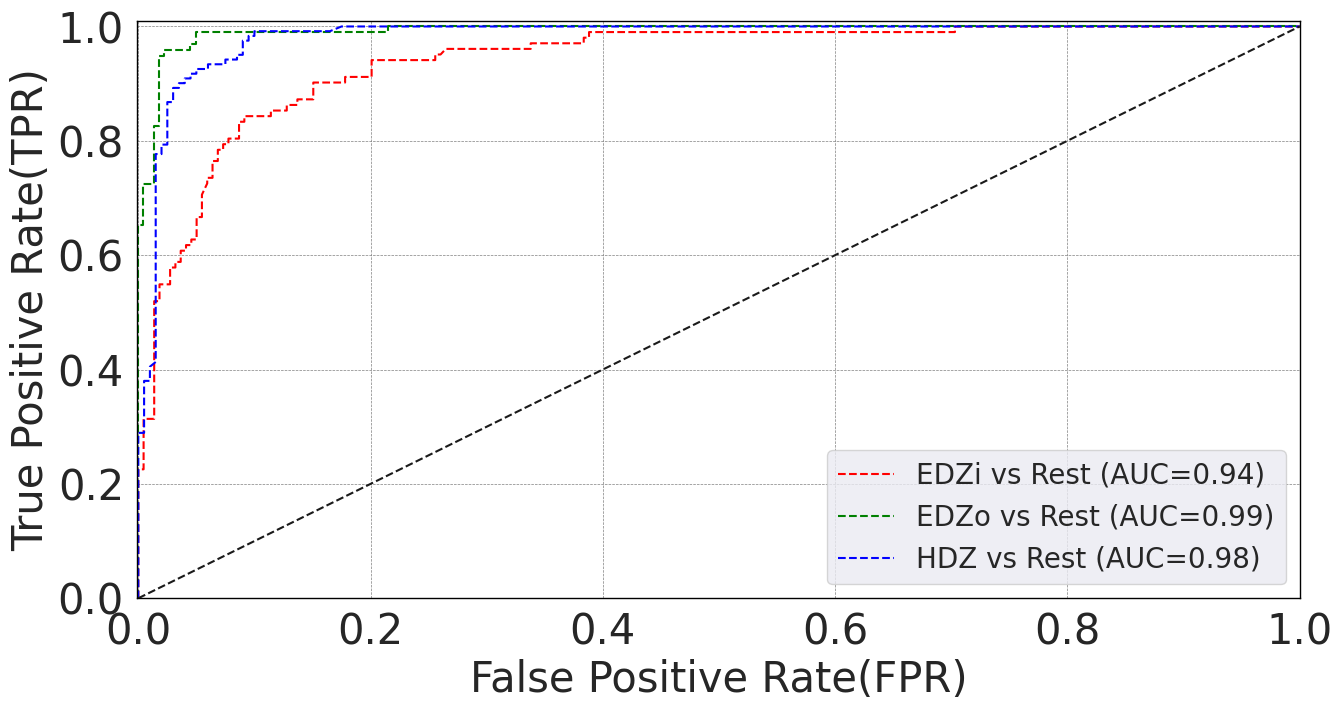

In [125]:
f, ax = plt.subplots(figsize=(15, 7.5))
ax.set_facecolor('w')

y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]
colors= ('red', 'green', 'blue')
for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], y_pred_prob_OVRC_Logistic[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    plt.plot(fpr[i], tpr[i], linestyle='--',
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]), color=colors[i])
# plt.grid(color= 'black', linestyle='dashed', linewidth=0.2)
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.001,1])
plt.ylim([0,1.01])
# plt.title('Multiclass ROC curve', size= 19)
plt.xlabel('False Positive Rate(FPR)', size = 30)
plt.ylabel('True Positive Rate(TPR)', size = 30)
plt.legend(loc='lower right', fontsize= 20)
ax.tick_params(axis='both', labelsize=30)
# Set the margin lines
ax.spines['left'].set_linewidth(1)    # Left margin line
ax.spines['bottom'].set_linewidth(1)  # Bottom margin line
ax.spines['right'].set_linewidth(1)   # Right margin line
ax.spines['top'].set_linewidth(1)     # Top margin line
# Set the border lines
ax.spines['left'].set_color('black')    # Left border line color
ax.spines['bottom'].set_color('black')  # Bottom border line color
ax.spines['right'].set_color('black')   # Right border line color
ax.spines['top'].set_color('black')     # Top border line color
# Set the grid
plt.grid(linewidth=0.5, linestyle='--', color='gray')
plt.show()

### **Decision Boundary**

In [126]:
xx, yy = np.mgrid[1:7:.01, 1:3.5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs1_logistic = model.predict_proba(grid)[:, 1].reshape(xx.shape)
probs2_logistic = model.predict_proba(grid)[:, 2].reshape(xx.shape)

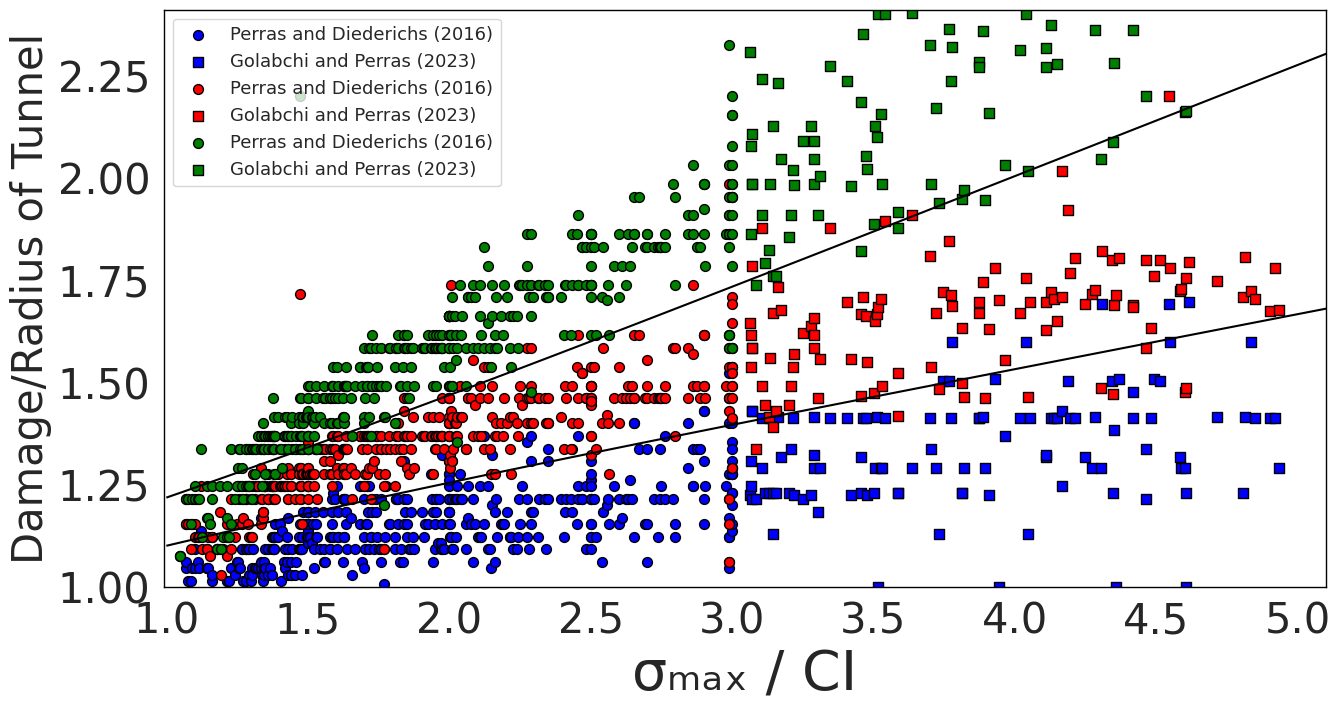

In [127]:
f, ax = plt.subplots(figsize=(15, 7.5))
ax.set_facecolor('w')
plt.contour(xx, yy, probs1_logistic, levels=[.5], cmap="Greys", vmin=0, vmax=.1, label = 'Decision boundary of HDZ and EDZi')
plt.contour(xx, yy, probs2_logistic, levels=[.5], cmap="Greys",vmin=0, vmax=.1, label = 'Decision boundary of EDZi and EDZo')
plt.scatter (x_HDZ_PerrasDiederichs, y_HDZ_PerrasDiederichs, s=50, color= 'blue', label = 'Perras and Diederichs (2016)', edgecolors='black')
plt.scatter (x_HDZ_GolabchiPerras, y_HDZ_GolabchiPerras, s=50, color = 'blue', label = 'Golabchi and Perras (2023)', edgecolors='black', marker='s')
plt.scatter (x_EDZi_PerrasDiederichs, y_EDZi_PerrasDiederichs, s=50, color= 'red', label = 'Perras and Diederichs (2016)', edgecolors='black')
plt.scatter (x_EDZi_GolabchiPerras, y_EDZi_GolabchiPerras, s=50, color = 'red', label = 'Golabchi and Perras (2023)', edgecolors='black', marker='s')
plt.scatter (x_EDZo_PerrasDiederichs, y_EDZo_PerrasDiederichs, s=50, color= 'green', label = 'Perras and Diederichs (2016)', edgecolors='black')
plt.scatter (x_EDZo_GolabchiPerras, y_EDZo_GolabchiPerras, s=50, color = 'green', label = 'Golabchi and Perras (2023)', edgecolors='black', marker='s')
plt.ylim(1, 2.41)
plt.xlim(0.99, 5.1)
plt.xlabel('\u03C3\u2098\u2090\u2093 / CI', size= 40)
plt.ylabel('Damage/Radius of Tunnel',size=30)
# plt.title('Logistic Regression\'s Decision Boundaries', size =10)
plt.legend(loc = 'upper left', fontsize='13', facecolor='w')

ax =plt.gca()
ax.tick_params(axis='both', labelsize=30)
ax.spines['left'].set_linewidth(1)    # Left margin line
ax.spines['bottom'].set_linewidth(1)  # Bottom margin line
ax.spines['right'].set_linewidth(1)   # Right margin line
ax.spines['top'].set_linewidth(1)     # Top margin line
# Set the border lines
ax.spines['left'].set_color('black')    # Left border line color
ax.spines['bottom'].set_color('black')  # Bottom border line color
ax.spines['right'].set_color('black')   # Right border line color
ax.spines['top'].set_color('black')     # Top border line color

## **2.2 KNN**

### **Parameter Tuning**

In [128]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN_GCV=KNeighborsClassifier()
params_KNN_GCV={'n_neighbors' : [1, 3, 5, 7, 9, 11, 13, 15, 17, 19 ],
                'weights' : ['uniform', 'distance'],
                'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                'p':[1,2]}
gridSearchCV=GridSearchCV(model_KNN_GCV, params_KNN_GCV,n_jobs=-1, cv= StratifiedKFold (n_splits = 5), scoring ='accuracy')
gridSearchCV.fit(x_train, y_train)
gridSearchCV.best_params_

{'algorithm': 'brute', 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}

### **Model Training**

In [129]:
knn_model=KNeighborsClassifier(n_neighbors=11, weights='uniform', algorithm='auto', p=1)
knn_model.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=11, p=1)

### **Confusion Matrix**

Text(20.75, 0.5, 'Expected')

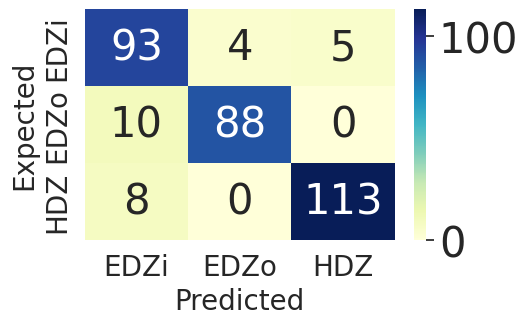

In [130]:
y_predicted_KNN=knn_model.predict(x_test)
confusion_matrix_KNN=confusion_matrix(y_test, y_predicted_KNN)
plt.figure (figsize = (5, 3))
heatmap = sns.heatmap(confusion_matrix_KNN, annot = True, fmt='g', xticklabels=('EDZi', 'EDZo', 'HDZ'),
            yticklabels=('EDZi', 'EDZo', 'HDZ'), cmap= 'YlGnBu', annot_kws={"size": 30})
colorbar = heatmap.collections[0].colorbar
colorbar.ax.tick_params(labelsize=30)
plt.xticks(fontsize=20, rotation='horizontal')
plt.yticks(fontsize=20)
plt.xlabel ('Predicted', size=20)
plt.ylabel ('Expected', size=20)

###**ROC Curve**

In [131]:
KNN_OVRC= OneVsRestClassifier(KNeighborsClassifier(n_neighbors=11, weights='uniform', algorithm='auto', p=1))
KNN_OVRC.fit(x_train, y_train)
y_pred_OVRC_KNN = KNN_OVRC.predict(x_test)
y_pred_prob_OVRC_KNN = KNN_OVRC.predict_proba(x_test)

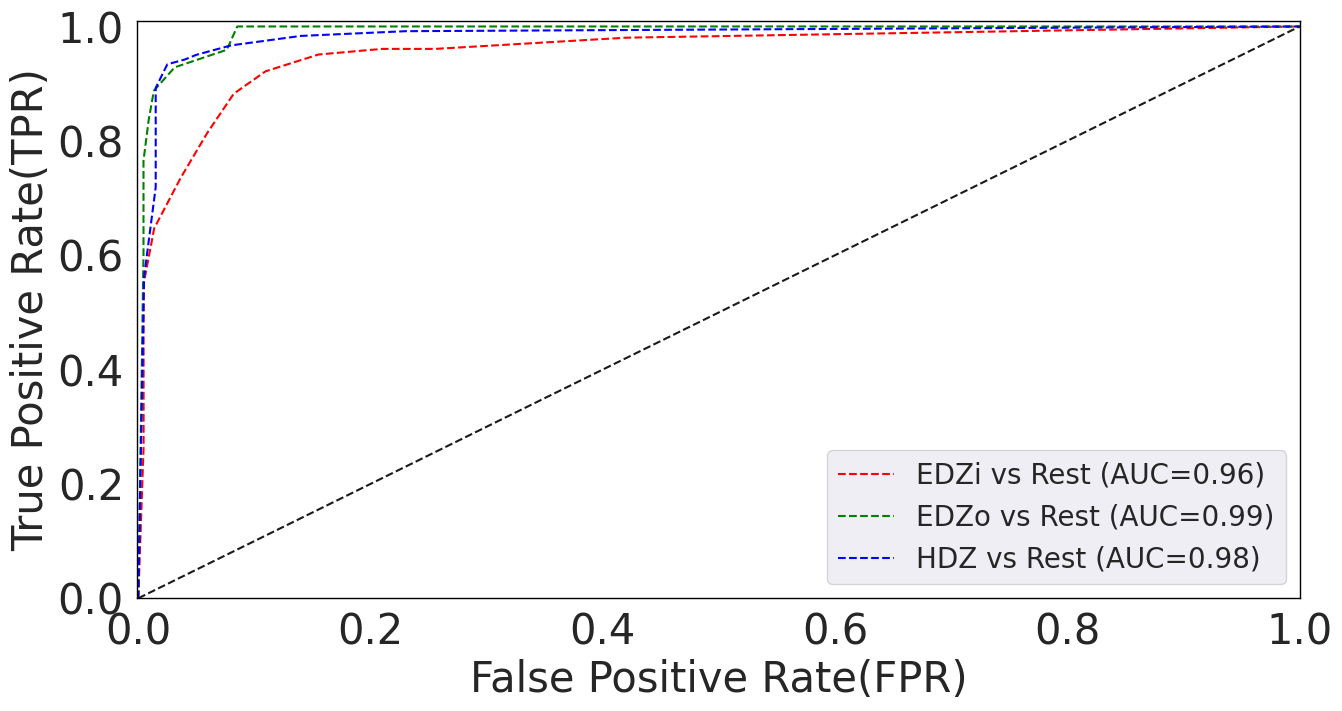

In [132]:
f, ax = plt.subplots(figsize=(15, 7.5))
ax.set_facecolor('w')

y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]
colors= ('red', 'green', 'blue')
for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], y_pred_prob_OVRC_KNN[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    plt.plot(fpr[i], tpr[i], linestyle='--',
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]), color=colors[i])

# plt.grid(color= 'black', linestyle='dashed', linewidth=0.2)
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.001,1])
plt.ylim([0,1.01])
# plt.title('Multiclass ROC curve', size= 19)
plt.xlabel('False Positive Rate(FPR)', size = 30)
plt.ylabel('True Positive Rate(TPR)', size = 30)
ax.tick_params(axis='both', labelsize=30)
ax.spines['left'].set_linewidth(1)    # Left margin line
ax.spines['bottom'].set_linewidth(1)  # Bottom margin line
ax.spines['right'].set_linewidth(1)   # Right margin line
ax.spines['top'].set_linewidth(1)     # Top margin line
# Set the border lines
ax.spines['left'].set_color('black')    # Left border line color
ax.spines['bottom'].set_color('black')  # Bottom border line color
ax.spines['right'].set_color('black')   # Right border line color
ax.spines['top'].set_color('black')     # Top border line color
plt.legend(loc='lower right', fontsize=20)
plt.show()

### **Decision Boundary**

In [133]:
xx, yy = np.mgrid[1:7:0.1, 1:3.5:0.1]
grid = np.c_[xx.ravel(), yy.ravel()]
probs1_KNN = knn_model.predict_proba(grid)[:, 1].reshape(xx.shape)
probs2_KNN = knn_model.predict_proba(grid)[:, 2].reshape(xx.shape)

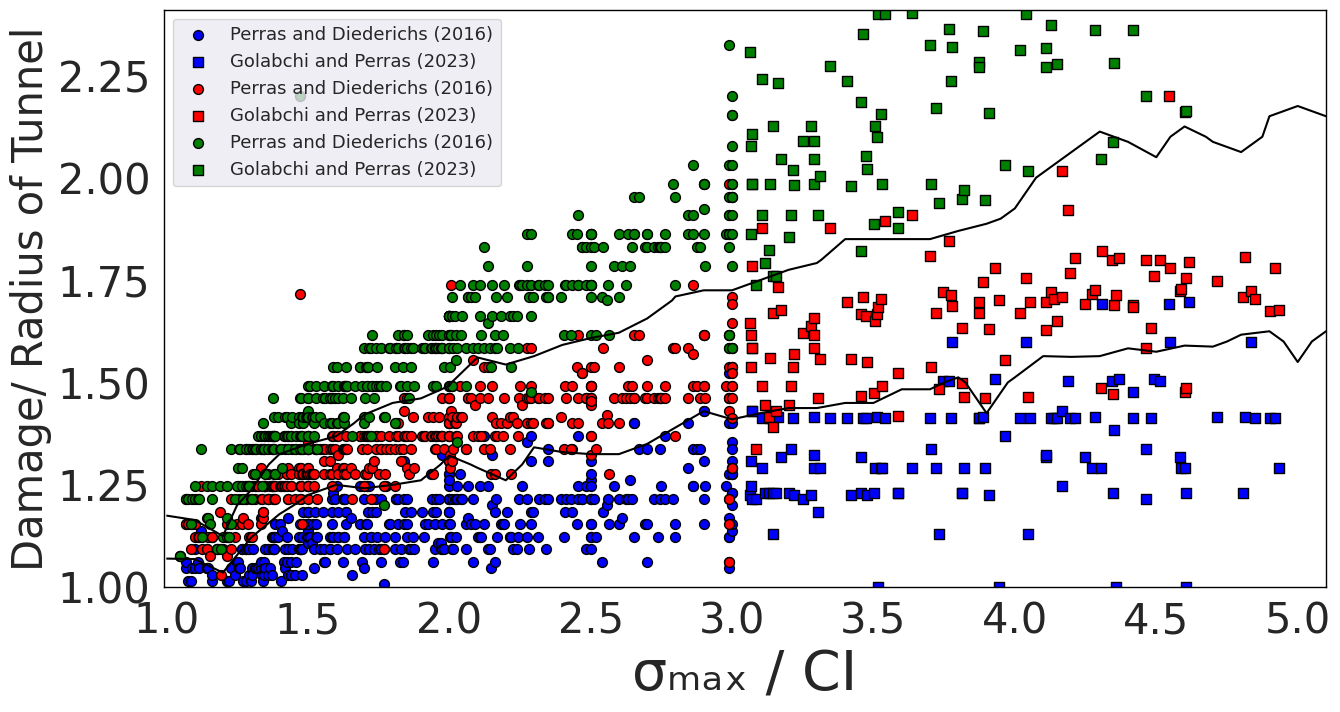

In [134]:
f, ax = plt.subplots(figsize=(15, 7.5))
ax.set_facecolor('w')
plt.contour(xx, yy, probs1_KNN, levels=[.5], cmap="Greys", vmin=0, vmax=.1, labels = 'Decision boundary of HDZ and EDZi')
plt.contour(xx, yy, probs2_KNN, levels=[.5], cmap="Greys",vmin=0, vmax=.1, labels = 'Decision boundary of EDZi and EDZo')
plt.scatter (x_HDZ_PerrasDiederichs, y_HDZ_PerrasDiederichs, s=50, color= 'blue', label = 'Perras and Diederichs (2016)', edgecolors='black')
plt.scatter (x_HDZ_GolabchiPerras, y_HDZ_GolabchiPerras, s=50, color = 'blue', label = 'Golabchi and Perras (2023)', edgecolors='black', marker='s')
plt.scatter (x_EDZi_PerrasDiederichs, y_EDZi_PerrasDiederichs, s=50, color= 'red', label = 'Perras and Diederichs (2016)', edgecolors='black')
plt.scatter (x_EDZi_GolabchiPerras, y_EDZi_GolabchiPerras, s=50, color = 'red', label = 'Golabchi and Perras (2023)', edgecolors='black', marker='s')
plt.scatter (x_EDZo_PerrasDiederichs, y_EDZo_PerrasDiederichs, s=50, color= 'green', label = 'Perras and Diederichs (2016)', edgecolors='black')
plt.scatter (x_EDZo_GolabchiPerras, y_EDZo_GolabchiPerras, s=50, color = 'green', label = 'Golabchi and Perras (2023)', edgecolors='black', marker='s')
plt.ylim(1, 2.41)
plt.xlim(0.99, 5.1)
plt.xlabel('\u03C3\u2098\u2090\u2093 / CI', size= 40)
plt.ylabel('Damage/ Radius of Tunnel',size=30)
# plt.title('KNN\'s Decision Boundaries', size =28)
plt.legend(loc = 'upper left', fontsize='13')
ax =plt.gca()
ax.tick_params(axis='both', labelsize=30)
ax.spines['left'].set_linewidth(1)    # Left margin line
ax.spines['bottom'].set_linewidth(1)  # Bottom margin line
ax.spines['right'].set_linewidth(1)   # Right margin line
ax.spines['top'].set_linewidth(1)     # Top margin line
# Set the border lines
ax.spines['left'].set_color('black')    # Left border line color
ax.spines['bottom'].set_color('black')  # Bottom border line color
ax.spines['right'].set_color('black')   # Right border line color
ax.spines['top'].set_color('black')     # Top border line color

## **2.3 SVM**

### **Parameter Tunning**

In [135]:
from sklearn import svm
'''
model_SVM_GCV=svm.SVC()
params_SVM_GCV={'C' : [0.1, 1, 10, 100],
                'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
                'degree' : [2, 3],
                'gamma' : ['scale', 'auto'],
                'decision_function_shape' : ['ovo', 'ovr'],
                'tol' : [1e-3, 1e-2, 1e-1]}
gridSearchCV_SVM=GridSearchCV(model_SVM_GCV, params_SVM_GCV,n_jobs=-1, cv= StratifiedKFold (n_splits = 5), scoring ='accuracy')
gridSearchCV_SVM.fit(x_train, y_train)
gridSearchCV_SVM.best_params_
'''
# Takes 2 minutes to run this cell the answers are:

# {'C': 1,
#  'decision_function_shape': 'ovo',
#  'degree': 2,
#  'gamma': 'scale',
#  'kernel': 'rbf',
#  'tol': 0.001}


"\nmodel_SVM_GCV=svm.SVC()\nparams_SVM_GCV={'C' : [0.1, 1, 10, 100],\n                'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],\n                'degree' : [2, 3],\n                'gamma' : ['scale', 'auto'],\n                'decision_function_shape' : ['ovo', 'ovr'],\n                'tol' : [1e-3, 1e-2, 1e-1]}\ngridSearchCV_SVM=GridSearchCV(model_SVM_GCV, params_SVM_GCV,n_jobs=-1, cv= StratifiedKFold (n_splits = 5), scoring ='accuracy')\ngridSearchCV_SVM.fit(x_train, y_train)\ngridSearchCV_SVM.best_params_\n"

### **Model Training**

In [136]:
SVM_model=SVC(C=100, kernel='rbf', degree=2, decision_function_shape='ovo', gamma = 'scale', tol=0.001, probability = True)
SVM_model.fit(x_train, y_train)

SVC(C=100, decision_function_shape='ovo', degree=2, probability=True)

### **Confusion Matrix**

Text(20.75, 0.5, 'Expected')

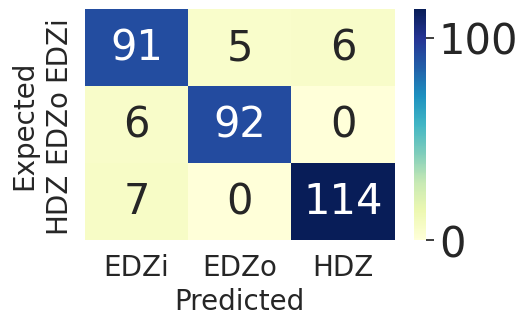

In [137]:

y_predicted_SVM = SVM_model.predict(x_test)
confusion_matrix_SVM=confusion_matrix(y_test, y_predicted_SVM)
plt.figure (figsize = (5, 3))
heatmap = sns.heatmap(confusion_matrix_SVM, annot = True, fmt='g', xticklabels=('EDZi', 'EDZo', 'HDZ'),
            yticklabels=('EDZi', 'EDZo', 'HDZ'), cmap= 'YlGnBu', annot_kws={"size": 30})
colorbar = heatmap.collections[0].colorbar
colorbar.ax.tick_params(labelsize=30)
plt.xticks(fontsize=20, rotation='horizontal')
plt.yticks(fontsize=20)
plt.xlabel ('Predicted', size=20)
plt.ylabel ('Expected', size=20)

###**ROC Curve**

In [138]:
SVM_OVRC= OneVsRestClassifier(svm.SVC(C=100, kernel='rbf', degree=2, decision_function_shape='ovo', gamma = 'scale', tol=0.001, probability = True))
SVM_OVRC.fit(x_train, y_train)
y_pred_OVRC_SVM = SVM_OVRC.predict(x_test)
y_pred_prob_OVRC_SVM = SVM_OVRC.predict_proba(x_test)

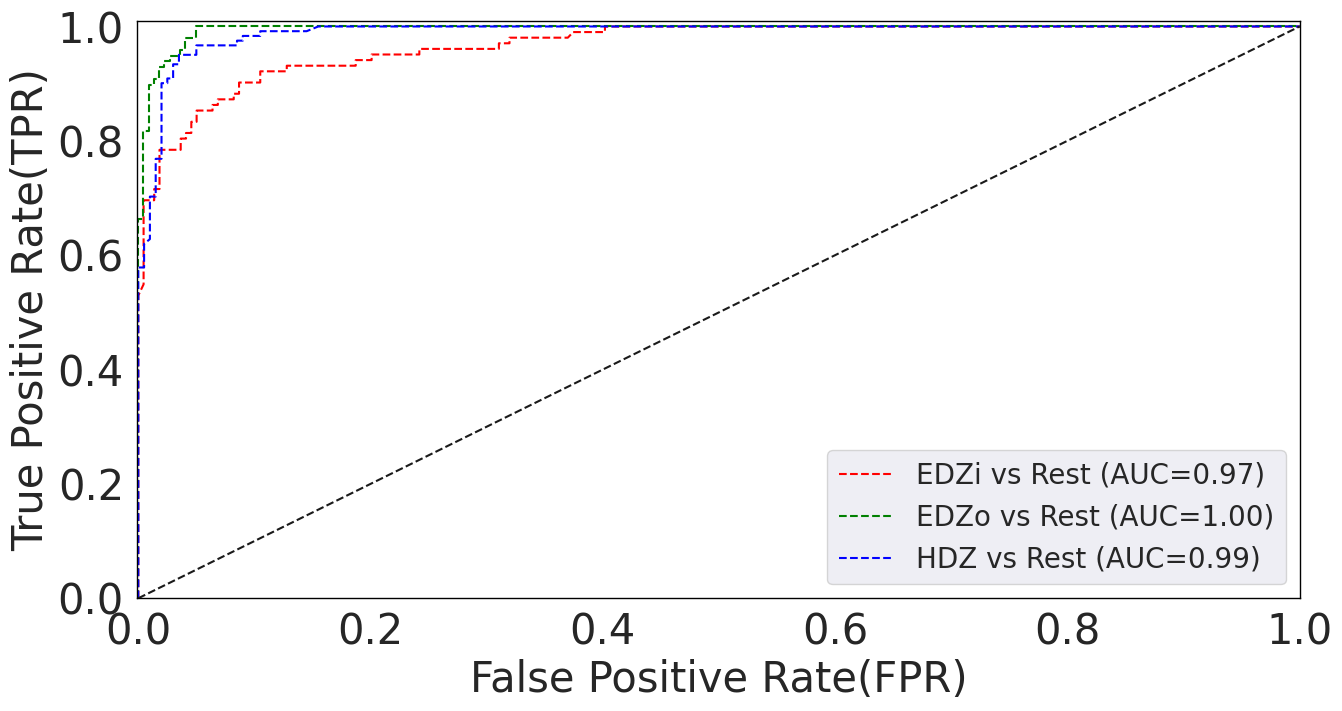

In [139]:
f, ax = plt.subplots(figsize=(15, 7.5))
ax.set_facecolor('w')

y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]
colors= ('red', 'green', 'blue')
for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], y_pred_prob_OVRC_SVM[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    plt.plot(fpr[i], tpr[i], linestyle='--',
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]), color=colors[i])

# plt.grid(color= 'black', linestyle='dashed', linewidth=0.2)
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.001,1])
plt.ylim([0,1.01])
# plt.title('Multiclass ROC curve', size= 19)
plt.xlabel('False Positive Rate(FPR)', size = 30)
plt.ylabel('True Positive Rate(TPR)', size = 30)
plt.legend(loc='lower right', fontsize = 20)
ax.tick_params(axis='both', labelsize=30)
ax.spines['left'].set_linewidth(1)    # Left margin line
ax.spines['bottom'].set_linewidth(1)  # Bottom margin line
ax.spines['right'].set_linewidth(1)   # Right margin line
ax.spines['top'].set_linewidth(1)     # Top margin line
# Set the border lines
ax.spines['left'].set_color('black')    # Left border line color
ax.spines['bottom'].set_color('black')  # Bottom border line color
ax.spines['right'].set_color('black')   # Right border line color
ax.spines['top'].set_color('black')     # Top border line color
plt.show()

In [140]:
roc_auc = dict()

### **Decision Boundary**

In [141]:
xx, yy = np.mgrid[0:6:.01, 0:3.5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs1_SVM = SVM_model.predict_proba(grid)[:, 1].reshape(xx.shape)
probs2_SVM = SVM_model.predict_proba(grid)[:, 2].reshape(xx.shape)

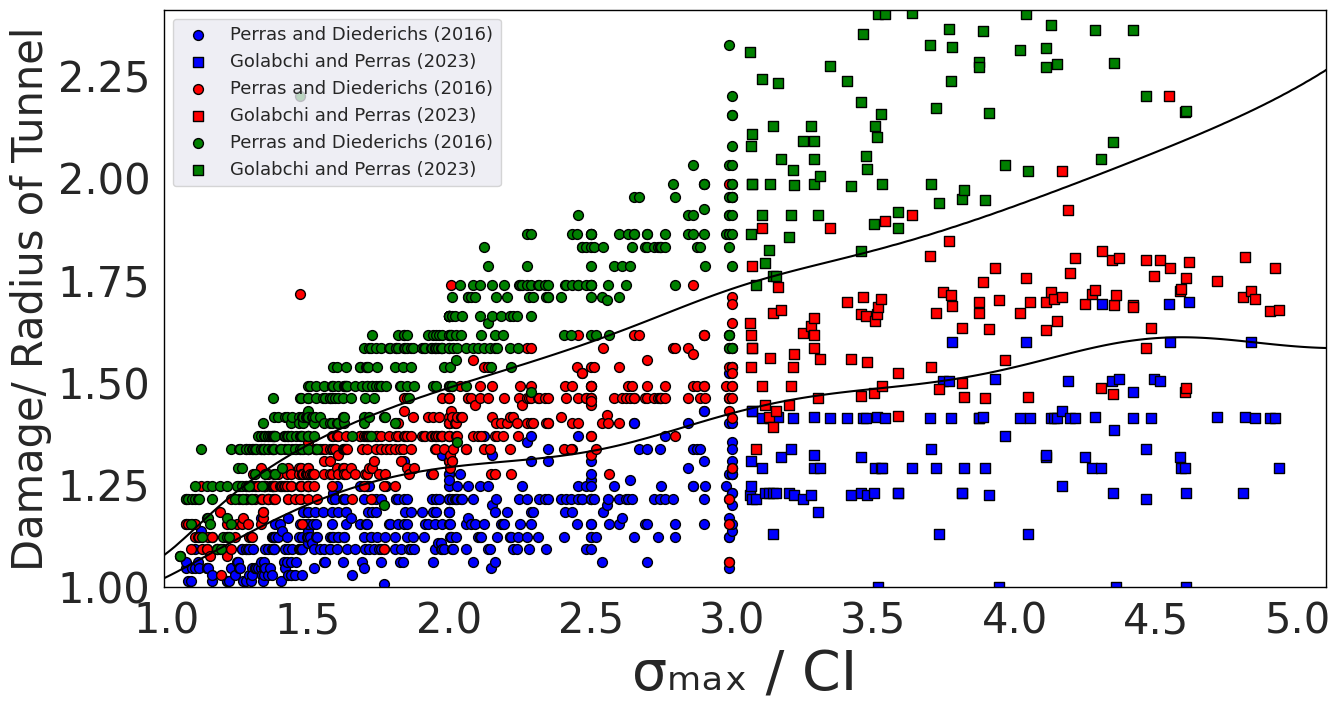

In [142]:
f, ax = plt.subplots(figsize=(15, 7.5))
ax.set_facecolor('w')
plt.contour(xx, yy, probs1_SVM, levels=[.5], cmap="Greys", vmin=0, vmax=.1, labels = 'Decision boundary of HDZ and EDZi')
plt.contour(xx, yy, probs2_SVM, levels=[.5], cmap="Greys",vmin=0, vmax=.1, labels = 'Decision boundary of EDZi and EDZo')
plt.scatter (x_HDZ_PerrasDiederichs, y_HDZ_PerrasDiederichs, s=50, color= 'blue', label = 'Perras and Diederichs (2016)', edgecolors='black')
plt.scatter (x_HDZ_GolabchiPerras, y_HDZ_GolabchiPerras, s=50, color = 'blue', label = 'Golabchi and Perras (2023)', edgecolors='black', marker='s')
plt.scatter (x_EDZi_PerrasDiederichs, y_EDZi_PerrasDiederichs, s=50, color= 'red', label = 'Perras and Diederichs (2016)', edgecolors='black')
plt.scatter (x_EDZi_GolabchiPerras, y_EDZi_GolabchiPerras, s=50, color = 'red', label = 'Golabchi and Perras (2023)', edgecolors='black', marker='s')
plt.scatter (x_EDZo_PerrasDiederichs, y_EDZo_PerrasDiederichs, s=50, color= 'green', label = 'Perras and Diederichs (2016)', edgecolors='black')
plt.scatter (x_EDZo_GolabchiPerras, y_EDZo_GolabchiPerras, s=50, color = 'green', label = 'Golabchi and Perras (2023)', edgecolors='black', marker='s')
plt.ylim(1, 2.41)
plt.xlim(0.99, 5.1)
plt.xlabel('\u03C3\u2098\u2090\u2093 / CI', size= 40)
plt.ylabel('Damage/ Radius of Tunnel',size=30)
# plt.title('KNN\'s Decision Boundaries', size =28)
plt.legend(loc = 'upper left', fontsize='13')
ax =plt.gca()
ax.tick_params(axis='both', labelsize=30)
ax.spines['left'].set_linewidth(1)    # Left margin line
ax.spines['bottom'].set_linewidth(1)  # Bottom margin line
ax.spines['right'].set_linewidth(1)   # Right margin line
ax.spines['top'].set_linewidth(1)     # Top margin line
# Set the border lines
ax.spines['left'].set_color('black')    # Left border line color
ax.spines['bottom'].set_color('black')  # Bottom border line color
ax.spines['right'].set_color('black')   # Right border line color
ax.spines['top'].set_color('black')     # Top border line color

## **2.4 MLP**

### **Parameter Tunning**

In [143]:
'''
layers=list()
for i in range(1,6):
  for j in range (1,6):
    k=(i,j)
    layers.append(k)
mlp_classification=MLPClassifier(random_state=7)

params_grid = {'hidden_layer_sizes': layers,
               'activation' : ['logistic', 'relu'],
               'alpha':[1e-4, 1e-3, 1e-2, 0.1],
               'solver': ['lbfgs', 'sgd', 'adam'],
               'learning_rate' : ['constant', 'adaptive']}
gridsearch_MLPClass=GridSearchCV(mlp_classification, params_grid, n_jobs=-1, cv=5, scoring ='accuracy')
MLP_model=gridsearch_MLPClass.fit(x_train, y_train)
MLP_model.best_params_
'''
# Takes 2 minutes to run this cell the answers are:
# {'activation': 'logistic',
#  'alpha': 0.1,
#  'hidden_layer_sizes': (3, 2),
#  'learning_rate': 'constant',
#  'solver': 'lbfgs'}

"\nlayers=list()\nfor i in range(1,6):\n  for j in range (1,6):\n    k=(i,j)\n    layers.append(k)\nmlp_classification=MLPClassifier(random_state=7)\n\nparams_grid = {'hidden_layer_sizes': layers,\n               'activation' : ['logistic', 'relu'],\n               'alpha':[1e-4, 1e-3, 1e-2, 0.1],\n               'solver': ['lbfgs', 'sgd', 'adam'],\n               'learning_rate' : ['constant', 'adaptive']}\ngridsearch_MLPClass=GridSearchCV(mlp_classification, params_grid, n_jobs=-1, cv=5, scoring ='accuracy')\nMLP_model=gridsearch_MLPClass.fit(x_train, y_train)\nMLP_model.best_params_\n"

### **Model Training**

In [144]:
mlp_classification=MLPClassifier(hidden_layer_sizes=(3, 2), activation='logistic', alpha=0.1, solver='lbfgs', learning_rate='constant', random_state=7)
MLP_model=mlp_classification.fit(x_train, y_train)

### **Confusion Matrix**

Text(20.75, 0.5, 'Expected')

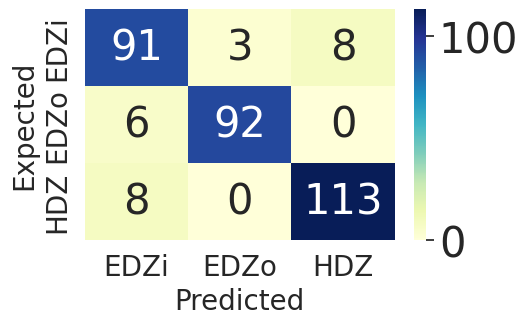

In [145]:
y_predicted_MLP= MLP_model.predict(x_test)
confusion_matrix_MLP=confusion_matrix(y_test, y_predicted_MLP)
plt.figure (figsize = (5, 3))
heatmap = sns.heatmap(confusion_matrix_MLP, annot = True, fmt='g', xticklabels=('EDZi', 'EDZo', 'HDZ'),
            yticklabels=('EDZi', 'EDZo', 'HDZ'), cmap= 'YlGnBu', annot_kws={"size": 30})
colorbar = heatmap.collections[0].colorbar
colorbar.ax.tick_params(labelsize=30)
plt.xticks(fontsize=20, rotation='horizontal')
plt.yticks(fontsize=20)
plt.xlabel ('Predicted', size=20)
plt.ylabel ('Expected', size=20)

###**ROC Curve**

In [146]:
MLP_OVRC= OneVsRestClassifier(MLPClassifier(hidden_layer_sizes=(4, 3), activation='logistic', alpha=0.1, solver='lbfgs', learning_rate='constant', random_state=7))
MLP_OVRC.fit(x_train, y_train)
y_pred_OVRC_MLP = MLP_OVRC.predict(x_test)
y_pred_prob_OVRC_MLP = MLP_OVRC.predict_proba(x_test)

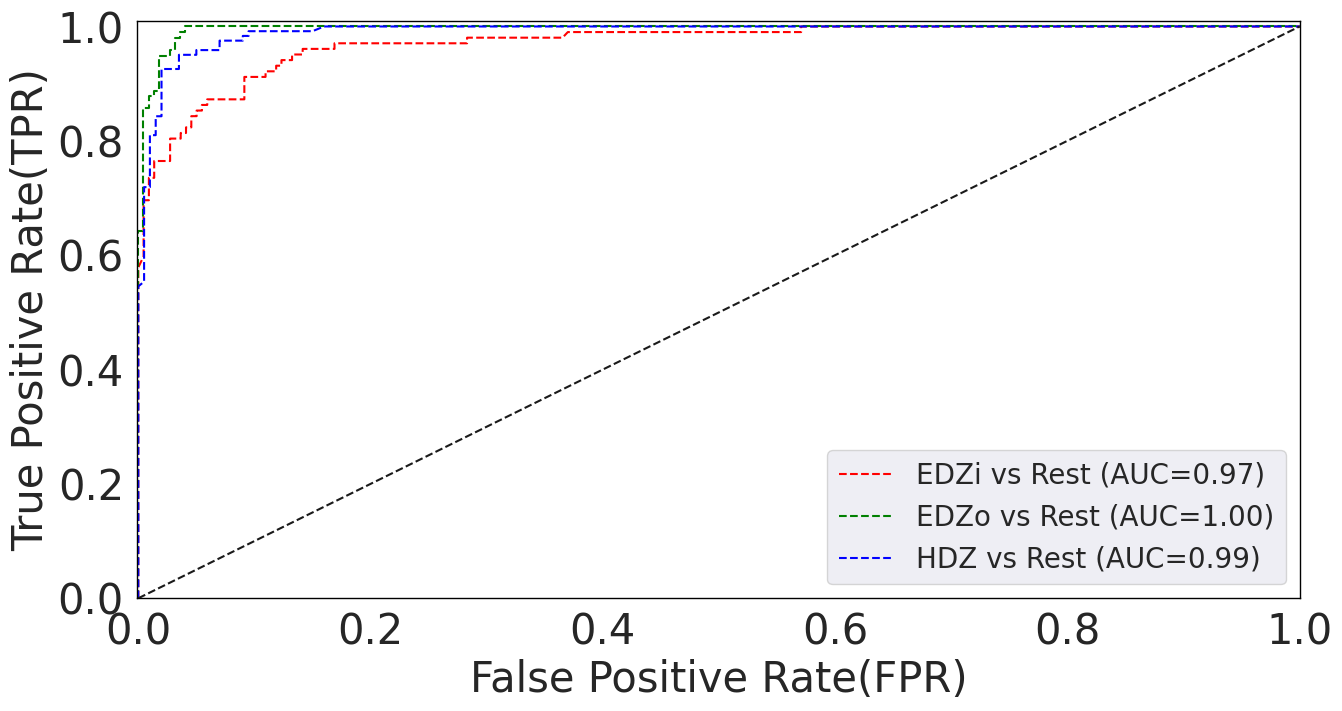

In [147]:
f, ax = plt.subplots(figsize=(15, 7.5))
ax.set_facecolor('w')

y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]
colors= ('red', 'green', 'blue')
for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], y_pred_prob_OVRC_MLP[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    plt.plot(fpr[i], tpr[i], linestyle='--',
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]), color=colors[i])

# plt.grid(color= 'black', linestyle='dashed', linewidth=0.2)
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.001,1])
plt.ylim([0,1.01])
# plt.title('Multiclass ROC curve', size= 19)
plt.xlabel('False Positive Rate(FPR)', size = 30)
plt.ylabel('True Positive Rate(TPR)', size = 30)
plt.legend(loc='lower right', fontsize=20)
ax.tick_params(axis='both', labelsize=30)
ax.spines['left'].set_linewidth(1)    # Left margin line
ax.spines['bottom'].set_linewidth(1)  # Bottom margin line
ax.spines['right'].set_linewidth(1)   # Right margin line
ax.spines['top'].set_linewidth(1)     # Top margin line
# Set the border lines
ax.spines['left'].set_color('black')    # Left border line color
ax.spines['bottom'].set_color('black')  # Bottom border line color
ax.spines['right'].set_color('black')   # Right border line color
ax.spines['top'].set_color('black')     # Top border line color

### **Decision Boundary**

In [148]:
xx, yy = np.mgrid[0:6:.01, 0:3.5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs1_MLP = MLP_model.predict_proba(grid)[:, 1].reshape(xx.shape)
probs2_MLP = MLP_model.predict_proba(grid)[:, 2].reshape(xx.shape)

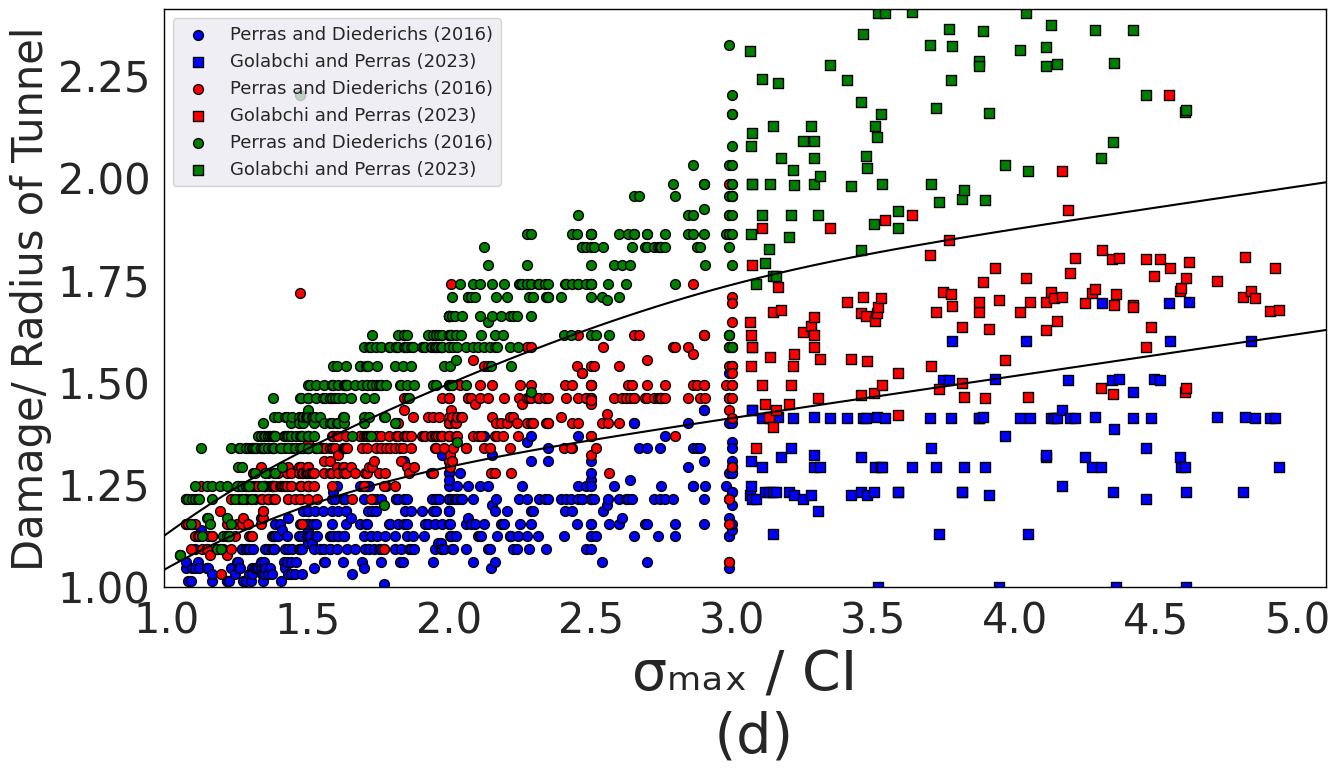

In [149]:
f, ax = plt.subplots(figsize=(15, 7.5))
ax.set_facecolor('w')
plt.contour(xx, yy, probs1_MLP, levels=[.5], cmap="Greys", vmin=0, vmax=.1, labels = 'Decision boundary of HDZ and EDZi')
plt.contour(xx, yy, probs2_MLP, levels=[.5], cmap="Greys",vmin=0, vmax=.1, labels = 'Decision boundary of EDZi and EDZo')
plt.scatter (x_HDZ_PerrasDiederichs, y_HDZ_PerrasDiederichs, s=50, color= 'blue', label = 'Perras and Diederichs (2016)', edgecolors='black')
plt.scatter (x_HDZ_GolabchiPerras, y_HDZ_GolabchiPerras, s=50, color = 'blue', label = 'Golabchi and Perras (2023)', edgecolors='black', marker='s')
plt.scatter (x_EDZi_PerrasDiederichs, y_EDZi_PerrasDiederichs, s=50, color= 'red', label = 'Perras and Diederichs (2016)', edgecolors='black')
plt.scatter (x_EDZi_GolabchiPerras, y_EDZi_GolabchiPerras, s=50, color = 'red', label = 'Golabchi and Perras (2023)', edgecolors='black', marker='s')
plt.scatter (x_EDZo_PerrasDiederichs, y_EDZo_PerrasDiederichs, s=50, color= 'green', label = 'Perras and Diederichs (2016)', edgecolors='black')
plt.scatter (x_EDZo_GolabchiPerras, y_EDZo_GolabchiPerras, s=50, color = 'green', label = 'Golabchi and Perras (2023)', edgecolors='black', marker='s')
plt.ylim(1, 2.41)
plt.xlim(0.99, 5.1)
plt.xlabel('\u03C3\u2098\u2090\u2093 / CI\n (d)', size= 40)
plt.ylabel('Damage/ Radius of Tunnel',size=30)
# plt.title('KNN\'s Decision Boundaries', size =28)
plt.legend(loc = 'upper left', fontsize='13')
ax =plt.gca()
ax.tick_params(axis='both', labelsize=30)
ax.spines['left'].set_linewidth(1)    # Left margin line
ax.spines['bottom'].set_linewidth(1)  # Bottom margin line
ax.spines['right'].set_linewidth(1)   # Right margin line
ax.spines['top'].set_linewidth(1)     # Top margin line
# Set the border lines
ax.spines['left'].set_color('black')    # Left border line color
ax.spines['bottom'].set_color('black')  # Bottom border line color
ax.spines['right'].set_color('black')   # Right border line color
ax.spines['top'].set_color('black')     # Top border line color

## **2.5 Evaluation Metrics**

In [150]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall)

In [151]:
#Logistic Regression
print('Logistic regression\n',classification_report(y_test, y_predicted_logistic, target_names = ['EDZi', 'EDZo', 'HDZ']))

#KNN
print('\n\nK Nearest Neighbor (KNN)\n',classification_report(y_test, knn_model.predict(x_test), target_names = ['EDZi', 'EDZo', 'HDZ']))

## SVM
print('\n\nSupport Vector Machine (SVM)\n',classification_report(y_test, SVM_model.predict(x_test), target_names = ['EDZi', 'EDZo', 'HDZ']))

#MLP
print('\n\nMulti-Layer Perceptron\n',classification_report(y_test, MLP_model.predict(x_test), target_names = ['EDZi', 'EDZo', 'HDZ']))

Logistic regression
               precision    recall  f1-score   support

        EDZi       0.83      0.84      0.84       102
        EDZo       0.95      0.94      0.94        98
         HDZ       0.91      0.91      0.91       121

    accuracy                           0.90       321
   macro avg       0.90      0.90      0.90       321
weighted avg       0.90      0.90      0.90       321



K Nearest Neighbor (KNN)
               precision    recall  f1-score   support

        EDZi       0.84      0.91      0.87       102
        EDZo       0.96      0.90      0.93        98
         HDZ       0.96      0.93      0.95       121

    accuracy                           0.92       321
   macro avg       0.92      0.91      0.92       321
weighted avg       0.92      0.92      0.92       321



Support Vector Machine (SVM)
               precision    recall  f1-score   support

        EDZi       0.88      0.89      0.88       102
        EDZo       0.95      0.94      0.94     

## **2.6 Combined ROC & Decision Boundaries of ML Algorithms**

### **ROC**

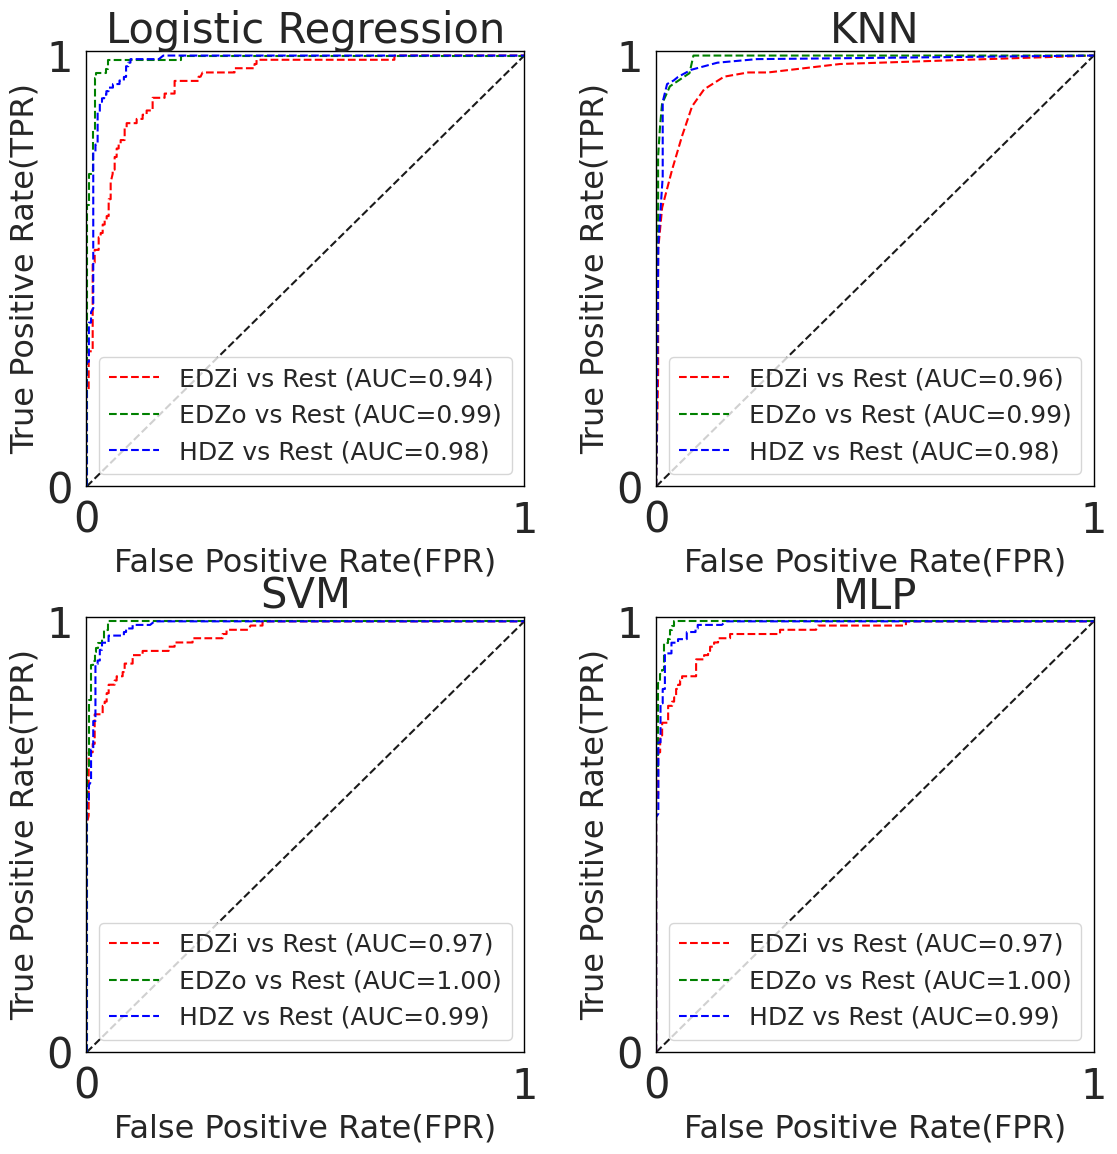

In [152]:
import matplotlib.pyplot as plt
import numpy as np

# Defining the common data preprocessing steps here
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_class = classes.shape[0]
colors = ('red', 'green', 'blue')

# Creating a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(13, 13))
fig.subplots_adjust(wspace=0.3, hspace=0.3)  # Adjust the spacing between subplots

# Plot 1
ax = axs[0, 0]
ax.set_facecolor('w')
ax.spines['left'].set_linewidth(1)

fpr = {}
tpr = {}
thresh = {}
roc_auc = dict()

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:, i], y_pred_prob_OVRC_Logistic[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

ax.plot([0, 1], [0, 1], 'k--')
for i in range(n_class):
    ax.plot(fpr[i], tpr[i], linestyle='--',
            label='%s vs Rest (AUC=%0.2f)' % (classes[i], roc_auc[i]), color=colors[i])

# Setting labels and legend for Plot 1
ax.set_xlim([-0.001, 1])
ax.set_ylim([0, 1.01])
ax.set_xlabel('False Positive Rate(FPR)', size=23)
ax.set_title('Logistic Regression', size=30)
ax.set_ylabel('True Positive Rate(TPR)', size=23)
ax.legend(loc='lower right', fontsize=18, facecolor='w')
ax.set_yticks((0,1))
ax.set_xticks((0,1))
ax.tick_params(axis='both', labelsize=30)
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')
# ax.grid(linewidth=0.5, linestyle='--', color='gray')

# Plot 2
ax = axs[0, 1]
ax.set_facecolor('w')
ax.spines['left'].set_linewidth(1)

fpr = {}
tpr = {}
thresh = {}
roc_auc = dict()

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:, i], y_pred_prob_OVRC_KNN[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

ax.plot([0, 1], [0, 1], 'k--')
for i in range(n_class):
    ax.plot(fpr[i], tpr[i], linestyle='--',
            label='%s vs Rest (AUC=%0.2f)' % (classes[i], roc_auc[i]), color=colors[i])

# Setting labels and legend for Plot 2
ax.set_xlim([-0.001, 1])
ax.set_ylim([0, 1.01])
ax.set_xlabel('False Positive Rate(FPR)', size=23)
ax.set_ylabel('True Positive Rate(TPR)', size=23)
ax.set_title('KNN', size=30)
ax.legend(loc='lower right', fontsize=18, facecolor='w')
ax.set_yticks((0,1))
ax.set_xticks((0,1))
ax.tick_params(axis='both', labelsize=30)
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')
# ax.grid(linewidth=0.5, linestyle='--', color='gray')

# Repeat the same structure for Plots 3 and 4...

# Plot 3
ax = axs[1, 0]
ax.set_facecolor('w')
ax.spines['left'].set_linewidth(1)

fpr = {}
tpr = {}
thresh = {}
roc_auc = dict()

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:, i], y_pred_prob_OVRC_SVM[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

ax.plot([0, 1], [0, 1], 'k--')
for i in range(n_class):
    ax.plot(fpr[i], tpr[i], linestyle='--',
            label='%s vs Rest (AUC=%0.2f)' % (classes[i], roc_auc[i]), color=colors[i])

# Set labels and legend for Plot 3
ax.set_xlim([-0.001, 1])
ax.set_ylim([0, 1.01])
ax.set_xlabel('False Positive Rate(FPR)', size=23)
ax.set_ylabel('True Positive Rate(TPR)', size=23)
ax.set_title('SVM', size=30)
ax.legend(loc='lower right', fontsize=18, facecolor='w')
ax.set_yticks((0,1))
ax.set_xticks((0,1))
ax.tick_params(axis='both', labelsize=30)
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')
# ax.grid(linewidth=0.5, linestyle='--', color='gray')

# Plot 4
ax = axs[1, 1]
ax.set_facecolor('w')
ax.spines['left'].set_linewidth(1)

fpr = {}
tpr = {}
thresh = {}
roc_auc = dict()

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:, i], y_pred_prob_OVRC_MLP[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

ax.plot([0, 1], [0, 1], 'k--')
for i in range(n_class):
    ax.plot(fpr[i], tpr[i], linestyle='--',
            label='%s vs Rest (AUC=%0.2f)' % (classes[i], roc_auc[i]), color=colors[i])

# Set labels and legend for Plot 4
ax.set_xlim([-0.001, 1])
ax.set_ylim([0, 1.01])
ax.set_xlabel('False Positive Rate(FPR)', size=23)
ax.set_ylabel('True Positive Rate(TPR)', size=23)
ax.legend(loc='lower right', fontsize=18, facecolor='w')
ax.set_yticks((0,1))
ax.set_xticks((0,1))
ax.set_title('MLP', size=30)
ax.tick_params(axis='both', labelsize=30)
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')
# ax.grid(linewidth=0.5, linestyle='--', color='gray')

# Show the plots
# plt.savefig("ROC Curves combined combined.png", format="png", dpi=600, bbox_inches = 'tight')

### **Decision Boundaries**

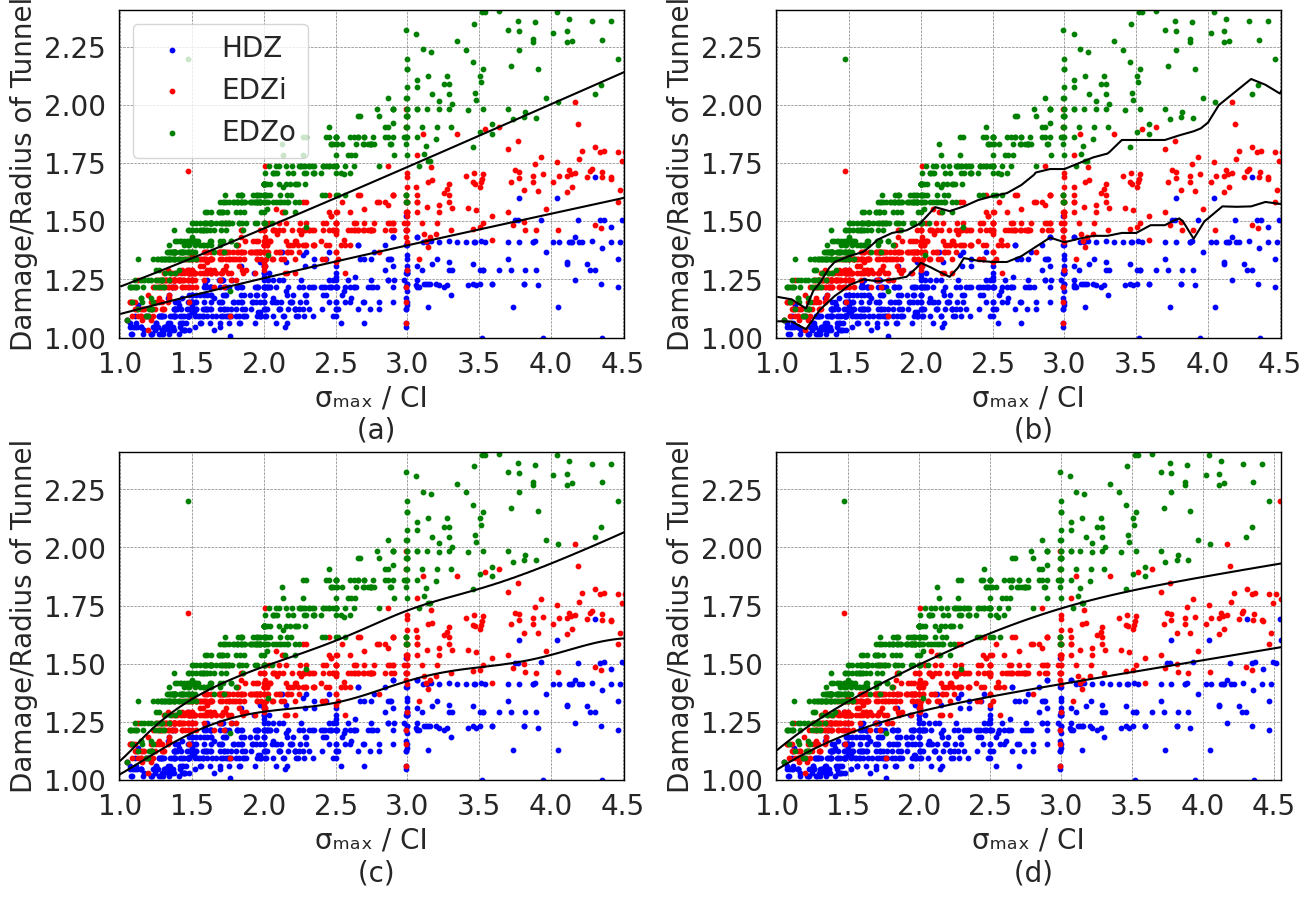

In [153]:
import numpy as np
import matplotlib.pyplot as plt

# Creating a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.subplots_adjust(wspace=0.3, hspace=0.35)  # Adjust the spacing between subplots

# Plot 1
ax = axs[0, 0]
ax.set_facecolor('w')
xx, yy = np.mgrid[1:7:.01, 1:3.5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs1_logistic = model.predict_proba(grid)[:, 1].reshape(xx.shape)
probs2_logistic = model.predict_proba(grid)[:, 2].reshape(xx.shape)

# Setting the data labels for Plot #1
ax.contour(xx, yy, probs1_logistic, levels=[.5], cmap="Greys", vmin=0, vmax=.1)
ax.contour(xx, yy, probs2_logistic, levels=[.5], cmap="Greys", vmin=0, vmax=.1)
ax.scatter(x_HDZ_PerrasDiederichs, y_HDZ_PerrasDiederichs, s=10, color='blue', label='HDZ')
ax.scatter(x_EDZi_PerrasDiederichs, y_EDZi_PerrasDiederichs, s=10, color='red', label='EDZi')
ax.scatter(x_EDZo_PerrasDiederichs, y_EDZo_PerrasDiederichs, s=10, color='green', label='EDZo')
ax.scatter(x_HDZ_GolabchiPerras, y_HDZ_GolabchiPerras, s=10, color='blue')
ax.scatter(x_EDZi_GolabchiPerras, y_EDZi_GolabchiPerras, s=10, color='red')
ax.scatter(x_EDZo_GolabchiPerras, y_EDZo_GolabchiPerras, s=10, color='green')
ax.set_ylim(1, 2.41)
ax.set_xlim(0.99,4.51)
ax.set_xlabel('\u03C3\u2098\u2090\u2093 / CI\n (a)', size=20)
ax.set_ylabel('Damage/Radius of Tunnel', size=20)
ax.legend(loc='upper left', fontsize='20', facecolor='w')
ax.tick_params(axis='both', labelsize=20)
ax.set_yticks(np.arange(1, 2.251, step=0.25))
ax.set_xticks(np.arange(1, 4.51, step=0.5))
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')
ax.grid(linewidth=0.5, linestyle='--', color='gray')



#Plot 2
ax = axs[0, 1]
ax.set_facecolor('w')
xx, yy = np.mgrid[1:7:0.1, 1:3.5:0.1]
grid = np.c_[xx.ravel(), yy.ravel()]
probs1_KNN = knn_model.predict_proba(grid)[:, 1].reshape(xx.shape)
probs2_KNN = knn_model.predict_proba(grid)[:, 2].reshape(xx.shape)


# Setting the data labels for Plot #2
ax.contour(xx, yy, probs1_KNN, levels=[.5], cmap="Greys", vmin=0, vmax=.1, labels = 'Decision boundary of HDZ and EDZi')
ax.contour(xx, yy, probs2_KNN, levels=[.5], cmap="Greys",vmin=0, vmax=.1, labels = 'Decision boundary of EDZi and EDZo')
ax.scatter (x_HDZ_PerrasDiederichs, y_HDZ_PerrasDiederichs, s=10, color= 'blue', label = 'Perras and Diederichs (2016)')
ax.scatter (x_HDZ_GolabchiPerras, y_HDZ_GolabchiPerras, s=10, color = 'blue', label = 'Golabchi and Perras (2023)')
ax.scatter (x_EDZi_PerrasDiederichs, y_EDZi_PerrasDiederichs, s=10, color= 'red', label = 'Perras and Diederichs (2016)')
ax.scatter (x_EDZi_GolabchiPerras, y_EDZi_GolabchiPerras, s=10, color = 'red', label = 'Golabchi and Perras (2023)')
ax.scatter (x_EDZo_PerrasDiederichs, y_EDZo_PerrasDiederichs, s=10, color= 'green', label = 'Perras and Diederichs (2016)')
ax.scatter (x_EDZo_GolabchiPerras, y_EDZo_GolabchiPerras, s=10, color = 'green', label = 'Golabchi and Perras (2023)')
ax.set_ylim(1, 2.41)
ax.set_xlim(0.99, 4.51)
ax.set_xlabel('\u03C3\u2098\u2090\u2093 / CI\n (b)', size= 20)
ax.set_ylabel('Damage/Radius of Tunnel',size=20)
# ax.legend(loc = 'upper left', fontsize='13')
ax.tick_params(axis='both', labelsize=20)
ax.set_yticks(np.arange(1, 2.251, step=0.25))
ax.set_xticks(np.arange(1, 4.51, step=0.5))
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')
ax.grid(linewidth=0.5, linestyle='--', color='gray')



# Plot 3
ax = axs[1, 0]
ax.set_facecolor('w')
xx, yy = np.mgrid[0:6:.01, 0:3.5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs1_SVM = SVM_model.predict_proba(grid)[:, 1].reshape(xx.shape)
probs2_SVM = SVM_model.predict_proba(grid)[:, 2].reshape(xx.shape)


# Setting the data labels for Plot #3
ax.contour(xx, yy, probs1_SVM, levels=[.5], cmap="Greys", vmin=0, vmax=.1, labels = 'Decision boundary of HDZ and EDZi')
ax.contour(xx, yy, probs2_SVM, levels=[.5], cmap="Greys",vmin=0, vmax=.1, labels = 'Decision boundary of EDZi and EDZo')
ax.scatter (x_HDZ_PerrasDiederichs, y_HDZ_PerrasDiederichs, s=10, color= 'blue', label = 'Perras and Diederichs (2016)')
ax.scatter (x_HDZ_GolabchiPerras, y_HDZ_GolabchiPerras, s=10, color = 'blue', label = 'Golabchi and Perras (2023)')
ax.scatter (x_EDZi_PerrasDiederichs, y_EDZi_PerrasDiederichs, s=10, color= 'red', label = 'Perras and Diederichs (2016)')
ax.scatter (x_EDZi_GolabchiPerras, y_EDZi_GolabchiPerras, s=10, color = 'red', label = 'Golabchi and Perras (2023)')
ax.scatter (x_EDZo_PerrasDiederichs, y_EDZo_PerrasDiederichs, s=10, color= 'green', label = 'Perras and Diederichs (2016)')
ax.scatter (x_EDZo_GolabchiPerras, y_EDZo_GolabchiPerras, s=10, color = 'green', label = 'Golabchi and Perras (2023)')
ax.set_ylim(1, 2.41)
ax.set_xlim(0.99, 4.51)
ax.set_xlabel('\u03C3\u2098\u2090\u2093 / CI\n (c)', size= 20)
ax.set_ylabel('Damage/Radius of Tunnel',size=20)
# ax.legend(loc = 'upper left', fontsize='13')
ax.tick_params(axis='both', labelsize=20)
ax.set_yticks(np.arange(1, 2.251, step=0.25))
ax.set_xticks(np.arange(1, 4.51, step=0.5))
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')
ax.grid(linewidth=0.5, linestyle='--', color='gray')


# Plot 4
ax = axs[1, 1]
ax.set_facecolor('w')
xx, yy = np.mgrid[0:6:.01, 0:3.5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs1_MLP = MLP_model.predict_proba(grid)[:, 1].reshape(xx.shape)
probs2_MLP = MLP_model.predict_proba(grid)[:, 2].reshape(xx.shape)

# Setting the data labels for Plot #4
# f, ax = plt.subplots(figsize=(15, 7.5))
ax.set_facecolor('w')
ax.contour(xx, yy, probs1_MLP, levels=[.5], cmap="Greys", vmin=0, vmax=.1, labels = 'Decision boundary of HDZ and EDZi')
ax.contour(xx, yy, probs2_MLP, levels=[.5], cmap="Greys",vmin=0, vmax=.1, labels = 'Decision boundary of EDZi and EDZo')
ax.scatter (x_HDZ_PerrasDiederichs, y_HDZ_PerrasDiederichs, s=10, color= 'blue', label = 'Perras and Diederichs (2016)')
ax.scatter (x_HDZ_GolabchiPerras, y_HDZ_GolabchiPerras, s=10, color = 'blue', label = 'Golabchi and Perras (2023)')
ax.scatter (x_EDZi_PerrasDiederichs, y_EDZi_PerrasDiederichs, s=10, color= 'red', label = 'Perras and Diederichs (2016)')
ax.scatter (x_EDZi_GolabchiPerras, y_EDZi_GolabchiPerras, s=10, color = 'red', label = 'Golabchi and Perras (2023)')
ax.scatter (x_EDZo_PerrasDiederichs, y_EDZo_PerrasDiederichs, s=10, color= 'green', label = 'Perras and Diederichs (2016)')
ax.scatter (x_EDZo_GolabchiPerras, y_EDZo_GolabchiPerras, s=10, color = 'green', label = 'Golabchi and Perras (2023)')
ax.set_ylim(1, 2.41)
ax.set_xlim(0.99, 4.55)
ax.set_xlabel('\u03C3\u2098\u2090\u2093 / CI\n (d)', size= 20)
ax.set_ylabel('Damage/Radius of Tunnel',size=20)
# plt.title('KNN\'s Decision Boundaries', size =28)
# plt.legend(loc = 'upper left', fontsize='13')
ax.tick_params(axis='both', labelsize=20)
ax.set_yticks(np.arange(1, 2.251, step=0.25))
ax.set_xticks(np.arange(1, 4.51, step=0.5))
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')
ax.grid(linewidth=0.5, linestyle='--', color='gray')





# Finally, display the plots
# plt.show()
# plt.savefig("Boundary Decisions combined.png", format="png", dpi=600, bbox_inches = 'tight')

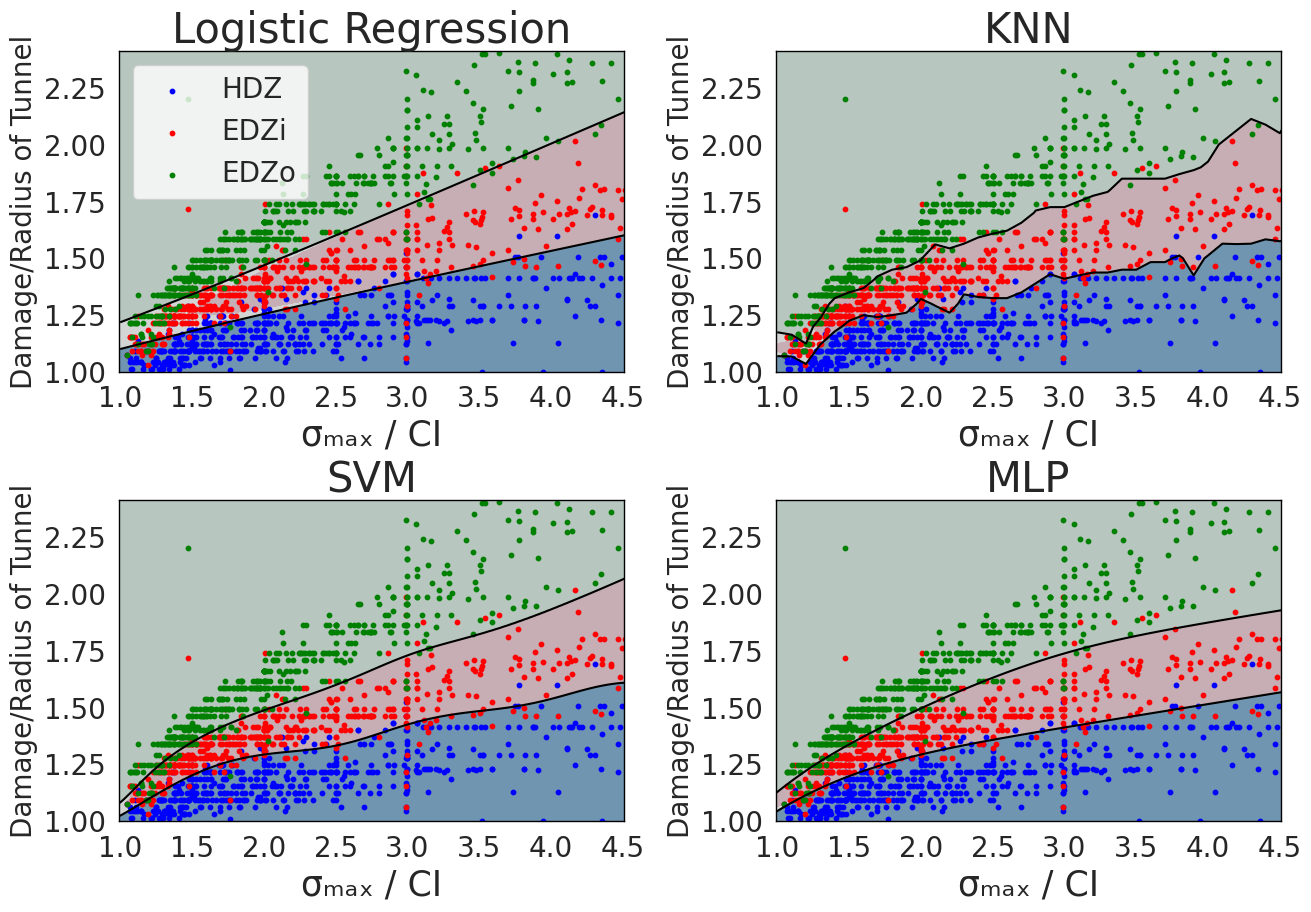

In [154]:

# Creating a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.subplots_adjust(wspace=0.3, hspace=0.4)  # Adjust the spacing between subplots

# Plot 1
ax = axs[0, 0]
ax.set_facecolor('w')
xx, yy = np.mgrid[1:7:.01, 1:3.5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs1_logistic = model.predict_proba(grid)[:, 1].reshape(xx.shape)
probs2_logistic = model.predict_proba(grid)[:, 2].reshape(xx.shape)
probs_logistic=  model.predict_proba(grid)
probs_logistic = probs_logistic.reshape(xx.shape + (-1,))

# Fill the region between decision boundaries with slight colors
ax.contourf(xx, yy, probs_logistic[:, :, 0], levels=[0.0, 0.5, 1.0], cmap="Reds", alpha=1, label='Decision boundary of HDZ and EDZi')
ax.contourf(xx, yy, probs_logistic[:, :, 1], levels=[0.0, 0.5, 1.0], cmap="Greens", alpha=0.4, label='Decision boundary of EDZi and EDZo')
ax.contourf(xx, yy, probs_logistic[:, :, 2], levels=[0.0, 0.5, 1.0], cmap="Blues", alpha=0.6, label='Decision boundary of EDZo and another class')

# The Decision Boundary Lines
ax.contour(xx, yy, probs1_logistic, levels=[.5], cmap="Greys", vmin=0, vmax=.1, labels = 'Decision boundary of HDZ and EDZi')
ax.contour(xx, yy, probs2_logistic, levels=[.5], cmap="Greys",vmin=0, vmax=.1, labels = 'Decision boundary of EDZi and EDZo')

# Setting the data labels for Plot #1
# ax.contour(xx, yy, probs1_logistic, levels=[.5], cmap="Greys", vmin=0, vmax=.1)
# ax.contour(xx, yy, probs2_logistic, levels=[.5], cmap="Greys", vmin=0, vmax=.1)
ax.scatter(x_HDZ_PerrasDiederichs, y_HDZ_PerrasDiederichs, s=10, color='blue', label='HDZ')
ax.scatter(x_EDZi_PerrasDiederichs, y_EDZi_PerrasDiederichs, s=10, color='red', label='EDZi')
ax.scatter(x_EDZo_PerrasDiederichs, y_EDZo_PerrasDiederichs, s=10, color='green', label='EDZo')
ax.scatter(x_HDZ_GolabchiPerras, y_HDZ_GolabchiPerras, s=10, color='blue')
ax.scatter(x_EDZi_GolabchiPerras, y_EDZi_GolabchiPerras, s=10, color='red')
ax.scatter(x_EDZo_GolabchiPerras, y_EDZo_GolabchiPerras, s=10, color='green')
# ax.set_ylim(1, 2.41)
# ax.set_xlim(0.99, 4.51)
# ax.set_xlabel('\u03C3\u2098\u2090\u2093 / CI\n (a)', size=20)
# ax.set_ylabel('Damage/Radius of Tunnel', size=20)
# ax.legend(loc='upper left', fontsize='13', facecolor='w')
# ax.tick_params(axis='both', labelsize=20)
# ax.set_xticks(np.arange(1, 2.251, step=0.25))  # Set custom x-axis ticks using np.arange
ax.set_ylim(1, 2.41)
ax.set_xlim(0.99,4.51)
ax.set_xlabel('\u03C3\u2098\u2090\u2093 / CI', size=25)
ax.set_ylabel('Damage/Radius of Tunnel', size=20)
ax.set_title('Logistic Regression', size=30)
ax.legend(loc='upper left', fontsize='20', facecolor='w')
ax.tick_params(axis='both', labelsize=20)
ax.set_yticks(np.arange(1, 2.251, step=0.25))
ax.set_xticks(np.arange(1, 4.51, step=0.5))
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')

# Plot 2
ax = axs[0, 1]
ax.set_facecolor('w')
xx, yy = np.mgrid[1:7:0.1, 1:3.5:0.1]
grid = np.c_[xx.ravel(), yy.ravel()]
probs1_KNN = knn_model.predict_proba(grid)[:, 1].reshape(xx.shape)
probs2_KNN = knn_model.predict_proba(grid)[:, 2].reshape(xx.shape)


probs_KNN=  knn_model.predict_proba(grid)
probs_KNN = probs_KNN.reshape(xx.shape + (-1,))
# Fill the region between decision boundaries with slight colors
ax.contourf(xx, yy, probs_KNN[:, :, 0], levels=[0.0, 0.5, 1.0], cmap="Reds", alpha=1, label='Decision boundary of HDZ and EDZi')
ax.contourf(xx, yy, probs_KNN[:, :, 1], levels=[0.0, 0.5, 1.0], cmap="Greens", alpha=0.4, label='Decision boundary of EDZi and EDZo')
ax.contourf(xx, yy, probs_KNN[:, :, 2], levels=[0.0, 0.5, 1.0], cmap="Blues", alpha=0.6, label='Decision boundary of EDZo and another class')

# The Decision Boundary Lines
ax.contour(xx, yy, probs1_KNN, levels=[.5], cmap="Greys", vmin=0, vmax=.1, labels = 'Decision boundary of HDZ and EDZi')
ax.contour(xx, yy, probs2_KNN, levels=[.5], cmap="Greys",vmin=0, vmax=.1, labels = 'Decision boundary of EDZi and EDZo')


# Setting the data labels for Plot #2
# ax.contour(xx, yy, probs1_KNN, levels=[.5], cmap="Greys", vmin=0, vmax=.1)
# ax.contour(xx, yy, probs2_KNN, levels=[.5], cmap="Greys", vmin=0, vmax=.1)
ax.scatter(x_HDZ_PerrasDiederichs, y_HDZ_PerrasDiederichs, s=10, color='blue', label='Perras and Diederichs (2016)')
ax.scatter(x_HDZ_GolabchiPerras, y_HDZ_GolabchiPerras, s=10, color='blue', label='Golabchi and Perras (2023)')
ax.scatter(x_EDZi_PerrasDiederichs, y_EDZi_PerrasDiederichs, s=10, color='red', label='Perras and Diederichs (2016)')
ax.scatter(x_EDZi_GolabchiPerras, y_EDZi_GolabchiPerras, s=10, color='red', label='Golabchi and Perras (2023)')
ax.scatter(x_EDZo_PerrasDiederichs, y_EDZo_PerrasDiederichs, s=10, color='green', label='Perras and Diederichs (2016)')
ax.scatter(x_EDZo_GolabchiPerras, y_EDZo_GolabchiPerras, s=10, color='green', label='Golabchi and Perras (2023)')
# ax.set_ylim(1, 2.41)
# ax.set_xlim(0.99, 4.51)
# ax.set_xlabel('\u03C3\u2098\u2090\u2093 / CI\n (b)', size=20)
# ax.set_ylabel('Damage/Radius of Tunnel', size=20)
# ax.tick_params(axis='both', labelsize=20)
# ax.set_xticks(np.arange(1, 2.251, step=0.25))  # Set custom x-axis ticks using np.arange
ax.set_ylim(1, 2.41)
ax.set_xlim(0.99,4.51)
ax.set_xlabel('\u03C3\u2098\u2090\u2093 / CI', size=25)
ax.set_ylabel('Damage/Radius of Tunnel', size=20)
ax.set_title('KNN', size=30)
# ax.legend(loc='upper left', fontsize='20', facecolor='w')
ax.tick_params(axis='both', labelsize=20)
ax.set_yticks(np.arange(1, 2.251, step=0.25))
ax.set_xticks(np.arange(1, 4.51, step=0.5))
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')


# Plot 3
ax = axs[1, 0]
ax.set_facecolor('w')
xx, yy = np.mgrid[0:6:.01, 0:3.5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs1_SVM = SVM_model.predict_proba(grid)[:, 1].reshape(xx.shape)
probs2_SVM = SVM_model.predict_proba(grid)[:, 2].reshape(xx.shape)



probs_SVM =  SVM_model.predict_proba(grid)
probs_SVM = probs_SVM.reshape(xx.shape + (-1,))
# Fill the region between decision boundaries with slight colors
ax.contourf(xx, yy, probs_SVM[:, :, 0], levels=[0.0, 0.5, 1.0], cmap="Reds", alpha=1, label='Decision boundary of HDZ and EDZi')
ax.contourf(xx, yy, probs_SVM[:, :, 1], levels=[0.0, 0.5, 1.0], cmap="Greens", alpha=0.4, label='Decision boundary of EDZi and EDZo')
ax.contourf(xx, yy, probs_SVM[:, :, 2], levels=[0.0, 0.5, 1.0], cmap="Blues", alpha=0.6, label='Decision boundary of EDZo and another class')

# The Decision Boundary Lines
ax.contour(xx, yy, probs1_SVM, levels=[.5], cmap="Greys", vmin=0, vmax=.1, labels = 'Decision boundary of HDZ and EDZi')
ax.contour(xx, yy, probs2_SVM, levels=[.5], cmap="Greys",vmin=0, vmax=.1, labels = 'Decision boundary of EDZi and EDZo')

# Setting the data labels for Plot #3
# ax.contour(xx, yy, probs1_SVM, levels=[.5], cmap="Greys", vmin=0, vmax=.1)
# ax.contour(xx, yy, probs2_SVM, levels=[.5], cmap="Greys", vmin=0, vmax=.1)
ax.scatter(x_HDZ_PerrasDiederichs, y_HDZ_PerrasDiederichs, s=10, color='blue', label='Perras and Diederichs (2016)')
ax.scatter(x_HDZ_GolabchiPerras, y_HDZ_GolabchiPerras, s=10, color='blue', label='Golabchi and Perras (2023)')
ax.scatter(x_EDZi_PerrasDiederichs, y_EDZi_PerrasDiederichs, s=10, color='red', label='Perras and Diederichs (2016)')
ax.scatter(x_EDZi_GolabchiPerras, y_EDZi_GolabchiPerras, s=10, color='red', label='Golabchi and Perras (2023)')
ax.scatter(x_EDZo_PerrasDiederichs, y_EDZo_PerrasDiederichs, s=10, color='green', label='Perras and Diederichs (2016)')
ax.scatter(x_EDZo_GolabchiPerras, y_EDZo_GolabchiPerras, s=10, color='green', label='Golabchi and Perras (2023)')
# ax.set_ylim(1, 2.41)
# ax.set_xlim(0.99, 4.51)
# ax.set_xlabel('\u03C3\u2098\u2090\u2093 / CI\n (c)', size=20)
# ax.set_ylabel('Damage/Radius of Tunnel', size=20)
# ax.tick_params(axis='both', labelsize=20)
# ax.set_xticks(np.arange(1, 2.251, step=0.25))  # Set custom x-axis ticks using np.arange
ax.set_ylim(1, 2.41)
ax.set_xlim(0.99,4.51)
ax.set_xlabel('\u03C3\u2098\u2090\u2093 / CI', size=25)
ax.set_title('SVM', size=30)
ax.set_ylabel('Damage/Radius of Tunnel', size=20)
# ax.legend(loc='upper left', fontsize='20', facecolor='w')
ax.tick_params(axis='both', labelsize=20)
ax.set_yticks(np.arange(1, 2.251, step=0.25))
ax.set_xticks(np.arange(1, 4.51, step=0.5))
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')




# Plot 4
ax = axs[1, 1]
ax.set_facecolor('w')
xx, yy = np.mgrid[0:6:.01, 0:3.5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs1_MLP = MLP_model.predict_proba(grid)[:, 1].reshape(xx.shape)
probs2_MLP = MLP_model.predict_proba(grid)[:, 2].reshape(xx.shape)

probs_MLP =  MLP_model.predict_proba(grid)
probs_MLP = probs_MLP.reshape(xx.shape + (-1,))
# Fill the region between decision boundaries with slight colors
ax.contourf(xx, yy, probs_MLP[:, :, 0], levels=[0.0, 0.5, 1.0], cmap="Reds", alpha=1, label='Decision boundary of HDZ and EDZi')
ax.contourf(xx, yy, probs_MLP[:, :, 1], levels=[0.0, 0.5, 1.0], cmap="Greens", alpha=0.4, label='Decision boundary of EDZi and EDZo')
ax.contourf(xx, yy, probs_MLP[:, :, 2], levels=[0.0, 0.5, 1.0], cmap="Blues", alpha=0.6, label='Decision boundary of EDZo and another class')

# The Decision Boundary Lines
ax.contour(xx, yy, probs1_MLP, levels=[.5], cmap="Greys", vmin=0, vmax=.1, labels = 'Decision boundary of HDZ and EDZi')
ax.contour(xx, yy, probs2_MLP, levels=[.5], cmap="Greys",vmin=0, vmax=.1, labels = 'Decision boundary of EDZi and EDZo')

# Setting the data labels for Plot #4
# ax.contour(xx, yy, probs1_MLP, levels=[.5], cmap="Greys", vmin=0, vmax=.1)
# ax.contour(xx, yy, probs2_MLP, levels=[.5], cmap="Greys", vmin=0, vmax=.1)
ax.scatter(x_HDZ_PerrasDiederichs, y_HDZ_PerrasDiederichs, s=10, color='blue', label='Perras and Diederichs (2016)')
ax.scatter(x_HDZ_GolabchiPerras, y_HDZ_GolabchiPerras, s=10, color='blue', label='Golabchi and Perras (2023)')
ax.scatter(x_EDZi_PerrasDiederichs, y_EDZi_PerrasDiederichs, s=10, color='red', label='Perras and Diederichs (2016)')
ax.scatter(x_EDZi_GolabchiPerras, y_EDZi_GolabchiPerras, s=10, color='red', label='Golabchi and Perras (2023)')
ax.scatter(x_EDZo_PerrasDiederichs, y_EDZo_PerrasDiederichs, s=10, color='green', label='Perras and Diederichs (2016)')
ax.scatter(x_EDZo_GolabchiPerras, y_EDZo_GolabchiPerras, s=10, color='green', label='Golabchi and Perras (2023)')
# ax.set_ylim(1, 2.41)
# ax.set_xlim(0.99, 4.55)
# ax.set_xlabel('\u03C3\u2098\u2090\u2093 / CI\n (d)', size=25)
# ax.set_ylabel('Damage/Radius of Tunnel', size=25)
# ax.tick_params(axis='both', labelsize=20)
# ax.set_xticks(np.arange(1, 2.251, step=0.25))  # Set custom x-axis ticks using np.arange
ax.set_ylim(1, 2.41)
ax.set_xlim(0.99,4.51)
ax.set_xlabel('\u03C3\u2098\u2090\u2093 / CI', size=25)
ax.set_title('MLP', size=30)
ax.set_ylabel('Damage/Radius of Tunnel', size=20)
# ax.legend(loc='upper left', fontsize='20', facecolor='w')
ax.tick_params(axis='both', labelsize=20)
ax.set_yticks(np.arange(1, 2.251, step=0.25))
ax.set_xticks(np.arange(1, 4.51, step=0.5))
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')


# Finally, display the plots
# plt.show()
# plt.savefig("Boundary Decisions Combined & filled.png", format="png", dpi=600, bbox_inches = 'tight')

### **Confusion Matrix**

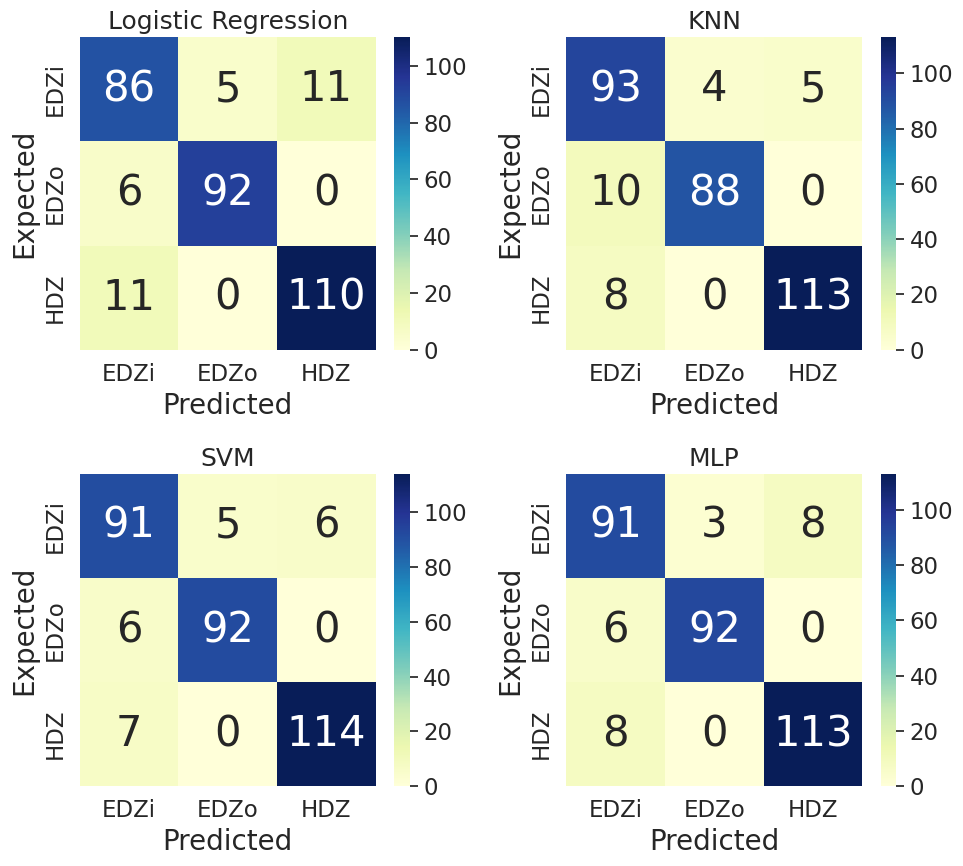

In [155]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 9))

# Plot 1
sns.heatmap(confusion_logistic, annot=True, fmt='g', xticklabels=('EDZi', 'EDZo', 'HDZ'), yticklabels=('EDZi', 'EDZo', 'HDZ'), cmap='YlGnBu', annot_kws={"size": 30}, ax=axes[0, 0])
axes[0, 0].set_title('Logistic Regression')
axes[0, 0].set_xlabel('Predicted', size=20)
axes[0, 0].set_ylabel('Expected', size=20)

# Plot 2
sns.heatmap(confusion_matrix_KNN, annot=True, fmt='g', xticklabels=('EDZi', 'EDZo', 'HDZ'), yticklabels=('EDZi', 'EDZo', 'HDZ'), cmap='YlGnBu', annot_kws={"size": 30}, ax=axes[0, 1])
axes[0, 1].set_title('KNN')
axes[0, 1].set_xlabel('Predicted', size=20)
axes[0, 1].set_ylabel('Expected', size=20)

# Plot 3
sns.heatmap(confusion_matrix_SVM, annot=True, fmt='g', xticklabels=('EDZi', 'EDZo', 'HDZ'), yticklabels=('EDZi', 'EDZo', 'HDZ'), cmap='YlGnBu', annot_kws={"size": 30}, ax=axes[1, 0])
axes[1, 0].set_title('SVM')
axes[1, 0].set_xlabel('Predicted', size=20)
axes[1, 0].set_ylabel('Expected', size=20)

# Plot 4
sns.heatmap(confusion_matrix_MLP, annot=True, fmt='g', xticklabels=('EDZi', 'EDZo', 'HDZ'), yticklabels=('EDZi', 'EDZo', 'HDZ'), cmap='YlGnBu', annot_kws={"size": 30}, ax=axes[1, 1])
axes[1, 1].set_title('MLP')
axes[1, 1].set_xlabel('Predicted', size=20)
axes[1, 1].set_ylabel('Expected', size=20)

plt.tight_layout()
# plt.savefig("Confusion Matrix Combined.png", format="png", dpi=600, bbox_inches = 'tight')

### **Precision_Recall Curves**

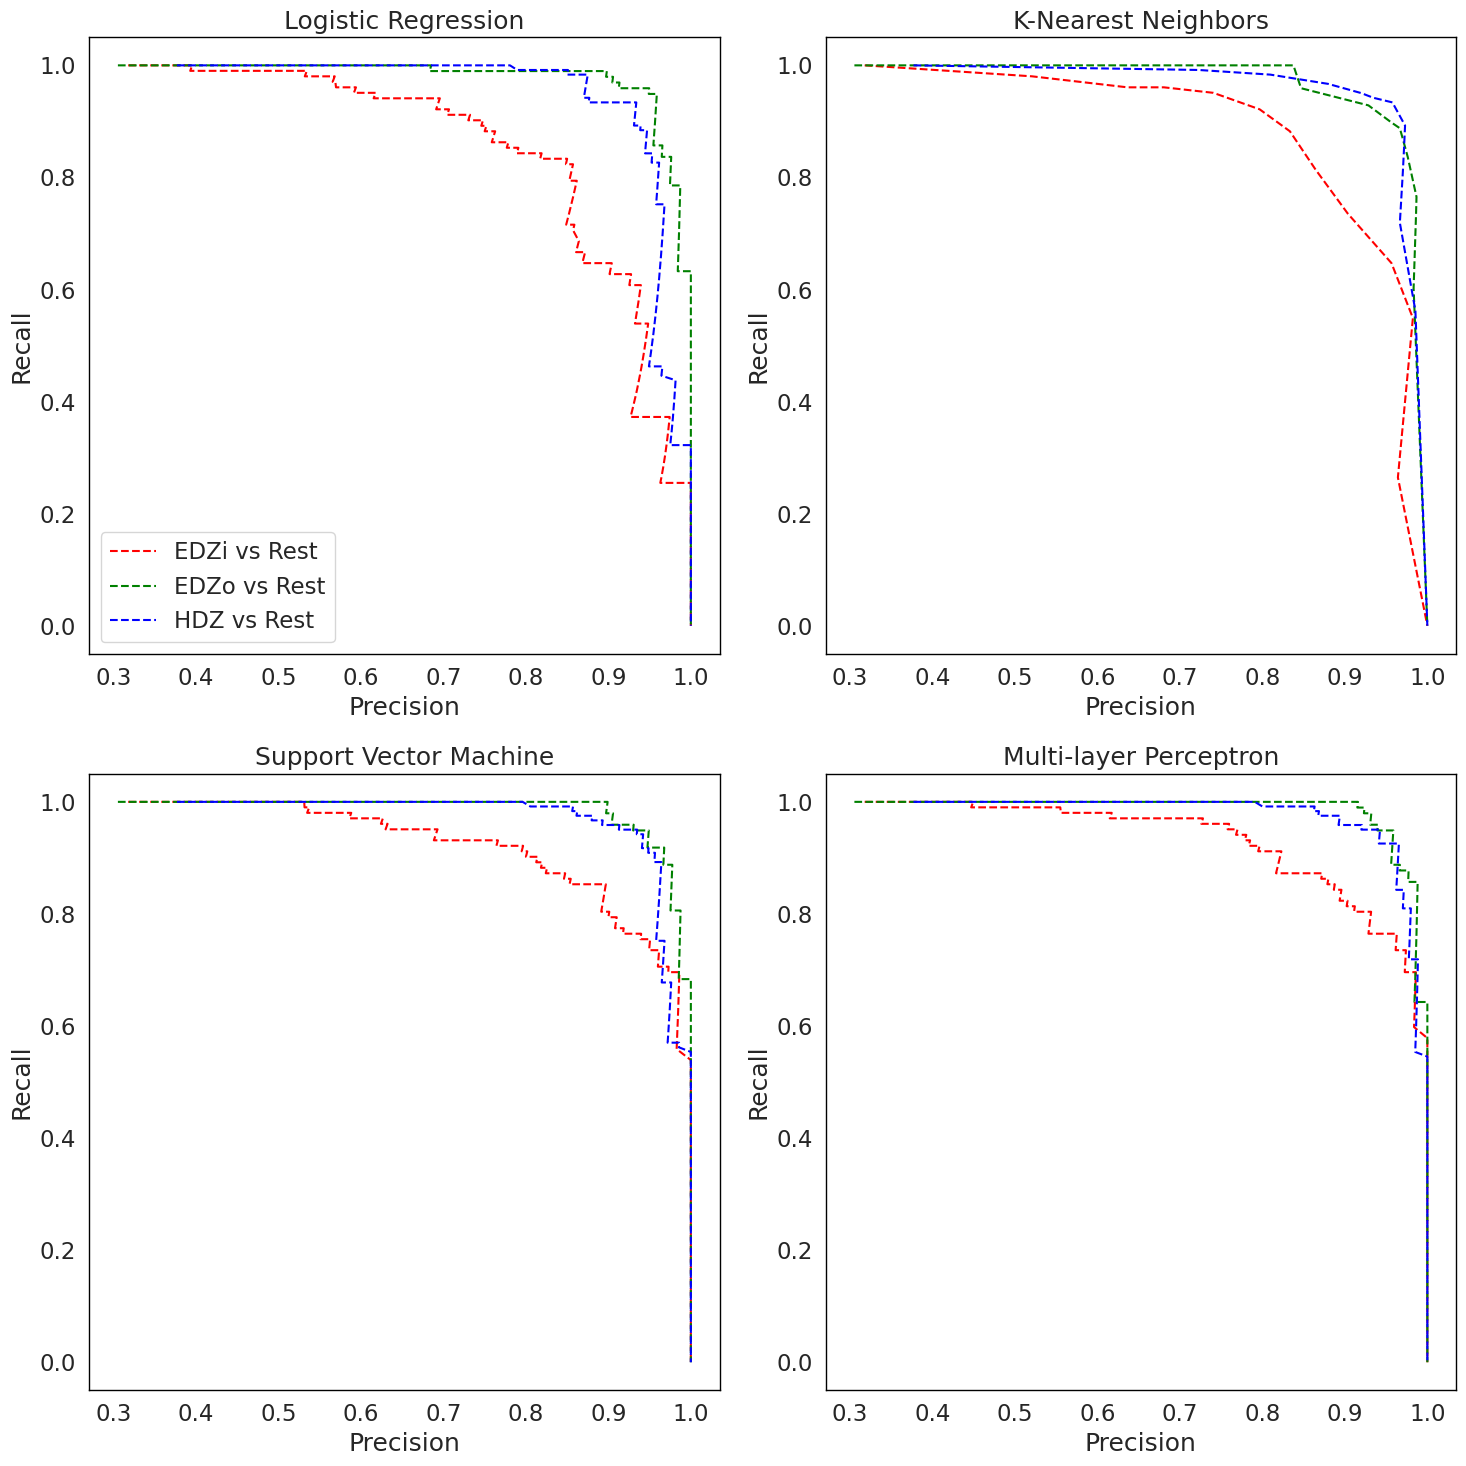

In [156]:


# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

# Plot 1 - Logistic Regression
Logistic_OVRC = OneVsRestClassifier(LogisticRegression(solver='lbfgs', C=1, multi_class='multinomial'))
Logistic_OVRC.fit(x_train, y_train)
y_pred_prob_OVRC_Logistic = Logistic_OVRC.predict_proba(x_test)

colors= ('red', 'green', 'blue')
for i in range(n_class):
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_pred_prob_OVRC_Logistic[:, i])
    axes[0, 0].plot(precision, recall, linestyle='--', label='%s vs Rest' % (classes[i]), color=colors[i])

axes[0, 0].set_xlabel('Precision')
axes[0, 0].set_ylabel('Recall')
axes[0, 0].set_title('Logistic Regression')
axes[0,0].set_facecolor('w')
axes[0, 0].spines['left'].set_linewidth(1)
axes[0, 0].spines['bottom'].set_linewidth(1)
axes[0, 0].spines['right'].set_linewidth(1)
axes[0, 0].spines['top'].set_linewidth(1)
axes[0, 0].spines['left'].set_color('black')
axes[0, 0].spines['bottom'].set_color('black')
axes[0, 0].spines['right'].set_color('black')
axes[0, 0].spines['top'].set_color('black')

axes[0, 0].legend(facecolor='w')


# Plot 2 - K-Nearest Neighbors
KNN_OVRC = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=11, weights='uniform', algorithm='auto', p=1))
KNN_OVRC.fit(x_train, y_train)
y_pred_prob_OVRC_KNN = KNN_OVRC.predict_proba(x_test)

colors= ('red', 'green', 'blue')
for i in range(n_class):
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_pred_prob_OVRC_KNN[:, i])
    axes[0, 1].plot(precision, recall, linestyle='--', label='%s vs Rest' % (classes[i]), color=colors[i])

axes[0, 1].set_xlabel('Precision')
axes[0, 1].set_ylabel('Recall')
axes[0, 1].set_title('K-Nearest Neighbors')
axes[0,1].set_facecolor('w')
axes[0, 1].spines['left'].set_linewidth(1)
axes[0, 1].spines['bottom'].set_linewidth(1)
axes[0, 1].spines['right'].set_linewidth(1)
axes[0, 1].spines['top'].set_linewidth(1)
axes[0, 1].spines['left'].set_color('black')
axes[0, 1].spines['bottom'].set_color('black')
axes[0, 1].spines['right'].set_color('black')
axes[0, 1].spines['top'].set_color('black')

# Plot 3 - Support Vector Machine
SVM_OVRC = OneVsRestClassifier(svm.SVC(C=100, kernel='rbf', degree=2, decision_function_shape='ovo', gamma='auto', tol=0.1, probability=True))
SVM_OVRC.fit(x_train, y_train)
y_pred_prob_OVRC_SVM = SVM_OVRC.predict_proba(x_test)

colors= ('red', 'green', 'blue')
for i in range(n_class):
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_pred_prob_OVRC_SVM[:, i])
    axes[1, 0].plot(precision, recall, linestyle='--', label='%s vs Rest' % (classes[i]), color=colors[i])

axes[1, 0].set_xlabel('Precision')
axes[1, 0].set_ylabel('Recall')
axes[1, 0].set_title('Support Vector Machine')
axes[1,0].set_facecolor('w')
axes[1, 0].spines['left'].set_linewidth(1)
axes[1, 0].spines['bottom'].set_linewidth(1)
axes[1, 0].spines['right'].set_linewidth(1)
axes[1, 0].spines['top'].set_linewidth(1)
axes[1, 0].spines['left'].set_color('black')
axes[1, 0].spines['bottom'].set_color('black')
axes[1, 0].spines['right'].set_color('black')
axes[1, 0].spines['top'].set_color('black')


# Plot 4 - Multi-layer Perceptron
MLP_OVRC = OneVsRestClassifier(MLPClassifier(hidden_layer_sizes=(4, 3), activation='logistic', alpha=0.1, solver='lbfgs', learning_rate='constant', random_state=7))
MLP_OVRC.fit(x_train, y_train)
y_pred_prob_OVRC_MLP = MLP_OVRC.predict_proba(x_test)

colors= ('red', 'green', 'blue')
for i in range(n_class):
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_pred_prob_OVRC_MLP[:, i])
    axes[1, 1].plot(precision, recall, linestyle='--', label='%s vs Rest' % (classes[i]), color=colors[i])

axes[1, 1].set_xlabel('Precision')
axes[1, 1].set_ylabel('Recall')
axes[1, 1].set_title('Multi-layer Perceptron')
axes[1,1].set_facecolor('w')
axes[1, 1].spines['left'].set_linewidth(1)
axes[1, 1].spines['bottom'].set_linewidth(1)
axes[1, 1].spines['right'].set_linewidth(1)
axes[1, 1].spines['top'].set_linewidth(1)
axes[1, 1].spines['left'].set_color('black')
axes[1, 1].spines['bottom'].set_color('black')
axes[1, 1].spines['right'].set_color('black')
axes[1, 1].spines['top'].set_color('black')


plt.tight_layout()
# plt.savefig("Precision_Recall.png", format="png", dpi=600, bbox_inches = 'tight')